# <div style="text-align: center">Прогнозирование оттока клиентов в сети отелей «Как в гостях».</div>

## Описание проекта.
Чтобы привлечь клиентов, сеть отелей «Как в гостях» добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки.<br>
Необходимо разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.
<br><br>

## Бизнес-метрика и другие данные.

- **Заказчик:**
Сеть отелей «Как в гостях».<br>

- **Бизнес-метрика:**<br>
Основная бизнес-метрика для любой сети отелей — её прибыль.<br> Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца.<br>

- **Требования к модели:**
  - За год модель должна принести не менее 400 000 р.

- **Дополнительные данные:**
  - В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.

  - Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.

  - В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня.  
  - На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.
<br>

<center>

### Стоимость номеров отеля:
Категория | Стоимость за ночь | Стоимость уборки
:- | :- | :-
A | 1 000 | 400
B | 800 | 350
C | 600 | 350
D | 550 | 150
E | 500 | 150
F | 450 | 150
G | 350 | 150

</center><br>

## Цели и план работы:
  - **Цели работы:**
    - Создание модели, предсказывающей отмену бронирования номера в отеле по признакам клиента.
    - Создание портрета "ненадёжного" клиента.
<br><br>

  - **План работы:**
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта." data-toc-modified-id="Описание-проекта.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта.</a></span></li><li><span><a href="#Бизнес-метрика-и-другие-данные." data-toc-modified-id="Бизнес-метрика-и-другие-данные.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Бизнес-метрика и другие данные.</a></span><ul class="toc-item"><li><span><a href="#Стоимость-номеров-отеля:" data-toc-modified-id="Стоимость-номеров-отеля:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Стоимость номеров отеля:</a></span></li></ul></li><li><span><a href="#Цели-и-план-работы:" data-toc-modified-id="Цели-и-план-работы:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Цели и план работы:</a></span></li><li><span><a href="#Описание-данных:" data-toc-modified-id="Описание-данных:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Описание данных:</a></span></li><li><span><a href="#Загрузка-используемых-библиотек." data-toc-modified-id="Загрузка-используемых-библиотек.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Загрузка используемых библиотек.</a></span></li><li><span><a href="#Установка-глобальных-параметров-проекта." data-toc-modified-id="Установка-глобальных-параметров-проекта.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Установка глобальных параметров проекта.</a></span></li><li><span><a href="#Загрузка-данных." data-toc-modified-id="Загрузка-данных.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Загрузка данных.</a></span></li><li><span><a href="#Ознакомление,-исследовательский-анализ-и-предобработка-данных." data-toc-modified-id="Ознакомление,-исследовательский-анализ-и-предобработка-данных.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Ознакомление, исследовательский анализ и предобработка данных.</a></span><ul class="toc-item"><li><span><a href="#Общая-информация-о-данных-и-исследовательский-анализ." data-toc-modified-id="Общая-информация-о-данных-и-исследовательский-анализ.-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Общая информация о данных и исследовательский анализ.</a></span><ul class="toc-item"><li><span><a href="#Создание-функций-для-ИАД." data-toc-modified-id="Создание-функций-для-ИАД.-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Создание функций для ИАД.</a></span></li><li><span><a href="#Вывод-информации-о-данных." data-toc-modified-id="Вывод-информации-о-данных.-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>Вывод информации о данных.</a></span></li><li><span><a href="#Проверка-пробелов." data-toc-modified-id="Проверка-пробелов.-8.1.3"><span class="toc-item-num">8.1.3&nbsp;&nbsp;</span>Проверка пробелов.</a></span></li><li><span><a href="#Проверка-типов-признаков." data-toc-modified-id="Проверка-типов-признаков.-8.1.4"><span class="toc-item-num">8.1.4&nbsp;&nbsp;</span>Проверка типов признаков.</a></span></li><li><span><a href="#Вывод-информации-о-данных." data-toc-modified-id="Вывод-информации-о-данных.-8.1.5"><span class="toc-item-num">8.1.5&nbsp;&nbsp;</span>Вывод информации о данных.</a></span></li><li><span><a href="#Вывод-дополнительной-информации-о-данных." data-toc-modified-id="Вывод-дополнительной-информации-о-данных.-8.1.6"><span class="toc-item-num">8.1.6&nbsp;&nbsp;</span>Вывод дополнительной информации о данных.</a></span></li><li><span><a href="#Промежуточные-выводы." data-toc-modified-id="Промежуточные-выводы.-8.1.7"><span class="toc-item-num">8.1.7&nbsp;&nbsp;</span>Промежуточные выводы.</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных.-Выводы:" data-toc-modified-id="Исследовательский-анализ-данных.-Выводы:-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Исследовательский анализ данных. Выводы:</a></span><ul class="toc-item"><li><span><a href="#Информация-о-составе-данных." data-toc-modified-id="Информация-о-составе-данных.-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Информация о составе данных.</a></span></li><li><span><a href="#Целевой-признак:" data-toc-modified-id="Целевой-признак:-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>Целевой признак:</a></span></li><li><span><a href="#ML-задача:" data-toc-modified-id="ML-задача:-8.2.3"><span class="toc-item-num">8.2.3&nbsp;&nbsp;</span>ML задача:</a></span></li><li><span><a href="#Признак-country,-значение-PRT---Португалия:" data-toc-modified-id="Признак-country,-значение-PRT---Португалия:-8.2.4"><span class="toc-item-num">8.2.4&nbsp;&nbsp;</span>Признак <code>country</code>, значение <code>PRT</code> - Португалия:</a></span></li><li><span><a href="#Пропуски-в-данных." data-toc-modified-id="Пропуски-в-данных.-8.2.5"><span class="toc-item-num">8.2.5&nbsp;&nbsp;</span>Пропуски в данных.</a></span></li><li><span><a href="#Аномалии-в-данных." data-toc-modified-id="Аномалии-в-данных.-8.2.6"><span class="toc-item-num">8.2.6&nbsp;&nbsp;</span>Аномалии в данных.</a></span></li><li><span><a href="#Дубликаты-в-данных." data-toc-modified-id="Дубликаты-в-данных.-8.2.7"><span class="toc-item-num">8.2.7&nbsp;&nbsp;</span>Дубликаты в данных.</a></span></li><li><span><a href="#Формат-данных." data-toc-modified-id="Формат-данных.-8.2.8"><span class="toc-item-num">8.2.8&nbsp;&nbsp;</span>Формат данных.</a></span></li><li><span><a href="#Признаки-по-всем-странам." data-toc-modified-id="Признаки-по-всем-странам.-8.2.9"><span class="toc-item-num">8.2.9&nbsp;&nbsp;</span>Признаки по всем странам.</a></span></li><li><span><a href="#Корреляция-признаков-/-мультиколлинеарность." data-toc-modified-id="Корреляция-признаков-/-мультиколлинеарность.-8.2.10"><span class="toc-item-num">8.2.10&nbsp;&nbsp;</span>Корреляция признаков / мультиколлинеарность.</a></span></li></ul></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Предобработка данных.</a></span><ul class="toc-item"><li><span><a href="#Пропуски-в-данных." data-toc-modified-id="Пропуски-в-данных.-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>Пропуски в данных.</a></span><ul class="toc-item"><li><span><a href="#Признак-is_repeated_guest." data-toc-modified-id="Признак-is_repeated_guest.-8.3.1.1"><span class="toc-item-num">8.3.1.1&nbsp;&nbsp;</span>Признак <code>is_repeated_guest</code>.</a></span></li></ul></li><li><span><a href="#Аномалии-в-данных." data-toc-modified-id="Аномалии-в-данных.-8.3.2"><span class="toc-item-num">8.3.2&nbsp;&nbsp;</span>Аномалии в данных.</a></span><ul class="toc-item"><li><span><a href="#Признак-babies." data-toc-modified-id="Признак-babies.-8.3.2.1"><span class="toc-item-num">8.3.2.1&nbsp;&nbsp;</span>Признак <code>babies</code>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Формулировка-задачи-и-вычисление-бизнес-метрики." data-toc-modified-id="Формулировка-задачи-и-вычисление-бизнес-метрики.-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Формулировка задачи и вычисление бизнес-метрики.</a></span><ul class="toc-item"><li><span><a href="#Формулировка-задачи." data-toc-modified-id="Формулировка-задачи.-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Формулировка задачи.</a></span><ul class="toc-item"><li><span><a href="#Вычисление-бизнес-метрики." data-toc-modified-id="Вычисление-бизнес-метрики.-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>Вычисление бизнес-метрики.</a></span><ul class="toc-item"><li><span><a href="#Создание-функции-для-рассчёта-прибыли." data-toc-modified-id="Создание-функции-для-рассчёта-прибыли.-9.1.1.1"><span class="toc-item-num">9.1.1.1&nbsp;&nbsp;</span>Создание функции для рассчёта прибыли.</a></span></li><li><span><a href="#Вычисление-прибыли." data-toc-modified-id="Вычисление-прибыли.-9.1.1.2"><span class="toc-item-num">9.1.1.2&nbsp;&nbsp;</span>Вычисление прибыли.</a></span></li><li><span><a href="#Вычисление-бизнес-метрики.-Выводы." data-toc-modified-id="Вычисление-бизнес-метрики.-Выводы.-9.1.1.3"><span class="toc-item-num">9.1.1.3&nbsp;&nbsp;</span>Вычисление бизнес-метрики. Выводы.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Подготовка-данных-к-моделированию." data-toc-modified-id="Подготовка-данных-к-моделированию.-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Подготовка данных к моделированию.</a></span><ul class="toc-item"><li><span><a href="#Удаление-неинформативных-признаков." data-toc-modified-id="Удаление-неинформативных-признаков.-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Удаление неинформативных признаков.</a></span></li><li><span><a href="#Разделение-на-выборки." data-toc-modified-id="Разделение-на-выборки.-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Разделение на выборки.</a></span><ul class="toc-item"><li><span><a href="#Создание-функции." data-toc-modified-id="Создание-функции.-10.2.1"><span class="toc-item-num">10.2.1&nbsp;&nbsp;</span>Создание функции.</a></span></li><li><span><a href="#Разделение-выборок." data-toc-modified-id="Разделение-выборок.-10.2.2"><span class="toc-item-num">10.2.2&nbsp;&nbsp;</span>Разделение выборок.</a></span></li><li><span><a href="#Разделение-выборок.-Выводы:" data-toc-modified-id="Разделение-выборок.-Выводы:-10.2.3"><span class="toc-item-num">10.2.3&nbsp;&nbsp;</span>Разделение выборок. Выводы:</a></span></li></ul></li><li><span><a href="#Дополнительное-удаление-неинформативных-признаков." data-toc-modified-id="Дополнительное-удаление-неинформативных-признаков.-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Дополнительное удаление неинформативных признаков.</a></span></li><li><span><a href="#Кодирование-признаков." data-toc-modified-id="Кодирование-признаков.-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Кодирование признаков.</a></span><ul class="toc-item"><li><span><a href="#Создание-функции-кодирования-признаков." data-toc-modified-id="Создание-функции-кодирования-признаков.-10.4.1"><span class="toc-item-num">10.4.1&nbsp;&nbsp;</span>Создание функции кодирования признаков.</a></span></li><li><span><a href="#Кодирование-признаков." data-toc-modified-id="Кодирование-признаков.-10.4.2"><span class="toc-item-num">10.4.2&nbsp;&nbsp;</span>Кодирование признаков.</a></span></li></ul></li><li><span><a href="#Проверка-значимости-признаков." data-toc-modified-id="Проверка-значимости-признаков.-10.5"><span class="toc-item-num">10.5&nbsp;&nbsp;</span>Проверка значимости признаков.</a></span><ul class="toc-item"><li><span><a href="#Создание-функции-проверки-значимости." data-toc-modified-id="Создание-функции-проверки-значимости.-10.5.1"><span class="toc-item-num">10.5.1&nbsp;&nbsp;</span>Создание функции проверки значимости.</a></span></li><li><span><a href="#Проверка-значимости-признаков.-Выводы." data-toc-modified-id="Проверка-значимости-признаков.-Выводы.-10.5.2"><span class="toc-item-num">10.5.2&nbsp;&nbsp;</span>Проверка значимости признаков. Выводы.</a></span></li></ul></li></ul></li><li><span><a href="#Разработка-ML-модели." data-toc-modified-id="Разработка-ML-модели.-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Разработка ML модели.</a></span><ul class="toc-item"><li><span><a href="#Используемые-модели." data-toc-modified-id="Используемые-модели.-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Используемые модели.</a></span></li><li><span><a href="#Методы-кросс-валидации:" data-toc-modified-id="Методы-кросс-валидации:-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Методы кросс-валидации:</a></span></li><li><span><a href="#Используемые-метрики." data-toc-modified-id="Используемые-метрики.-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Используемые метрики.</a></span></li><li><span><a href="#Обучение-моделей." data-toc-modified-id="Обучение-моделей.-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Обучение моделей.</a></span><ul class="toc-item"><li><span><a href="#Создание-функции-поиска-оптимальных-гиперпараметров." data-toc-modified-id="Создание-функции-поиска-оптимальных-гиперпараметров.-11.4.1"><span class="toc-item-num">11.4.1&nbsp;&nbsp;</span>Создание функции поиска оптимальных гиперпараметров.<br></a></span></li><li><span><a href="#Установка-параметров-обучения-моделей." data-toc-modified-id="Установка-параметров-обучения-моделей.-11.4.2"><span class="toc-item-num">11.4.2&nbsp;&nbsp;</span>Установка параметров обучения моделей.</a></span></li><li><span><a href="#Подбор-оптимальных-моделей." data-toc-modified-id="Подбор-оптимальных-моделей.-11.4.3"><span class="toc-item-num">11.4.3&nbsp;&nbsp;</span>Подбор оптимальных моделей.</a></span></li></ul></li><li><span><a href="#Оценка-прибыли,-которую-принесёт-модель." data-toc-modified-id="Оценка-прибыли,-которую-принесёт-модель.-11.5"><span class="toc-item-num">11.5&nbsp;&nbsp;</span>Оценка прибыли, которую принесёт модель.</a></span><ul class="toc-item"><li><span><a href="#Оценка-прибыли,-которую-принесёт-модель.-Вывод." data-toc-modified-id="Оценка-прибыли,-которую-принесёт-модель.-Вывод.-11.5.1"><span class="toc-item-num">11.5.1&nbsp;&nbsp;</span>Оценка прибыли, которую принесёт модель. Вывод.</a></span></li></ul></li></ul></li><li><span><a href="#Портрет-&quot;ненадёжного&quot;-клиента." data-toc-modified-id="Портрет-&quot;ненадёжного&quot;-клиента.-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Портрет "ненадёжного" клиента.</a></span></li><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Общий вывод.</a></span><ul class="toc-item"><li><span><a href="#Результаты-работы." data-toc-modified-id="Результаты-работы.-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Результаты работы.</a></span><ul class="toc-item"><li><span><a href="#Оценка-прибыли,-которую-принесёт-модель." data-toc-modified-id="Оценка-прибыли,-которую-принесёт-модель.-13.1.1"><span class="toc-item-num">13.1.1&nbsp;&nbsp;</span>Оценка прибыли, которую принесёт модель.</a></span></li></ul></li><li><span><a href="#Рекомендации-заказчику." data-toc-modified-id="Рекомендации-заказчику.-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Рекомендации заказчику.</a></span></li><li><span><a href="#Исследовательский-анализ-данных-и-предобработка." data-toc-modified-id="Исследовательский-анализ-данных-и-предобработка.-13.3"><span class="toc-item-num">13.3&nbsp;&nbsp;</span>Исследовательский анализ данных и предобработка.</a></span><ul class="toc-item"><li><span><a href="#Целевой-признак:" data-toc-modified-id="Целевой-признак:-13.3.1"><span class="toc-item-num">13.3.1&nbsp;&nbsp;</span>Целевой признак:</a></span></li><li><span><a href="#ML-задача:" data-toc-modified-id="ML-задача:-13.3.2"><span class="toc-item-num">13.3.2&nbsp;&nbsp;</span>ML задача:</a></span></li><li><span><a href="#Пропуски-в-данных." data-toc-modified-id="Пропуски-в-данных.-13.3.3"><span class="toc-item-num">13.3.3&nbsp;&nbsp;</span>Пропуски в данных.</a></span></li><li><span><a href="#Аномалии-в-данных." data-toc-modified-id="Аномалии-в-данных.-13.3.4"><span class="toc-item-num">13.3.4&nbsp;&nbsp;</span>Аномалии в данных.</a></span></li></ul></li><li><span><a href="#Вычисление-бизнес-метрики." data-toc-modified-id="Вычисление-бизнес-метрики.-13.4"><span class="toc-item-num">13.4&nbsp;&nbsp;</span>Вычисление бизнес-метрики.</a></span></li><li><span><a href="#Подготовка-данных-к-моделированию." data-toc-modified-id="Подготовка-данных-к-моделированию.-13.5"><span class="toc-item-num">13.5&nbsp;&nbsp;</span>Подготовка данных к моделированию.</a></span><ul class="toc-item"><li><span><a href="#Удаление-признаков." data-toc-modified-id="Удаление-признаков.-13.5.1"><span class="toc-item-num">13.5.1&nbsp;&nbsp;</span>Удаление признаков.</a></span></li><li><span><a href="#Кодирование-признаков." data-toc-modified-id="Кодирование-признаков.-13.5.2"><span class="toc-item-num">13.5.2&nbsp;&nbsp;</span>Кодирование признаков.</a></span></li><li><span><a href="#Проверка-значимости." data-toc-modified-id="Проверка-значимости.-13.5.3"><span class="toc-item-num">13.5.3&nbsp;&nbsp;</span>Проверка значимости.</a></span></li></ul></li><li><span><a href="#Разработка-ML-модели." data-toc-modified-id="Разработка-ML-модели.-13.6"><span class="toc-item-num">13.6&nbsp;&nbsp;</span>Разработка ML модели.</a></span><ul class="toc-item"><li><span><a href="#Используемые-модели." data-toc-modified-id="Используемые-модели.-13.6.1"><span class="toc-item-num">13.6.1&nbsp;&nbsp;</span>Используемые модели.</a></span></li><li><span><a href="#Методы-кросс-валидации:" data-toc-modified-id="Методы-кросс-валидации:-13.6.2"><span class="toc-item-num">13.6.2&nbsp;&nbsp;</span>Методы кросс-валидации:</a></span></li><li><span><a href="#Используемые-метрики." data-toc-modified-id="Используемые-метрики.-13.6.3"><span class="toc-item-num">13.6.3&nbsp;&nbsp;</span>Используемые метрики.</a></span></li><li><span><a href="#Лучшая-предиктивная-модель." data-toc-modified-id="Лучшая-предиктивная-модель.-13.6.4"><span class="toc-item-num">13.6.4&nbsp;&nbsp;</span>Лучшая предиктивная модель.</a></span></li></ul></li></ul></li></ul></div>
<br><br>

## Описание данных:
- **Источник данных:** Заказчик.
  - Данные для обучения модели: https://code.s3.yandex.net/datasets/hotel_train.csv
  - Данные для тестирования модели: https://code.s3.yandex.net/datasets/hotel_test.csv<br>

- **Состав данных:**<br>
В таблицах `hotel_train` и `hotel_test` содержатся одинаковые столбцы:

| Наименование признака | Значение/Подкатегория | Тип признака | Описание признака
:- | :- | :- | :-
| **Целевой признак:** |
is_canceled | | категориальный | отмена заказа
| **Предикторы:** |
id | | категориальный | номер записи
adults | | количественный | количество взрослых постояльцев
arrival_date_year | | категориальный | год заезда
arrival_date_month | | категориальный | месяц заезда
arrival_date_week_number | | категориальный | неделя заезда
arrival_date_day_of_month | | категориальный | день заезда
babies | | количественный | количество младенцев
booking_changes | | количественный | количество изменений параметров брони
children | | количественный | количество детей от 3 до 14 лет
country | | категориальный | гражданство постояльца в кодировке ISO 3166-1 alpha-3
customer_type | | категориальный |  тип заказчика
customer_type | Contract | | договор с юридическим лицом
customer_type | Group | | групповой заезд
customer_type | Transient | |  не связано с договором или групповым заездом
customer_type | Transient-party | | не связано с договором или групповым заездом, но связано с бронированием типа Transient
days_in_waiting_list | | количественный | сколько дней заказ ожидал подтверждения
distribution_channel | | категориальный | канал бронирования
| | Corporate | | корпоративное бронирование
| | Direct | | прямое бронирование
| | GDS | | глобальные системы бронирования
| | TA/TO | | бронирование через туристических агентов / операторов
is_repeated_guest | | категориальный | признак того, что гость бронирует номер второй раз
lead_time | | количественный | количество дней между датой бронирования и датой прибытия
meal | | категориальный | опции питания
meal | SC | | нет дополнительных опций
meal | BB | | включён завтрак
meal | HB | | включён завтрак и обед
meal | FB | | включён завтрак, обед и ужин
previous_bookings_not_canceled | | количественный | количество подтверждённых заказов у клиента
previous_cancellations | | количественный | количество отменённых заказов у клиента
required_car_parking_spaces | | количественный | необходимость места для автомобиля
reserved_room_type | | категориальный | тип забронированной комнаты
stays_in_weekend_nights | | количественный | количество ночей в выходные дни
stays_in_week_nights | | количественный | количество ночей в будние дни
total_nights | | количественный | общее количество ночей
total_of_special_requests | | количественный | количество специальных отметок

## Загрузка используемых библиотек.

In [1]:
### os для обращения к среде разработки и requests для интернет запросов.
import os
import requests
### multiprocessing для определения кол-ва доступных процессоров.
import multiprocessing

### Работа с датафреймами.
# pandas для работы с датафреймами.
if not os.getenv("COLAB_RELEASE_TAG"):
    !pip install pandas --upgrade
import pandas as pd
# Функции проверки типа столбцов.
from pandas.api.types import (is_numeric_dtype,
                              is_string_dtype,
                              is_integer_dtype)
# datetime для работы с датами
import datetime

### numpy для вычислений.
import numpy as np

### Визуализация.
# matplotlib для визуализации.
if not os.getenv("COLAB_RELEASE_TAG"):
    !pip install matplotlib --upgrade
import matplotlib.pyplot as plt
# seaborn для построения графиков.
import seaborn as sns
# venn для построения диаграмм.
if not os.getenv("COLAB_RELEASE_TAG"):
    !pip install matplotlib-venn
from matplotlib_venn import venn2

### Функции для работы с моделями.
if not os.getenv("COLAB_RELEASE_TAG"):
    !pip install scikit-learn --upgrade
# функция проверки взаимной информации;
from sklearn.feature_selection import mutual_info_classif
# функция проверки значимости признаков;
from sklearn.inspection import permutation_importance
# функция прямого кодирования - OneHotEncoder;
from sklearn.preprocessing import OneHotEncoder

# HalvingGridSearchCV, GridSearchCV для подбора гиперпараметров по сетке;
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import (train_test_split,
                                     HalvingGridSearchCV,
                                     GridSearchCV)

## решающее дерево и ансамбли из него;
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              HistGradientBoostingClassifier)
if not os.getenv("COLAB_RELEASE_TAG"):
    !pip install -U xgboost
from xgboost import XGBClassifier

## Функции оценки моделей.
from sklearn.metrics import (precision_score, recall_score,
                             confusion_matrix, f1_score, fbeta_score,
                             make_scorer, roc_auc_score, auc, roc_curve)

### Модули для контроля времени исполнения ячеек.
## tqdm для контроля выполнения ячеек.
from tqdm.notebook import tqdm
from tqdm import trange
# tqdm обёртка для itertools.product;
from tqdm.contrib.itertools import product
## time для замеров длительности обучения моделей.
from time import time

### string для обработки строковых значений.
import string

### HTML для настройки отображения эл-тов.
from IPython.display import HTML

## Установка глобальных параметров проекта.

In [2]:
# Установим стиль отображения заголовков таблиц.
styles = [
    dict(selector='caption',
         props=[('text-align', 'center'),
                ('font-size', '130%'),
                ('font-weight', 'bold'),
                ('white-space', 'pre-wrap')]),
    dict(selector="th",
         props=[('max-width', '250px')])
    ]

# Установим отображение всех столбцов при выводе датафрейма.
pd.set_option('display.max_columns', None)

# Уберём предупреждения pandas о неоптимальном методе формирования датафрейма
# из разряженной матрицы numpy при кодировании признаков.
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

# Зафиксируем начальное значение генератора псевдослучайных чисел.
seed = 42

# Установим отображение графиков по центру ячейки
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
</style>
""")

## Загрузка данных.

- Функция загрузки и записи в переменные любого количества датасетов в формате `.csv` с проверкой адреса/пути.

In [3]:
# Функция загрузки и записи в переменные любого количества датасетов
# по ссылкам или пути с проверкой адреса/пути.
def fetch_datasets(pths, separator=','):
    '''Arguments:
    - pths: str, list. Full string path in quotes or list of links or
            list of file paths as list of strings.
    - separator: str, default=','. Separator as a string.
    - Example: ('/datasets/file.csv' or ['https://datasets/file.csv'], 't').
    '''

    # Переведём путь в список при необходимости.
    pths = [pths] if isinstance(pths, str) else pths

    print("\n\033[1m",
          'Начало загрузки и записи датасетов в переменные:',
          "\033[0m")

    for pth in tqdm(pths):
        # Запишем название и расширение файла.
        full_name = os.path.basename(pth)
        name, extension = os.path.splitext(full_name)

        # Проверим ссылку и запишем датасет в переменную.
        if 'http' in pth:
            # Воспользуемся try/except для непредвиденных ошибок.
            try:
                # Проверим корректность ссылки.
                if requests.get(pth).status_code == 200:
                    # Создадим переменную и запишем в неё датафрейм.
                    globals()[name.lower()] = pd.read_csv(pth, sep=separator,
                                                          engine ='python')
                    print(f'Файл {full_name} прочитан и записан в переменную ',
                          f'"{name.lower()}". \nПуть к файлу: \n{pth}')
                    print('~' * 60)
                else:
                    print(f'Ошибка чтения файла по пути: {pth}')
                    print('~' * 60)
            except:
                print(f'Ошибка чтения файла по пути: {pth}')

        # Проверим путь и запишем датасет в переменную.
        elif os.path.exists(pth):
            # Создадим переменную и запишем в неё датафрейм.
            globals()[name.lower()] = pd.read_csv(pth, sep=separator)
            print(f'Файл {full_name} прочитан и записан в переменную ',
                  f'"{name.lower()}". \nПуть к файлу: \n{pth}')
            print('~' * 60)

        else:
            print(f'Ошибка чтения файла по пути: {pth}.')
            print('~' * 60)

- Вызовем функцию и загрузим датасеты.

In [4]:
fetch_datasets(['https://code.s3.yandex.net/datasets/hotel_train.csv',
                'https://code.s3.yandex.net/datasets/hotel_test.csv'])


 Начало загрузки и записи датасетов в переменные: 


  0%|          | 0/2 [00:00<?, ?it/s]

Файл hotel_train.csv прочитан и записан в переменную  "hotel_train". 
Путь к файлу: 
https://code.s3.yandex.net/datasets/hotel_train.csv
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Файл hotel_test.csv прочитан и записан в переменную  "hotel_test". 
Путь к файлу: 
https://code.s3.yandex.net/datasets/hotel_test.csv
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


- Объявим переменные для систем проверки кода, не распознающих динамическое объявление.

In [5]:
# Объявим переменные для систем проверки кода, не распознающих
# динамическое объявление.
hotel_test = hotel_test
hotel_train = hotel_train

## Ознакомление, исследовательский анализ и предобработка данных.

In [6]:
col_names = {
    'key_1' : 'Бронь отменена.',
    'key_0' : 'Бронь не отменена.',
    'id' : 'Идентификатор.',
    'adults' : 'Кол-во взрослых.',
    'arrival_date_year' : 'Год заезда.',
    'arrival_date_month' : 'Месяц заезда.',
    'arrival_date_week_number' : 'Неделя заезда.',
    'arrival_date_day_of_month' : 'День заезда.',
    'babies' : 'Кол-во младенцев.',
    'booking_changes' : 'Кол-во изменений в брони.',
    'children' : 'Кол-во детей 3-14 лет.',
    'country' : 'Гражданство.',
    'customer_type' : 'Тип клиента.',
    'Contract' : 'Юрлицо.',
    'Group' : 'Группа.',
    'Transient' : 'Случайный.',
    'Transient-Party' : 'Случайная группа.',
    'days_in_waiting_list' : 'Подтверждение брони (дни).',
    'distribution_channel' : 'Канал дистрибуции.',
    'Corporate' : 'Корпоративная бронь.',
    'Direct' : 'Прямое бронирование.',
    'GDS' : 'Глобальные системы бронирования.',
    'TA/TO' : 'Тур. агенты / операторы',
    'is_canceled' : 'Бронь отменёна.',
    'is_repeated_guest' : 'Повторная бронь.',
    'lead_time' : 'Дней от брони до прибытия.',
    'meal' : 'Опции брони.',
    'SC' : 'Без опций',
    'BB' : 'Завтрак.',
    'HB' : 'Завтрак и обед.',
    'FB' : 'Завтрак, обед и ужин.',
    'previous_bookings_not_canceled' : 'Кол-во неотменённых броней.',
    'previous_cancellations' : 'Кол-во отменённых броней.',
    'required_car_parking_spaces' : 'Кол-во парковочных мест.',
    'reserved_room_type' : 'Тип забронированной комнаты.',
    'stays_in_weekend_nights' : 'Количество ночей в выходные.',
    'stays_in_week_nights' : 'Количество ночей в будние.',
    'total_nights' : 'Общее количество ночей.',
    'total_of_special_requests' : 'Количество специальных отметок.',
    'total_previous_bookings' : 'Общее кол-во предыдущих броней.'
}

### Общая информация о данных и исследовательский анализ.

#### Создание функций для ИАД.
Создадим набор функций для ознакомления с данными и исследовательского анализа.

- Создадим функцию обнаружения и удаления начальных и конечных пробелов в названиях столбцов/признаков и строковых значениях.

In [7]:
# Функция обнаружения и удаления начальных и конечных пробелов в названиях
# столбцов/признаков и строковых значениях.
def str_correction(data : pd.DataFrame()):

    # Введём списки для сбора результатов проверки и переменную с
    # искомыми значениями.
    wspace = tuple(' \r\n\t')
    wrong_col_names = []
    wrong_val_names = []

    # Обнаружим и удалим начальные и конечные пробелы в названиях
    # столбцов/признаков.
    for col in list(data.columns):
        if col.startswith(wspace) or col.endswith(wspace):
            wrong_col_names.append('Пробелы удалены.')
            data = data.rename(columns={col : col.strip()})
        else:
            wrong_col_names.append('-')

    # Обнаружим и удалим начальные и конечные пробелы в строковых значениях.
    for col in list(data.columns):
        if is_string_dtype(data[col]) and \
        any(el.startswith(wspace) or el.endswith(wspace) for el in data[col]):
            wrong_val_names.append('Пробелы удалены.')
            data[col] = data[col].apply(lambda x: x.strip())
        else:
            wrong_val_names.append('-')

    wrong_names = pd.DataFrame(data=[wrong_col_names, wrong_val_names],
                               index=['Названия столбцов/признаков.',
                                      'Строковые значения в ячейках.'],
                               columns=list(data.columns))
    display(
        wrong_names
        .style
        .set_caption('Некорректные строковые значения.')
        .set_table_styles(styles)
    )
    return data

- Создадим функцию вычисления процента аномальных значений.<br>
За аномальные примем значения за пределами полутора интерквартильных размахов.

In [8]:
### Введём функцию рассчёта и вывода процентов выбросов для отобранных
### признаков.
def get_outliers_ratio(data, col):
    distr = data[col].describe()
    distr_iqr = distr[6] - distr[4]
    whisker_upp = distr[6] + 1.5 * distr_iqr
    whisker_low = distr[4] - 1.5 * distr_iqr
    if whisker_upp >= distr[7]:
        whisker_upp = distr[7]
    if whisker_low <= distr[3]:
        whisker_low = distr[3]
    else:
        pass
    outliers_ratio = (
        (data.loc[data[col] >
                whisker_upp, col].count() +
        data.loc[data[col] <
                whisker_low, col].count()) /
        len(data[col])
    )
    return outliers_ratio

- Создадим функцию вывода информации о датафрейме, которая
  - примет датафрейм;
  - название датафрейма (опционально);
  - метод рассчёта коэффициента корреляции (опционально, по умолчанию вычисляется коэфф. Пирсона);
  - выведет:
    - первые 20 строк и информацию о датафрейме;
    - информацию о дубликатах, пропусках и уникальных значениях в датафрейме;
    - распределения числовых и информацию о строковых значениях в цифрах;
    - тепловую карту матрицы корреляции со значениями.

In [9]:
### Введём функцию вывода информации о датафрейме.
def get_eda_data(data:pd.DataFrame(),
                 data_name='Датафрейм',
                 corr_method='pearson'):
    '''Arguments:
    - data: pd.DataFrame.
    - data_name: optional name of the dataframe.
    - corr_method: correlation coefficient calculation method from Pandas
                   .corr() method. Options are: 'pearson' (default),
                   'kendall', 'spearman'.
    '''

    # Отделим численные признаки.
    cols_to_analyze = [col for col in data if is_numeric_dtype(data[col])]

    # Проверим метод рассчета коэфф. корреляции.
    if corr_method == 'pearson': corr_name = 'Пирсона'
    elif corr_method == 'kendall': corr_name = 'Кендалла'
    elif corr_method == 'spearman': corr_name = 'Спирмена'
    else:
        raise ValueError('Тип коэффициента корреляции введён неврено.')

    # Выведем первые строки датафрейма.
    display(
        data.head(20)
        .style
        .set_properties(**{'white-space' : 'pre'})
        .set_caption(f'{data_name}.' +
                     '\nПервые 20 строк.')
        .set_table_styles(styles)
        )

    print('\n')

    # Вычислим и занесём в таблицу кол-во нулевых значений в датафрйеме.
    zeros = [len([el for el in data[col] if el == 0]) for col in data]
    zeros = pd.Series(zeros, index=list(data.columns))

    # Выведем информацию о дубликатах, уникальных значениях
    # и пропусках в датафрейме.
    display(
        pd.DataFrame([
            data.isna().sum(),
            round(data.isna().sum() / len(data), 4).map('{:.2%}'.format),
            len(data) - data.nunique(),
            (
                round((len(data) - data.nunique()) / len(data), 4)
                .map('{:.2%}'.format)
            ),
            data.nunique(),
            zeros,
                 ],
            index=['Кол-во пропусков:', 'Процент пропусков:',
                   'Кол-во дубликатов:', 'Процент дубликатов:',
                   'Кол-во уникальных значений:', 'Кол-во нулевых значений:']
                   )
        .style
        .set_caption('Пропуски, уникальные значения и дубликаты в ' +
                    'датафрейме.\n Количество явных дубликатов:  ' +
                    f'{data.duplicated().sum()}. \n')
        .set_table_styles(styles)
        )

    # Выведем информацию о составе датафрейма.
    print('\033[1m \n Информация о составе датафрейма. \033[0m')
    display(data.info())


    print('\n')

    # Выведем распределение признаков.
    display(
        data.describe([.05,.1,.25,.50,.75,.90,0.95])
        .style
        .format(precision=2)
        .set_caption(f'Распределение численных признаков.')
        .set_table_styles(styles)
        )

    print('\n')

    # Проверка наличия признаков 'bool' или 'object'
    col_types = [str(data[col].dtype) for col in data]
    if any(t in col_types for t in ['object', 'bool']):
        display(
            data.describe(include=['object', 'bool'])
            .style
            .set_caption(f'Информация о строковых признаках.')
            .set_table_styles(styles)
            )

        print('\n')

    # Вычислим коэффициенты корреляции пирсона
    corr_matrix = (data[cols_to_analyze].corr(method=corr_method))

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Выведем тепловую карту матрицы корреляции.
    fig, ax = plt.subplots(figsize=(15, 9))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f',
                annot_kws={"size": 9},
                mask=mask, cmap=cmap, vmax=1.0, center=0,
                square=True, linewidths=.7, cbar_kws={"shrink": .5})
    plt.title(f'Матрица корреляции. \n(Коэффициенты {corr_name}.)')
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
    plt.show();

    print('\n')

- Создадим функцию вывода специфичной информации и графиков, которая
  - примет датафрейм, целевой признак (опционально), метку вывода графиков;
  - разделит численные и строковые признаки;
  - выведет:
    - гистограммы для числовых и столбчатые диаграммы для строковых признаков;
    - если целевой признак указан и бинарен, выведет доли положительного и отрицательного классов в процентах.

In [10]:
### Введём функцию вывода специфичных данных и графиков.
def get_eda_info(data, target: pd.Series(dtype='object') = None, plots = True):

    # Разделим численные и строковые признаки.
    cols_to_bar = [col for col in data if is_string_dtype(data[col])]
    cols_to_analyze = [col for col in data if is_numeric_dtype(data[col])]

    # Проверим наличие перевода названий и добавим известные
    # при необходимости.
    try:
        col_names
    except:
        globals()['col_names'] = {el : el for el in list(data.columns)}

    if 'ytitle' not in col_names.keys():
        col_names['ytitle'] = 'Количество клиентов.'
    if 'key_1' not in col_names.keys(): col_names['key_1'] = 'Класс 1.'
    if 'key_0' not in col_names.keys(): col_names['key_0'] = 'Класс 0.'

    ## Выведем соотношение классов.
    display(
        pd.DataFrame(
            data={
                f'Положительный класс в %. ({col_names["key_1"]})' :
                f'{data[target].value_counts(normalize=True)[1]:.1%}',
                f'Отрицательный класс в %. ({col_names["key_0"]})' :
                f'{data[target].value_counts(normalize=True)[0]:.1%}',
                'Уникальные значения.' :
                str(list(data[target].unique())).strip("'[]")
                },
            index=['Значение:']
            )
        .style
        .set_caption('Информация о целевом признаке.')
        .set_table_styles(styles)
        )

    print('\n')

    ## Выведем информацию о корреляции предикторов с целевым.
    display(
        pd.DataFrame(
            data=(data
                  .drop(target, axis=1)
                  .corrwith(data[target], axis=0, numeric_only=True)
                  .sort_values(ascending=False)),
            columns=['Коэффициент корреляции Пирсона.']
            )
        .style
        .format(precision=3)
        .background_gradient(cmap='YlOrRd')
        .set_caption('Корреляции предикторов с целевым признаком.')
        .set_table_styles(styles)
        )

    print('\n')


    ## Выведем гистограммы и диаграммы размаха.
    palette = {0 : 'royalblue', 1 : '#992e20'}

    for col in cols_to_analyze:
        if data[col].nunique() > 60:
            fig, axes = plt.subplots(1,2, figsize=(15, 5))
            fig.suptitle(f'Признак "{col}".' +
                        '\nОбщий процент аномальных значений' +
                        f' ≈ {get_outliers_ratio(data, col):.2%}')
            sns.histplot(data=data, x=col, bins=data[col].nunique(),
                         hue=target, multiple='stack', palette=palette,
                         ax=axes[0])
            axes[0].set_xlabel(col_names[col])
            axes[0].set_ylabel('Количество')
            axes[0].legend([col_names['key_1'], col_names['key_0']])
            sns.boxplot(data=data, y=col, x=target, palette=palette,
                        ax=axes[1])
            axes[1].set_xlabel(col_names[target])
            axes[1].set_ylabel(col_names[col])
            plt.show();

        elif 6 < data[col].nunique() <= 60:
            fig, axes = plt.subplots(1,2, figsize=(15, 5))
            fig.suptitle(f'Признак "{col}".' +
                        '\nОбщий процент аномальных значений' +
                        f' ≈ {get_outliers_ratio(data, col):.2%}')
            sns.histplot(data=data, x=col,
                         bins=np.arange(data[col].nunique())-0.5,
                         hue=target, multiple='stack', palette=palette,
                         ax=axes[0])
            axes[0].set_xlabel(col_names[col])
            axes[0].set_ylabel('Количество')
            axes[0].legend([col_names['key_1'], col_names['key_0']])
            axes[0].set_xticks(list(data[col].unique())[::2])
            sns.boxplot(data=data, y=col, x=target, palette=palette,
                        ax=axes[1])
            axes[1].set_xlabel(col_names[target])
            axes[1].set_ylabel(col_names[col])
            plt.show();

        elif data[col].nunique() <= 6:
            fig, axes = plt.subplots(1,2, figsize=(15, 5))
            if col != target: fig.suptitle(f'Признак "{col}".')
            #
            pd.crosstab(data[col], data[target]).plot(kind="bar",
                                                      stacked=True,
                                                      color=palette,
                                                      rot=0, ax=axes[0])
            axes[0].set_xlabel(col_names[col])
            axes[0].set_ylabel('Количество')
            axes[0].legend([col_names['key_0'], col_names['key_1']])
            #
            if col != target:
                col_per_class = (pd.crosstab(data[col], data[target])
                    .reset_index()
                    .rename(columns={0 : col_names['key_0'],
                                     1 : col_names['key_1'],
                                     col : col_names[col]}))
                col_per_class['Отношение полож. к отриц. классу.'] = (
                    col_per_class[col_names['key_1']] / \
                    col_per_class[col_names['key_0']]
                    )
                col_per_class.drop([col_names['key_0'],
                                    col_names['key_1']],
                                    axis=1, inplace=True)

                sns.barplot(data=col_per_class, x=col_names[col],
                            y='Отношение полож. к отриц. классу.',
                            palette='muted', ax=axes[1])
            if col == target:
                axes[0].set_title(col_names[target])
                axes[1].remove()
            plt.show();

    for col in cols_to_bar:
        fig, axes = plt.subplots(1,2, figsize=(15, 5))
        fig.suptitle(f'Признак "{col}".')
        #
        if any(n in data[col].unique() for n in col_names.keys()):
            names = []
            for name, trl in zip(data[col].unique(),
                [col_names[name] for name in data[col].unique()]):
                names.append(f'{name} - {trl}\n')

        #
        pd.crosstab(data[col], data[target]).plot(kind="bar",
                                                    stacked=True,
                                                    color=palette,
                                                    rot=0, ax=axes[0])
        if data[col].nunique() > 40:
            axes[0].set_xticks([])
        else:
            axes[0].set_xticklabels(axes[0].get_xticklabels(),
                rotation=45, ha='right', rotation_mode='anchor')
        if any(n in data[col].unique() for n in col_names.keys()):
            axes[0].legend([col_names['key_0'], col_names['key_1']],
                            title=''.join(names))
        else:
            axes[0].legend([col_names['key_0'], col_names['key_1']])
        axes[0].set_xlabel(col_names[col])
        axes[0].set_ylabel('Количество')

        #
        col_per_class = (pd.crosstab(data[col], data[target])
            .reset_index()
            .rename(columns={0 : col_names['key_0'],
                            1 : col_names['key_1'],
                            col : col_names[col]}))
        col_per_class['Отношение полож. к отриц. классу.'] = (
            col_per_class[col_names['key_1']] / \
            col_per_class[col_names['key_0']]
            )
        col_per_class.drop([col_names['key_0'],
                            col_names['key_1']],
                            axis=1, inplace=True)

        sns.barplot(data=col_per_class, x=col_names[col],
                    y='Отношение полож. к отриц. классу.',
                    palette='muted', ax=axes[1])
        if any(n in data[col].unique() for n in col_names.keys()):
            axes[1].legend([], title=''.join(names))
        if data[col].nunique() > 40:
            axes[1].set_xticks([])
        else:
            axes[1].set_xticklabels(axes[1].get_xticklabels(),
                rotation=45, ha='right', rotation_mode='anchor')
        axes[1].set_ylabel('Количество')
        plt.show();

#### Вывод информации о данных.

#### Проверка пробелов.
- Проверим наличие и удалим пробелы в началах/концах названий столбцов/признаках и строковых значениях в двух датафреймах.

In [11]:
for df, name in zip([hotel_train, hotel_test],
  ['\033[1mДатафрейм "hotel_train":\033[0m',
   '\033[1mДатафрейм "hotel_test":\033[0m']):
    print(name)
    df = str_correction(df)
    display(df.head())

Датафрейм "hotel_train":


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
Названия столбцов/признаков.,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Строковые значения в ячейках.,-,-,-,-,-,-,-,-,-,-,-,-,Пробелы удалены.,-,-,-,-,-,Пробелы удалены.,-,-,-,-,-,-


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,0.0,0.0,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,0.0,0.0,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3


Датафрейм "hotel_test":


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
Названия столбцов/признаков.,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
Строковые значения в ячейках.,-,-,-,-,-,-,-,-,-,-,-,-,Пробелы удалены.,-,-,-,-,-,Пробелы удалены.,-,-,-,-,-,-


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7


#### Проверка типов признаков.
Перед проведением ИАД, убедимся, что оба датафрейма содержат однотипные столбцы.

In [12]:
for df, name in zip([hotel_train, hotel_test],
  ['\033[1mДатафрейм "hotel_train":\033[0m',
   '\033[1mДатафрейм "hotel_test":\033[0m']):
    print(name)
    display(df.info())
    print('\n')

Датафрейм "hotel_train":
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal   

None



Датафрейм "hotel_test":
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal  

None

#### Вывод информации о данных.
- Проанализируем датафреймы, временно соединив их, т.к.:
  - датафреймы составляют разделённое целое с одинаковым количеством однотипных признаков;
  - на данном этапе мы не производим никаких трансформаций данных, а только изучаем их.
- Вызовем функции и выведем информацию о датафреймах.

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.000000,2015,July,27,1,0,1,1.000000,0.000000,0.000000,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.000000,2015,July,27,1,0,2,2.000000,0.000000,0.000000,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.000000,2015,July,27,1,0,2,2.000000,0.000000,0.000000,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.000000,2015,July,27,1,0,2,2.000000,0.000000,0.000000,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.000000,2015,July,27,1,0,3,2.000000,0.000000,0.000000,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3
5,5,1,75.000000,2015,July,27,1,0,3,2.000000,0.000000,0.000000,HB,PRT,TA/TO,0,0,0,D,0,0,Transient,0,0,3
6,6,1,23.000000,2015,July,27,1,0,4,2.000000,0.000000,0.000000,BB,PRT,TA/TO,0,0,0,E,0,0,Transient,0,0,4
7,7,0,18.000000,2015,July,27,1,0,4,2.000000,1.000000,0.000000,HB,ESP,TA/TO,0,0,0,G,1,0,Transient,0,1,4
8,8,0,68.000000,2015,July,27,1,0,4,2.000000,0.000000,0.000000,BB,IRL,TA/TO,0,0,0,D,0,0,Transient,0,3,4
9,9,0,37.000000,2015,July,27,1,0,4,2.000000,0.000000,0.000000,BB,PRT,TA/TO,0,0,0,E,0,0,Contract,0,0,4


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
Кол-во пропусков:,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Процент пропусков:,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
Кол-во дубликатов:,0,97639,97269,97638,97629,97588,97610,97636,97634,97636,97637,97636,97637,97467,97637,97639,97626,97569,97634,97623,97521,97637,97636,97635,97631
Процент дубликатов:,0.00%,100.00%,99.62%,100.00%,99.99%,99.95%,99.97%,99.99%,99.99%,99.99%,100.00%,99.99%,100.00%,99.82%,100.00%,100.00%,99.98%,99.93%,99.99%,99.98%,99.88%,100.00%,99.99%,99.99%,99.99%
Кол-во уникальных значений:,97641,2,372,3,12,53,31,5,7,5,4,5,4,174,4,2,15,72,7,18,120,4,5,6,10
Кол-во нулевых значений:,1,61006,4799,0,0,0,0,43653,5944,235,92072,97014,0,0,0,94853,91777,95048,0,83940,94240,0,92482,58009,0


 
 Информация о составе датафрейма. 
<class 'pandas.core.frame.DataFrame'>
Index: 97641 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              97641 non-null  int64  
 1   is_canceled                     97641 non-null  int64  
 2   lead_time                       97641 non-null  float64
 3   arrival_date_year               97641 non-null  int64  
 4   arrival_date_month              97641 non-null  object 
 5   arrival_date_week_number        97641 non-null  int64  
 6   arrival_date_day_of_month       97641 non-null  int64  
 7   stays_in_weekend_nights         97641 non-null  int64  
 8   stays_in_week_nights            97641 non-null  int64  
 9   adults                          97641 non-null  float64
 10  children                        97641 non-null  float64
 11  babies                          97641 non-null  float64
 12  

None

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,97641.00,97641.00,97641.00,97641.00,97641.00,97641.00,97641.00,97641.00,97641.00,97641.00,97641.00,97641.00,97641.00,97641.00,97641.00,97641.00,97641.00,97641.00,97641.00
mean,49050.28,0.38,96.75,2016.14,26.85,15.78,0.84,2.26,1.84,0.08,0.01,0.03,0.09,0.13,0.20,2.31,0.05,0.56,3.10
std,28234.04,0.48,93.05,0.71,13.77,8.75,0.85,1.36,0.48,0.34,0.09,0.17,0.80,1.53,0.61,15.22,0.23,0.78,1.74
min,0.00,0.00,0.00,2015.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
5%,4936.00,0.00,1.00,2015.00,5.00,2.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
10%,9868.00,0.00,3.00,2015.00,8.00,4.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,24673.00,0.00,19.00,2016.00,16.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
50%,49083.00,0.00,68.00,2016.00,27.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
75%,73493.00,1.00,152.00,2017.00,38.00,23.00,2.00,3.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00
90%,88139.00,1.00,246.00,2017.00,46.00,28.00,2.00,4.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,6.00


,arrival_date_month,meal,country,distribution_channel,reserved_room_type,customer_type
count,97641,97641,97641,97641,97641,97641
unique,12,4,174,4,7,4
top,May,BB,PRT,TA/TO,A,Transient
freq,9939,76381,38718,81537,73972,72954


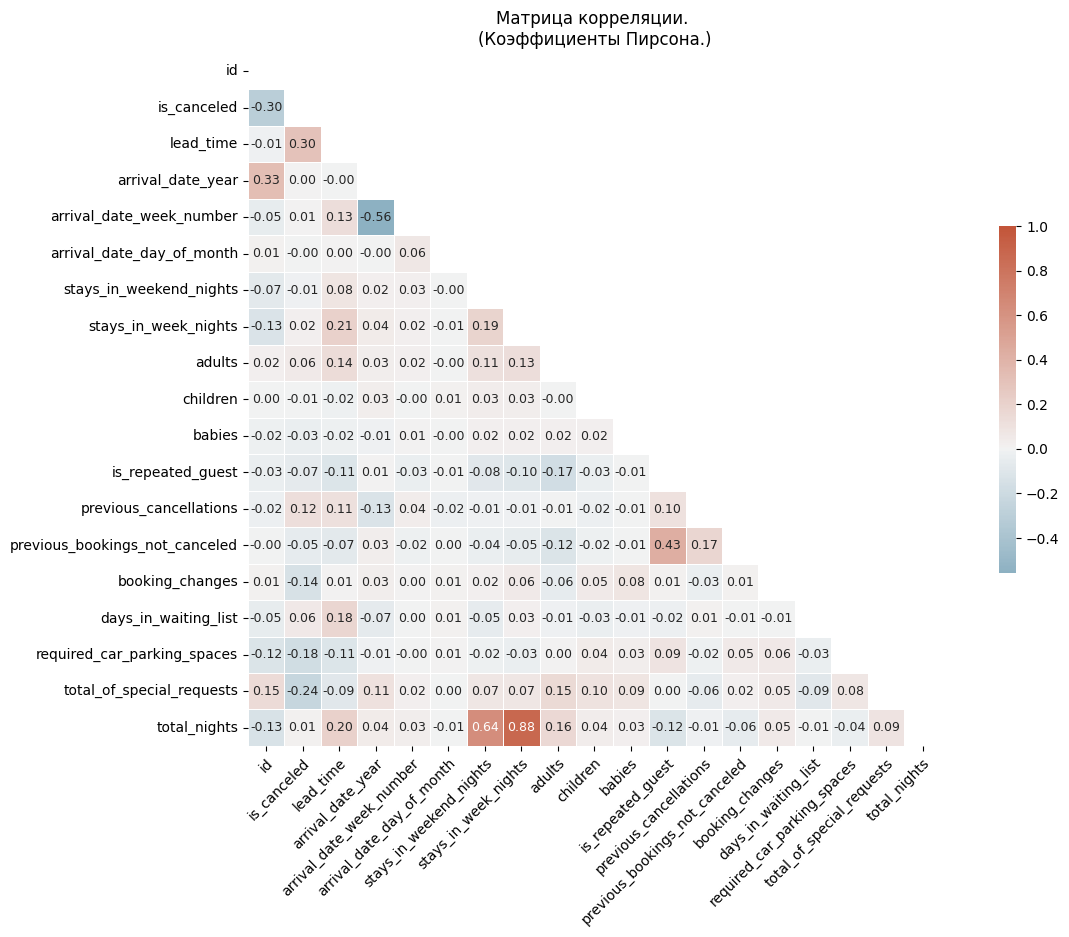

,Положительный класс в %. (Бронь отменена.),Отрицательный класс в %. (Бронь не отменена.),Уникальные значения.
Значение:,37.5%,62.5%,"0, 1"


,Коэффициент корреляции Пирсона.
lead_time,0.300
previous_cancellations,0.119
days_in_waiting_list,0.061
adults,0.056
stays_in_week_nights,0.024
total_nights,0.014
arrival_date_week_number,0.008
arrival_date_year,0.003
arrival_date_day_of_month,-0.004
children,-0.007


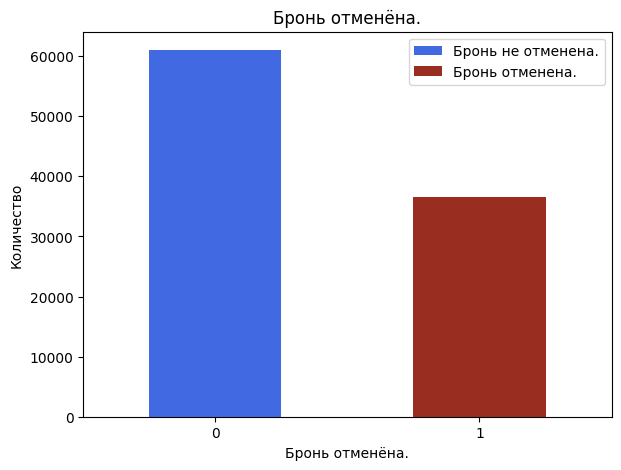

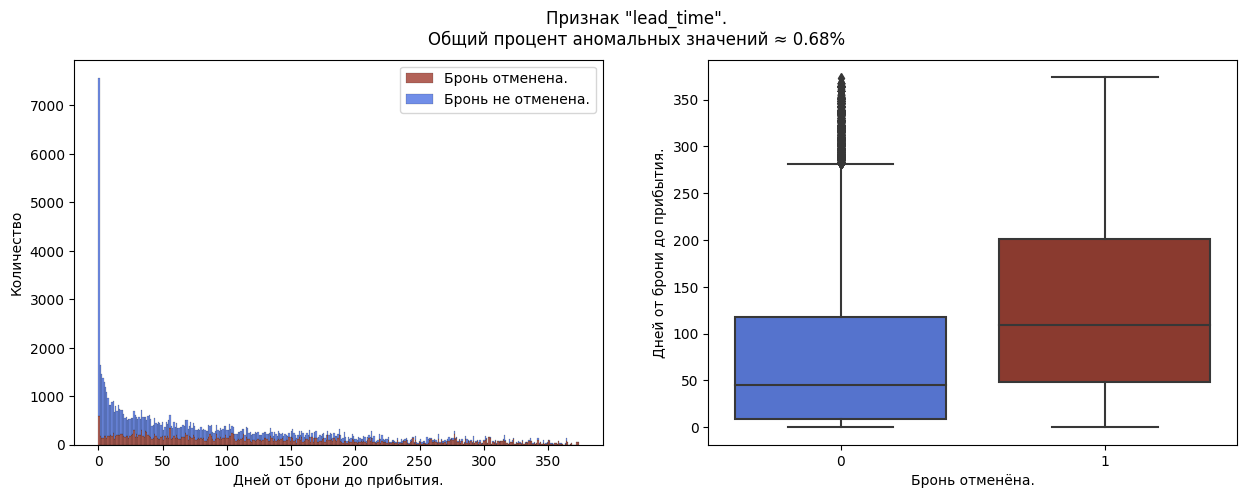

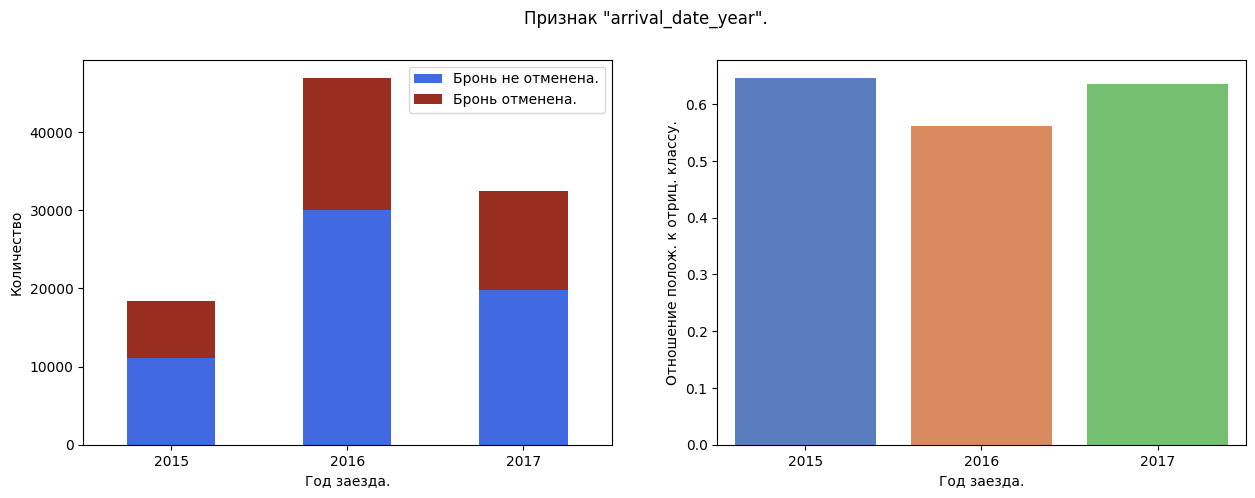

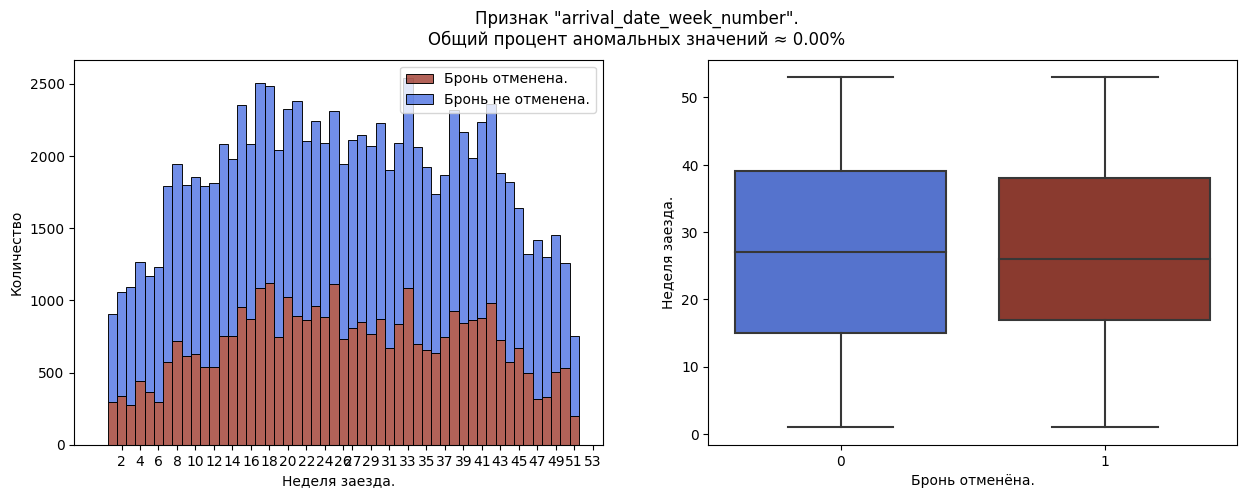

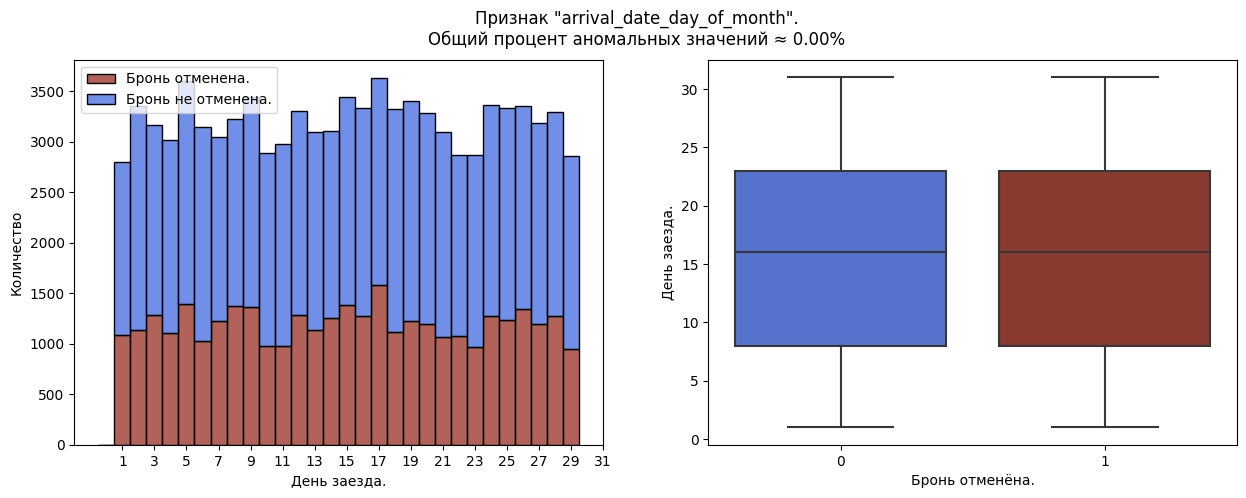

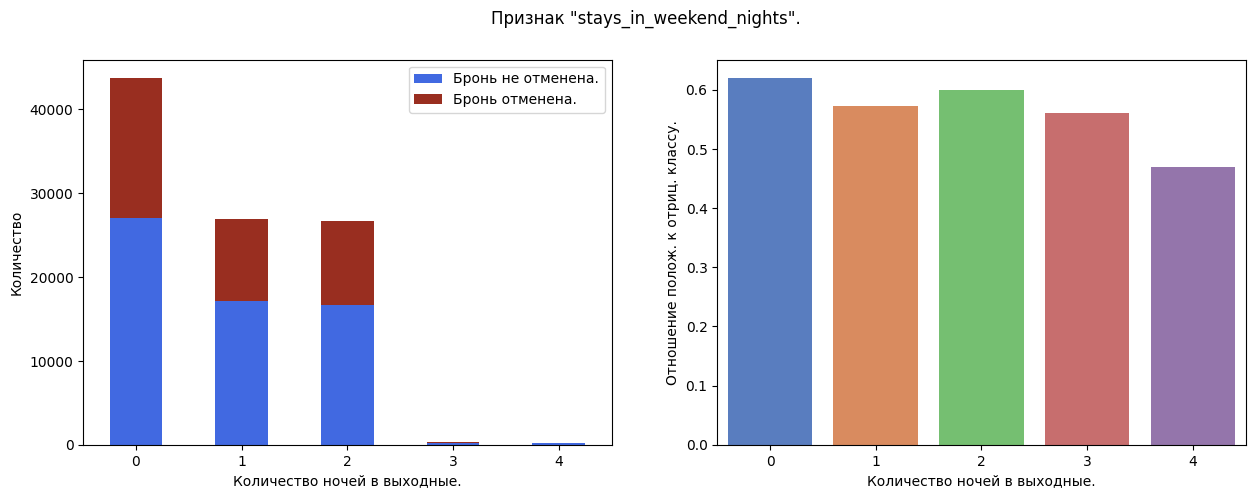

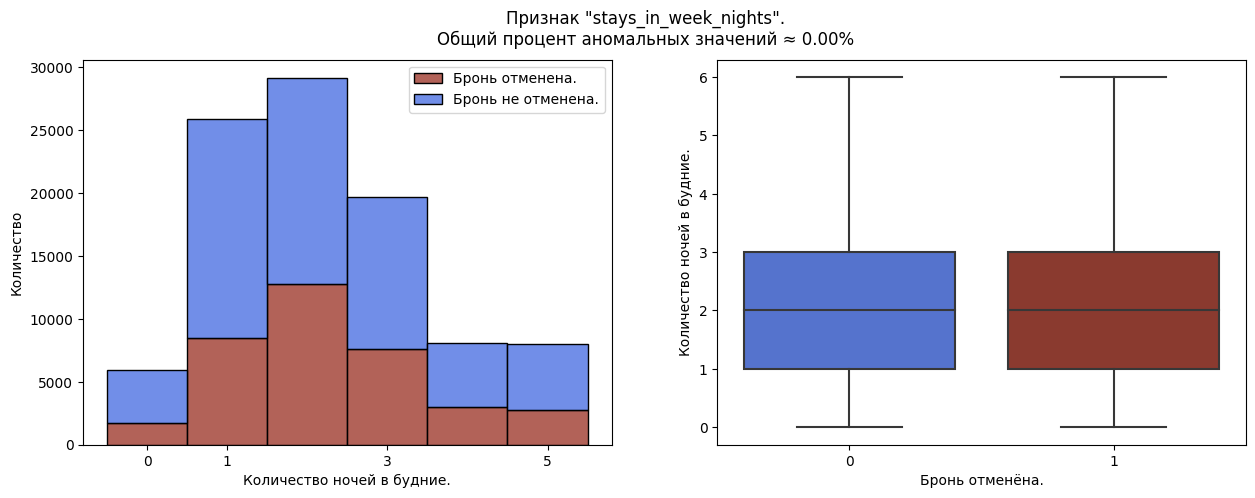

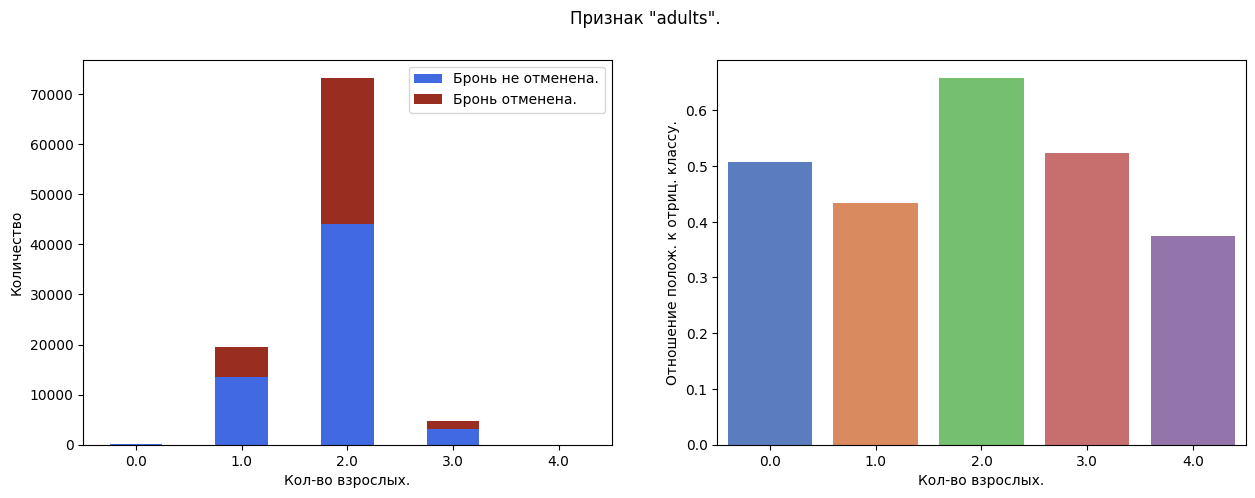

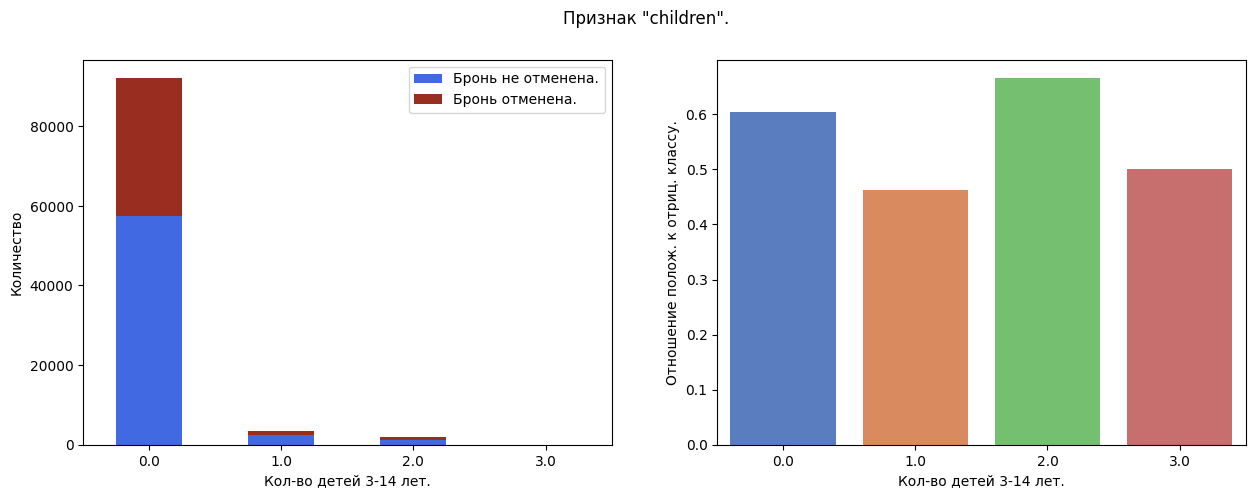

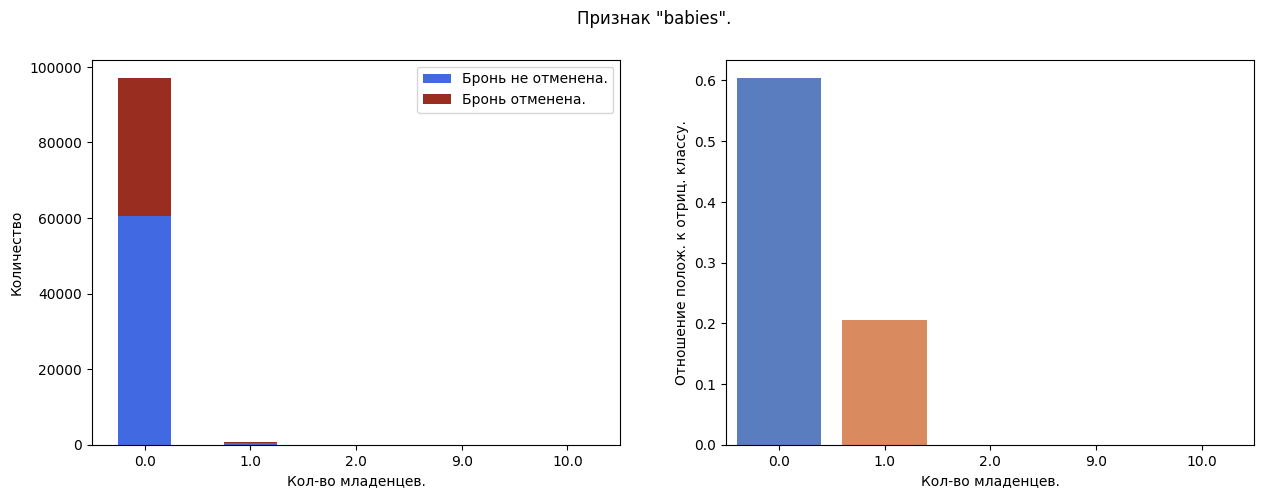

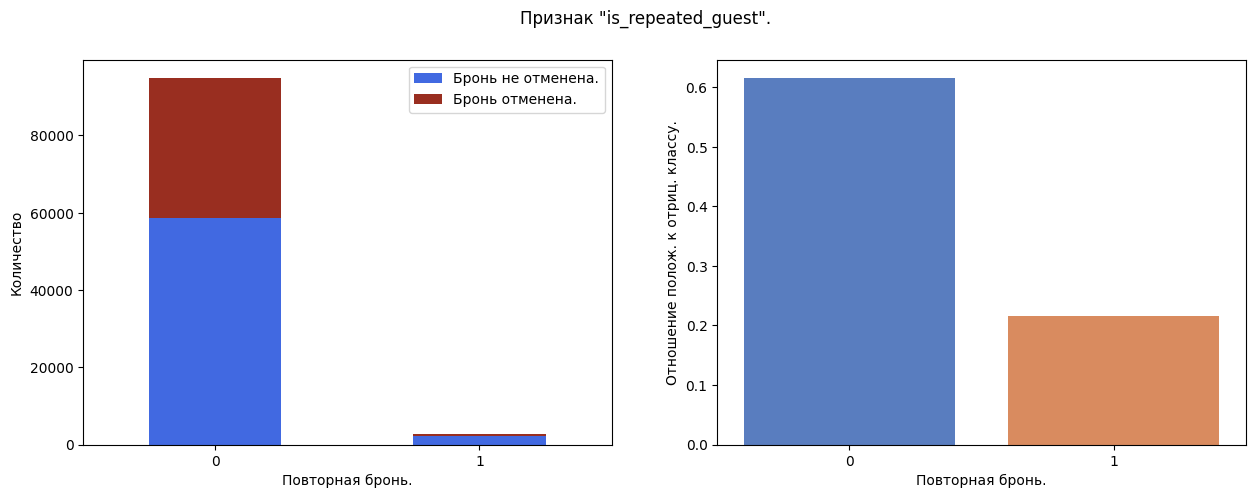

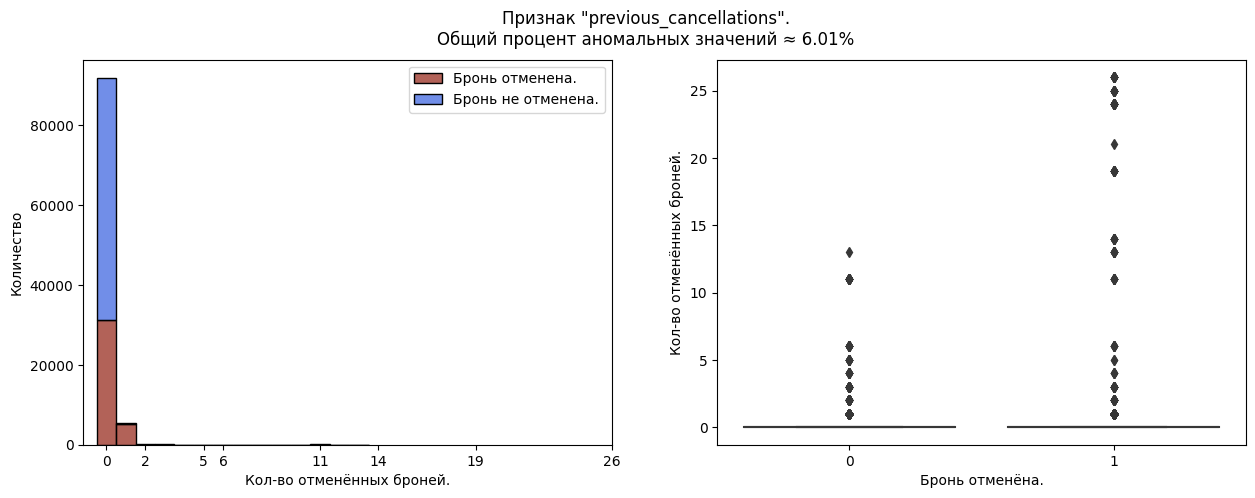

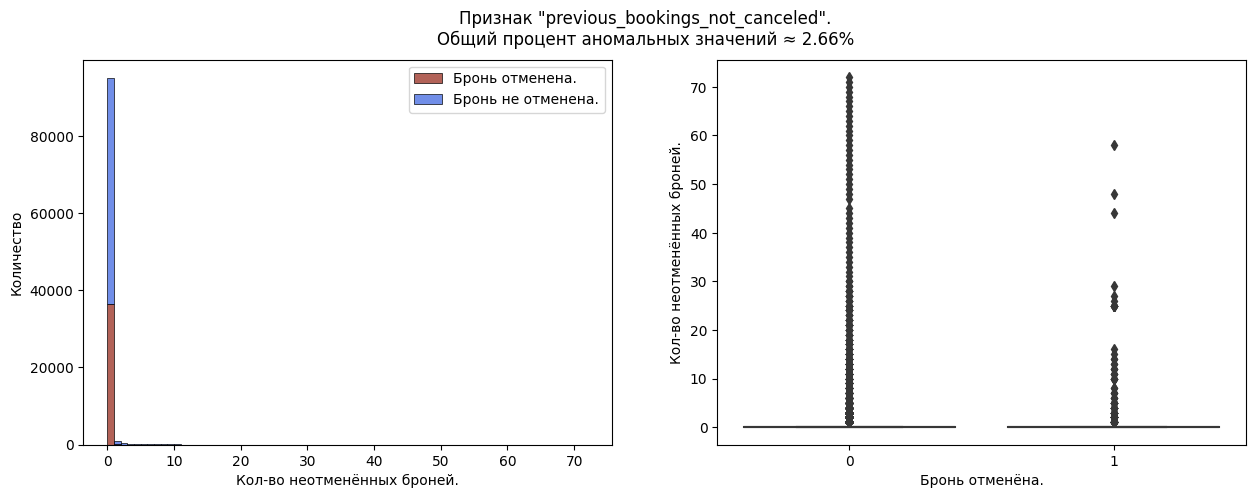

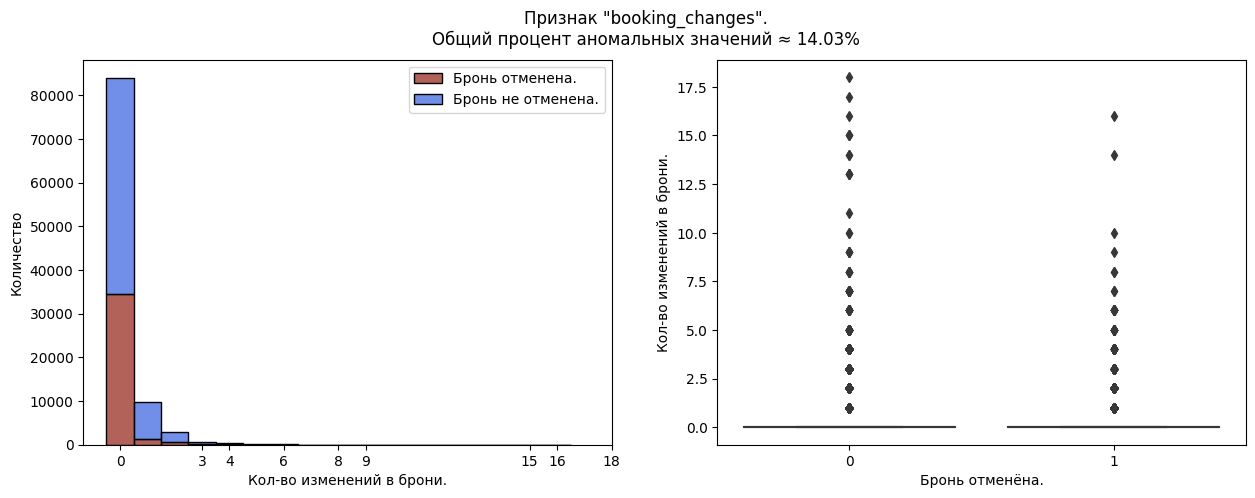

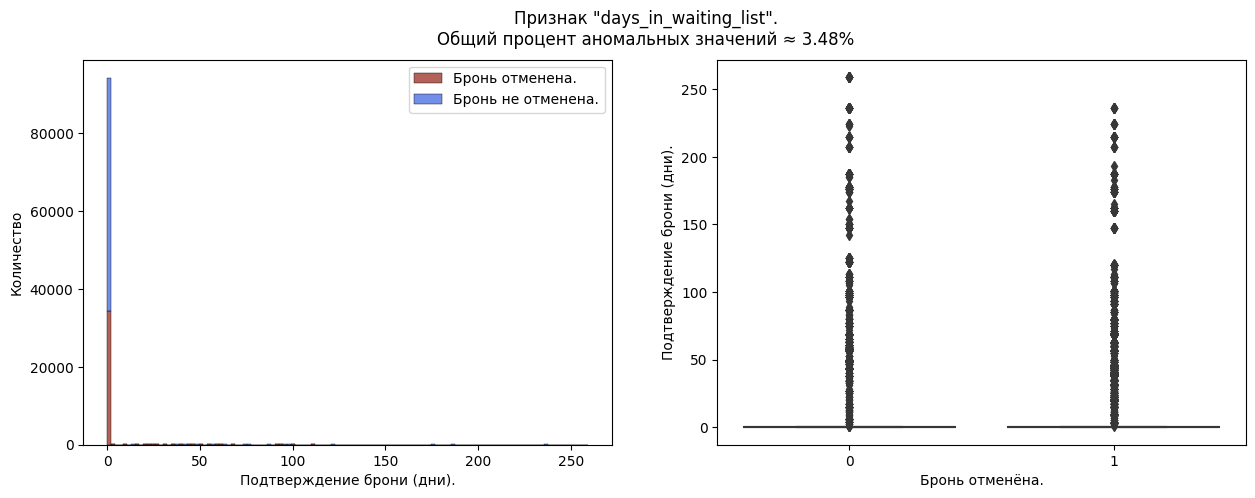

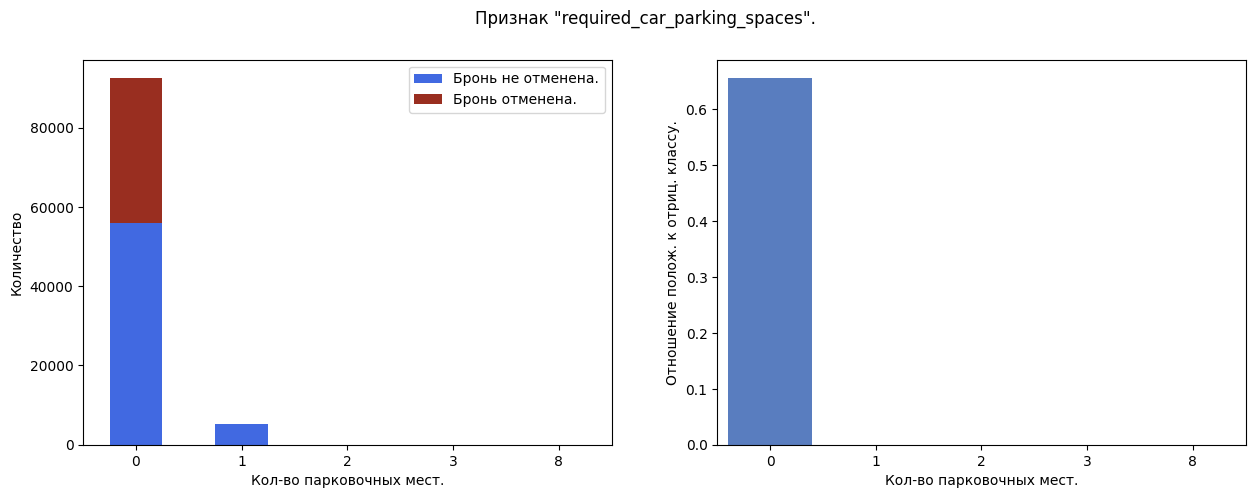

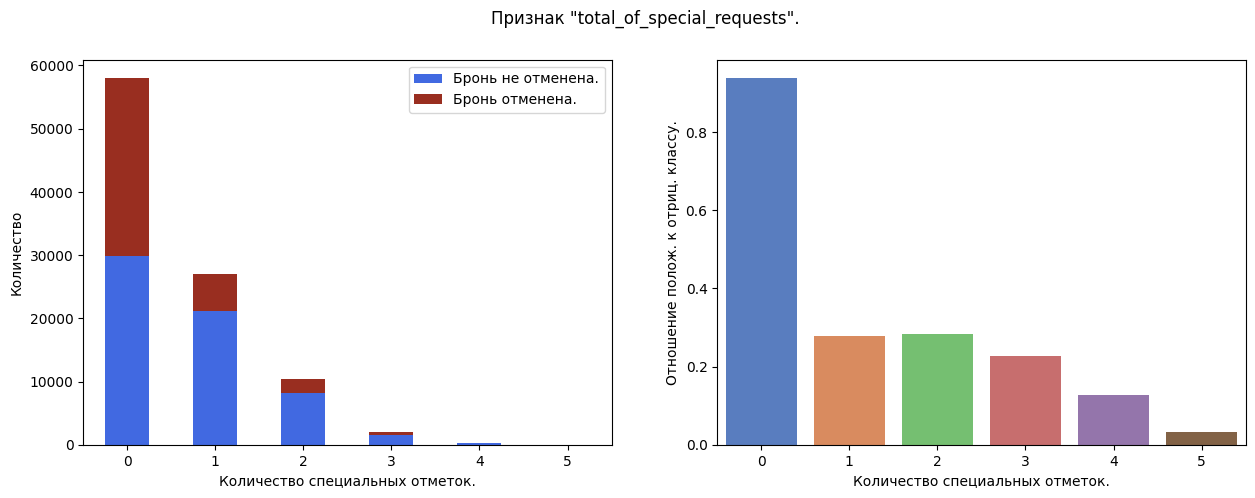

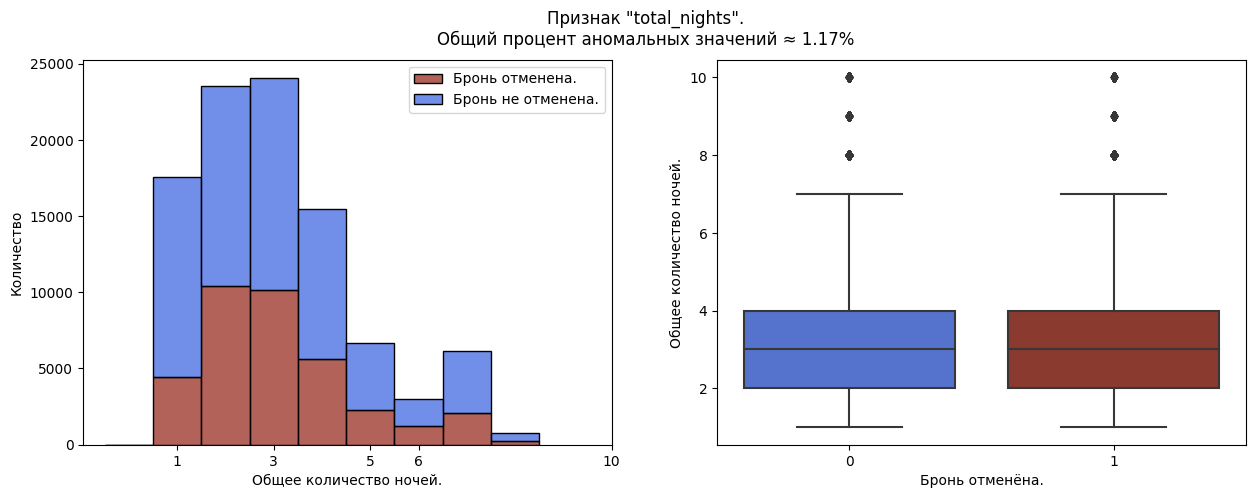

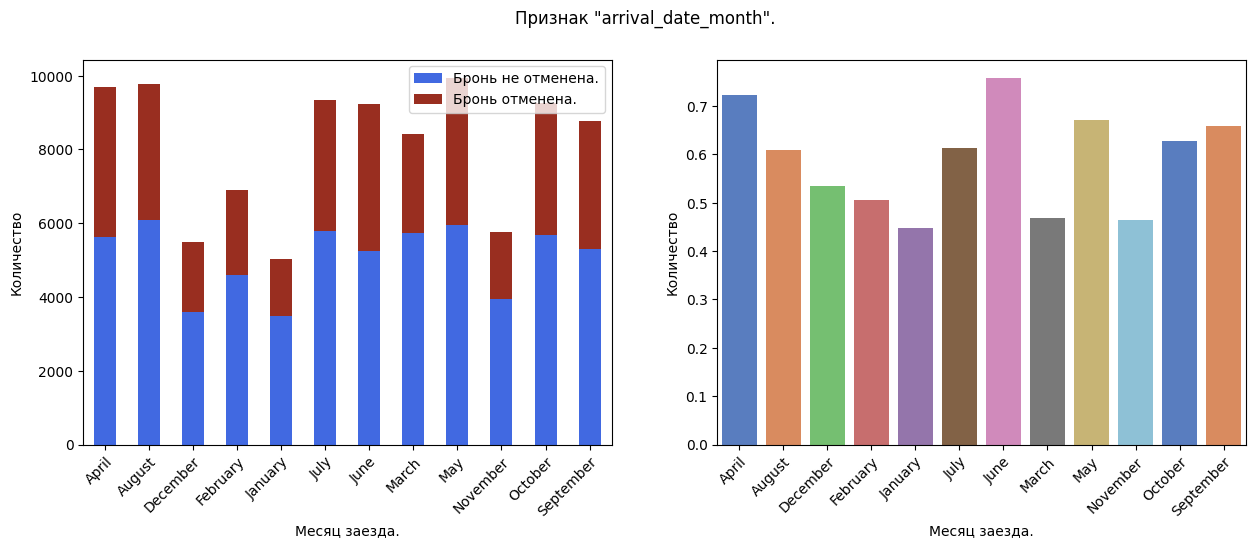

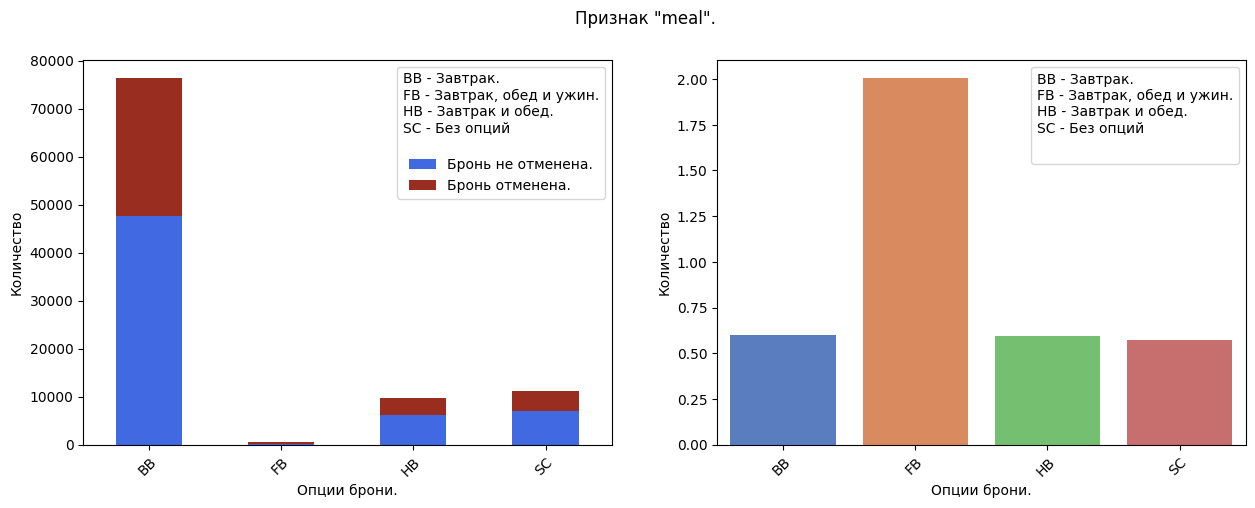

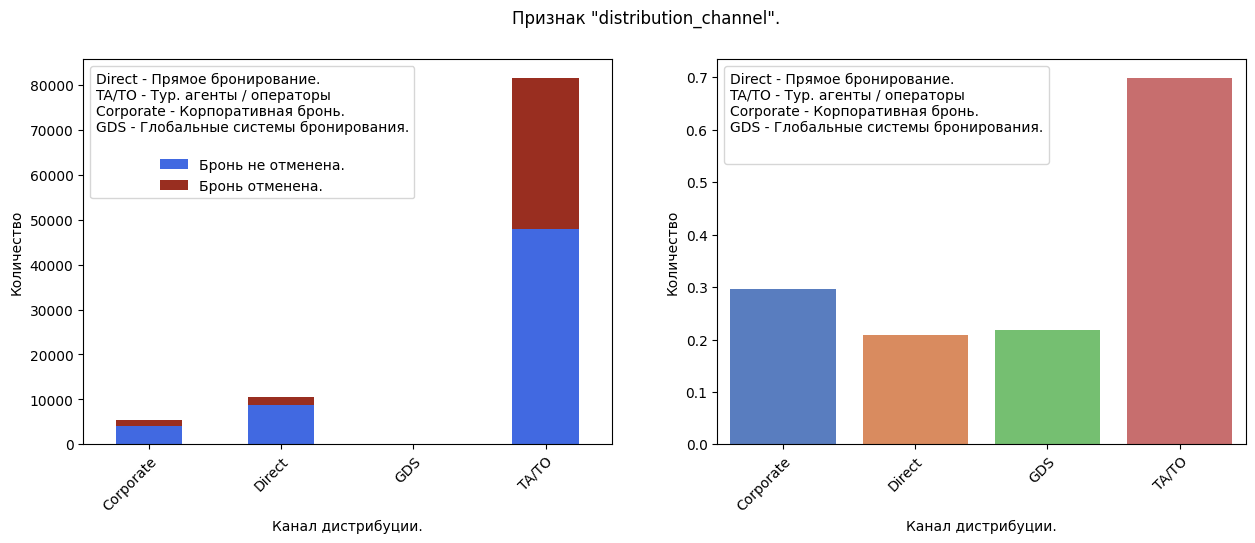

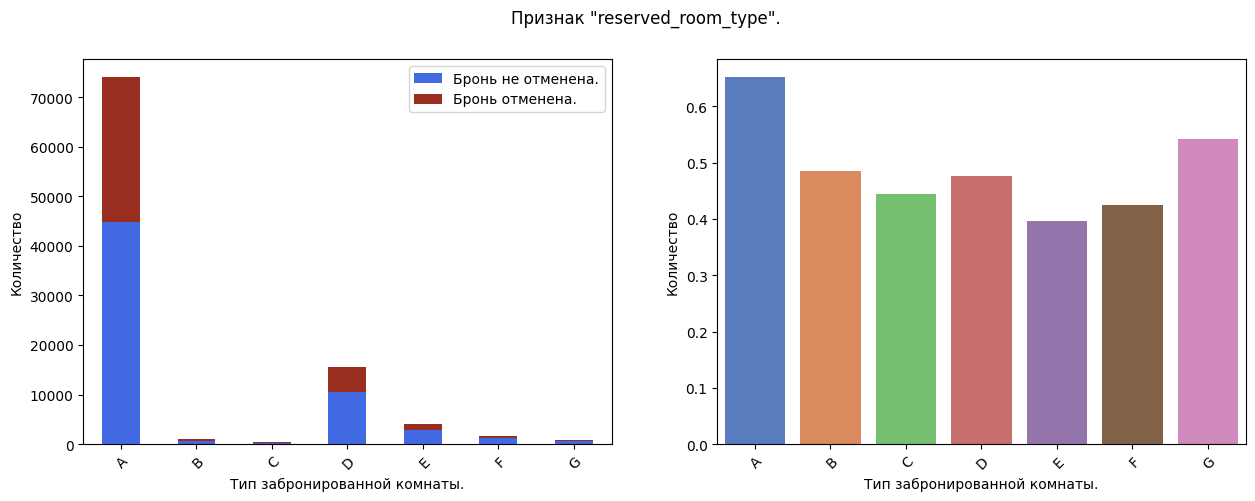

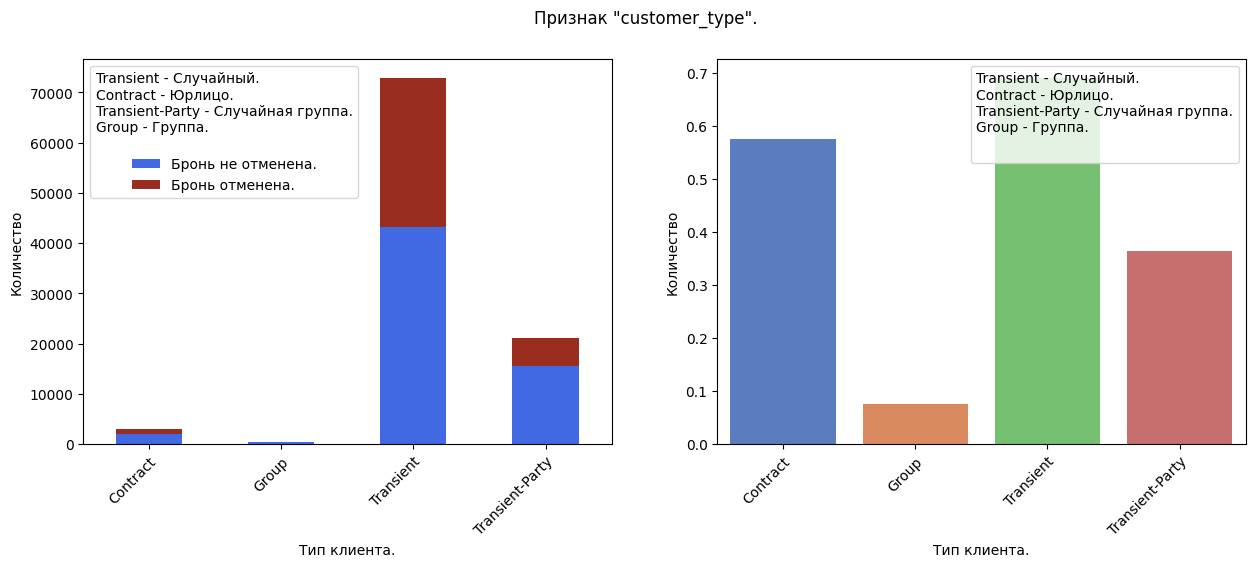


Размер обучающей (и валидационной) выборки: (65229, 25).

Размер тестовой выборки: (32412, 25).

Годы, представленные в обучающем датасете: [2015, 2016].
Годы, представленные в тестовом датасете: [2017].


In [13]:
# Запишем название целевого признака и цветовую палитру графиков в переменные.
target = 'is_canceled'
palette = {0 : 'royalblue', 1 : '#992e20'}

# Вызовем функции и выведем информацию о данных.
eda_data = pd.concat([hotel_train, hotel_test])
get_eda_data(eda_data)
get_eda_info((eda_data).drop(['id', 'country'], axis=1), target)

# Выведем размерности обучающего и тестового датафреймов.
print(f'\n\033[1mРазмер обучающей (и валидационной) выборки: {hotel_train.shape}.')
print(f'\nРазмер тестовой выборки: {hotel_test.shape}.\33[0m')

# Выведем годы, представленные размерности обучающего и тестового датафреймов.
print('\n\033[1mГоды, представленные в обучающем датасете: ' +
      f'{list(hotel_train["arrival_date_year"].unique())}.')
print('Годы, представленные в тестовом датасете: ' +
      f'{list(hotel_test["arrival_date_year"].unique())}.\33[0m')

#### Вывод дополнительной информации о данных.

- Отдельно изучим распределения признаков которые невозможно изучить на общих графиках из-за масштаба или аггрегации нескольких подгрупп.<br>
Признаки для дополнительного изучения:
  - `arrival_date_week_number`;
  - `country`;
  - `previos_cancellations`;
  - `previous_bookings_not_canceled`;
  - `days_in_waiting_list`,
  - `booking_changes`.

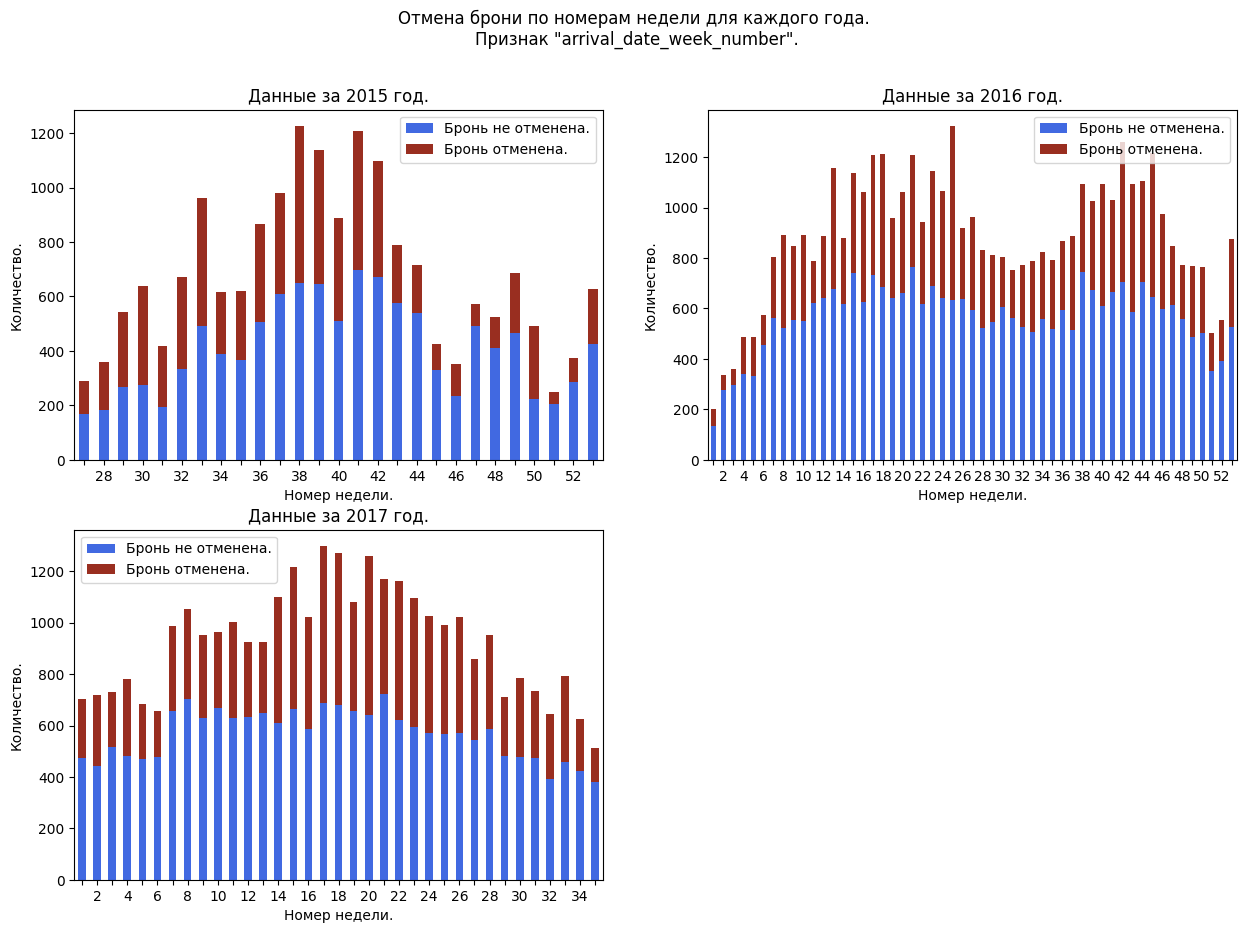

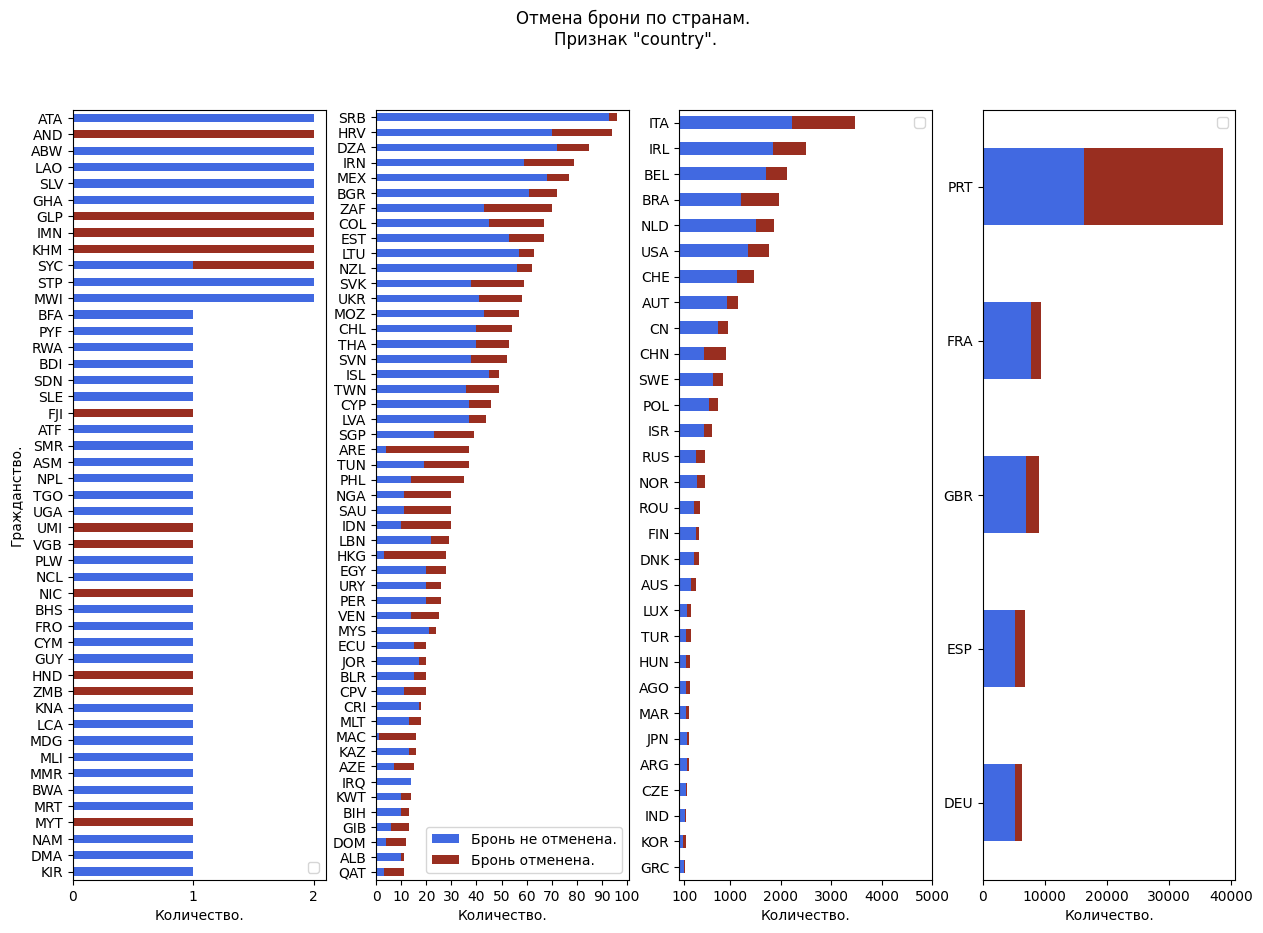

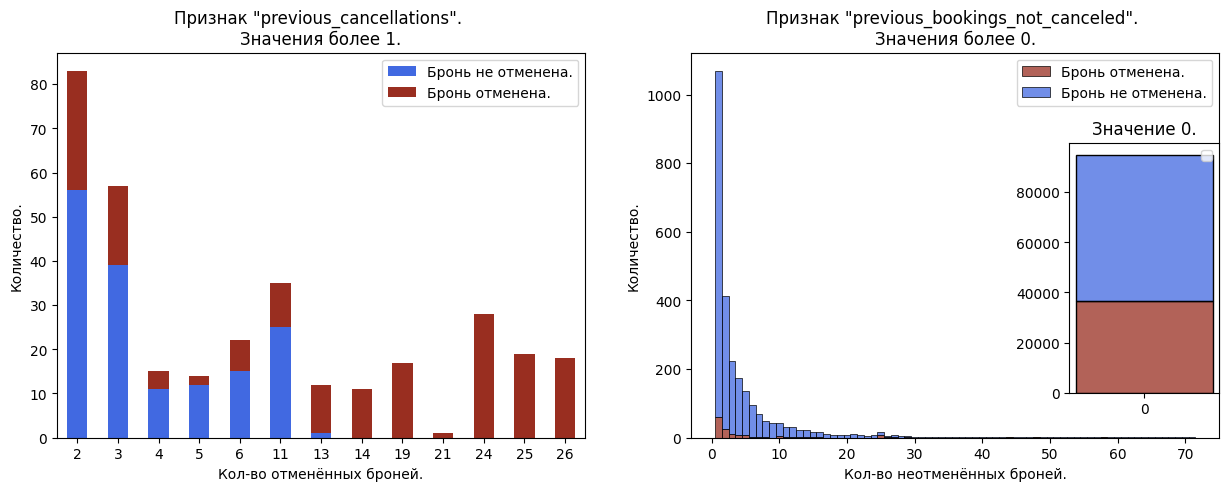

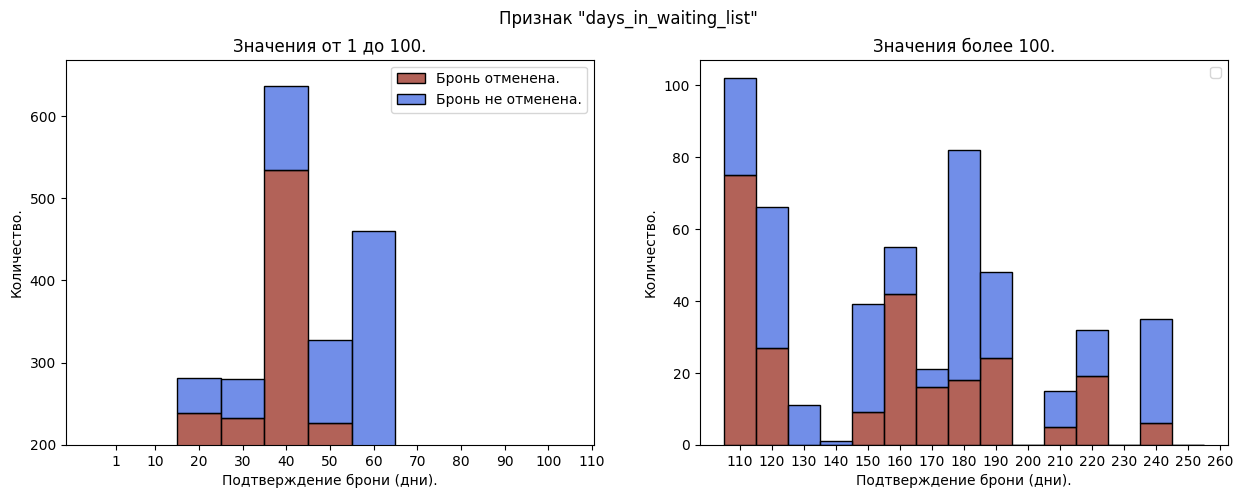

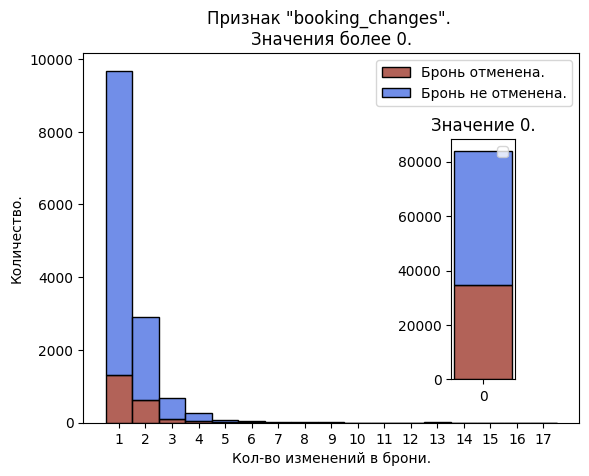

In [14]:
# Кол-во объектов по годам по номерам недели.
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Отмена брони по номерам недели для каждого года. \nПризнак ' +
             '"arrival_date_week_number".')
for year, axis in zip(eda_data['arrival_date_year'].unique(), axes.ravel()):
    data = eda_data.loc[eda_data['arrival_date_year'] == year]
    (pd.crosstab(data.arrival_date_week_number, data.is_canceled)
     .plot.bar(stacked=True, color=palette, ax=axis))
    axis.set_title(f'Данные за {year} год.')
    axis.legend([col_names['key_0'], col_names['key_1']])
    axis.set_xlabel('Номер недели.')
    axis.set_ylabel('Количество.')
    axis.set_xticklabels(axis.get_xticklabels(), rotation=0)
    plt.setp(axis.get_xticklabels()[::2], visible=False)
axes[1,1].remove()
plt.show();

# Создадим сводную таблицу кол-ва броней по странам с разделение на
# отменивших и нет.
cancel_by_country = pd.crosstab(eda_data.country, eda_data.is_canceled)
cancel_by_country['counts'] = cancel_by_country[0] + cancel_by_country[1]
cancel_by_country.sort_values(by='counts', inplace=True)

# Выведем распределение признака "country".
fig, axes = plt.subplots(1, 4, figsize=(15, 10))
fig.suptitle('Отмена брони по странам. \nПризнак "country".')
(cancel_by_country.loc[(cancel_by_country['counts'] < 3), [0,1]]
 .plot.barh(stacked=True, color=palette, ax=axes[0]))
axes[0].legend([])
axes[0].set_xlabel('Количество.')
axes[0].set_ylabel(col_names['country'])
axes[0].set_xticks([0, 1, 2])
(cancel_by_country.loc[(cancel_by_country['counts'] > 10) & \
 (cancel_by_country['counts'] <= 100), [0,1]]
 .plot.barh(stacked=True, color=palette, ax=axes[1]))
axes[1].legend([col_names['key_0'], col_names['key_1']])
axes[1].set_xlabel('Количество.')
axes[1].set_ylabel('')
axes[1].set_xticks(np.arange(0, 110, 10))
(cancel_by_country.loc[(cancel_by_country['counts'] > 100) & \
 (cancel_by_country['counts'] <= 5000), [0,1]]
 .plot.barh(stacked=True, color=palette, ax=axes[2]))
axes[2].legend([])
axes[2].set_xlabel('Количество.')
axes[2].set_ylabel('')
axes[2].set_xticks(np.append([100], np.arange(1000, 6000, 1000)))
(cancel_by_country.loc[cancel_by_country['counts'] > 5000, [0,1]]
 .plot.barh(stacked=True, color=palette, ax=axes[3]))
axes[3].legend([])
axes[3].set_xlabel('Количество.')
axes[3].set_ylabel('')
plt.show();


# Выведем распределение признака "previous_bookings_not_canceled" больше 1.
fig, axes = plt.subplots(1,2, figsize=(15, 5))
data = eda_data.loc[eda_data['previous_cancellations'] > 1]
(pd.crosstab(data['previous_cancellations'], data[target])
 .plot(kind='bar', stacked=True, color=palette, rot=0, ax=axes[0]))
axes[0].set_title('Признак "previous_cancellations". \nЗначения более 1.')
axes[0].legend([col_names['key_0'], col_names['key_1']])
axes[0].set_xlabel(col_names['previous_cancellations'])
axes[0].set_ylabel('Количество.')

# Выведем распределение признака "previous_bookings_not_canceled" больше 0.
data = eda_data.loc[eda_data['previous_bookings_not_canceled'] > 0]
sns.histplot(data=data, x='previous_bookings_not_canceled',
             bins=np.sort(data['previous_bookings_not_canceled'].unique())-0.5,
             hue=target, multiple='stack', palette=palette, ax=axes[1])
# Выведем распределение признака "previous_bookings_not_canceled" равное 0
# на доп. оси.
plt.axes([.8, .2, .1, .5])
sns.histplot(eda_data[eda_data['previous_bookings_not_canceled'] == 0],
             x='previous_bookings_not_canceled', hue=target,
             multiple='stack',  palette=palette)
plt.title('Значение 0.')
plt.legend([])
plt.xlabel('')
plt.ylabel('')
plt.xticks([0])
axes[1].set_title('Признак "previous_bookings_not_canceled". ' +
                  '\nЗначения более 0.')
axes[1].legend([col_names['key_1'], col_names['key_0']])
axes[1].set_xlabel(col_names['previous_bookings_not_canceled'])
axes[1].set_ylabel('Количество.')
plt.show();


# Выведем распределение признака "days_in_waiting_list" > 0 и < 100.
fig, axes = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle('Признак "days_in_waiting_list"')
data = eda_data.loc[(eda_data['days_in_waiting_list'] > 0) & \
                    (eda_data['days_in_waiting_list'] <= 100)]
sns.histplot(data=data, x='days_in_waiting_list',
             bins=np.arange(0, 111, 10)-5, hue=target,
             multiple='stack', palette=palette, ax=axes[0])
axes[0].set_ylim(200.0)
axes[0].set_title('Значения от 1 до 100.')
axes[0].set_xticks(np.append([1], np.arange(10, 111, 10)))
axes[0].legend([col_names['key_1'], col_names['key_0']])
axes[0].set_xlabel(col_names['days_in_waiting_list'])
axes[0].set_ylabel('Количество.')

# Выведем распределение признака "days_in_waiting_list" >  100.
data = eda_data.loc[eda_data['days_in_waiting_list'] > 100]
sns.histplot(data=data, x='days_in_waiting_list',
             bins=np.arange(110, 261, 10)-5, hue=target,
             multiple='stack', palette=palette, ax=axes[1])
axes[1].set_title('Значения более 100.')
axes[1].set_xticks(np.arange(110, 261, 10))
axes[1].legend([])
axes[1].set_xlabel(col_names['days_in_waiting_list'])
axes[1].set_ylabel('Количество.')
plt.show();

# Выведем распределение признака "booking_changes". Значения более 0.
data = eda_data.loc[eda_data['booking_changes'] > 0]
sns.histplot(data=data, x='booking_changes',
             bins=np.sort(data['booking_changes'].unique())-0.5,
             hue=target, multiple='stack', palette=palette)
plt.title('Признак "booking_changes". \nЗначения более 0.')
plt.xticks(np.arange(1, 18, 1))
plt.legend([col_names['key_1'], col_names['key_0']])
plt.xlabel(col_names['booking_changes'])
plt.ylabel('Количество.')
# Выведем распределение признака "booking_changes". Значения равные 0.
plt.axes([.7, .2, .1, .5])
sns.histplot(eda_data[eda_data['booking_changes'] == 0],
             x='booking_changes', hue=target,
             multiple='stack',  palette=palette)
plt.title('Значение 0.')
plt.legend([])
plt.xlabel('')
plt.ylabel('')
plt.xticks([0])
plt.show();

#### Промежуточные выводы.

- На диаграммах признака `country` количества клиентов по странам видно, что Португалия насчитывает гораздо большее кол-во клиентов чем остальные страны.<br>
Выведем точное количество клиентов в Португалии и остальных странах.

- Диаграмма признака `previous_cancellations` кол-ва отменённых броней показывает, что после 13 отменённых в прошлом броней, отмена брони гарантирована, что, возможно, связано с предварительным выкупом номеров тур. операторами / агентами. <br>
Выведем типы каналов дистрибуции и номеров, а также минимальное количество дней от брони до заезда для проверки гипотезы.

- Проверим соответствие количества отметок в признаке `is_repeated_guest` наличию предыдущих броней в признаках `previous_bookings_not_canceled` и/или `previous_cancellations`, которые по описанию должны соответствовать и иметь корреляцию выше наблюдаемой.
- Выведем каналы дистрибуции при ожидании подтверждения брони 60 дней, чтобы проверить гипотезу о бронировании туристистическими операторами.

In [15]:
# Выведем точное количество клиентов в Португалии и остальных странах.
display(
    pd.DataFrame(
        data={
            f'Положительный класс в %. ({col_names["key_1"]})' :
            ['{:.1%}'.format(
                eda_data.loc[eda_data["country"] == "PRT", "is_canceled"]
                .value_counts(normalize=True)[1]
                ),
             '{:.1%}'.format(
                  eda_data.loc[eda_data["country"] != "PRT", "is_canceled"]
                  .value_counts(normalize=True)[1]
                  ),
             f'{eda_data["is_canceled"].value_counts(normalize=True)[1]:.1%}'],

            f'Отрицательный класс в %. ({col_names["key_0"]})' :
            ['{:.1%}'.format(
                eda_data.loc[eda_data["country"] == "PRT", "is_canceled"]
                .value_counts(normalize=True)[0]
                ),
             '{:.1%}'.format(
                  eda_data.loc[eda_data["country"] != "PRT", "is_canceled"]
                  .value_counts(normalize=True)[0]
                             ),
             f'{eda_data["is_canceled"].value_counts(normalize=True)[0]:.1%}'],

            'Общее кол-во броней.' :
             [eda_data.loc[eda_data['country'] == 'PRT'].shape[0],
              eda_data.loc[eda_data['country'] != 'PRT'].shape[0],
              eda_data.shape[0]]
            },
        index=['Значения для Португалии:',
               'Значения для остальных стран:',
               'Значения для всех стран:']
        )
    .style
    .set_caption('Сравнительные данные. \nПортугалия и остальные страны.')
    .set_table_styles(styles)
    )
print('\n')
print('~' * 70)
print('\n')

# Выведем данные для количества отменённых броней более 13.
display(
    pd.DataFrame(
        index=[''],
        data={'Мин. дней от брони до заезда.' :
        int(eda_data.loc[eda_data['previous_cancellations'] > 13,
                         'lead_time'].min()),
         'Типы забронированных номеров.' :
        eda_data.loc[eda_data['previous_cancellations'] > 13,
                     'reserved_room_type'].unique(),
         'Топ канал дистрибуции.' :
        eda_data.loc[eda_data['previous_cancellations'] > 13,
                     'distribution_channel'].value_counts().index[0],
         'Кол-во клиентов с неотменёнными бронями.' :
        eda_data.loc[(eda_data['previous_cancellations'] > 13) & \
         (eda_data['previous_bookings_not_canceled'] > 0)].shape[0]}
        )
    .style
    .set_caption('Даные для количества отменённых броней более 13.')
    .set_table_styles(styles)
    )


print('\n')
print('~' * 70)
print('\n')

# Выведем доп. информацию по признаку "previous_bookings_not_canceled".
print('\033[1mКоличество объектов с несоответствием наличия ' +
      'успешных/отменённых броней\nотметке повторной брони в признаке ' +
      '"is_repeated_guest": ',
      eda_data[((eda_data['previous_bookings_not_canceled'] > 0) | \
       (eda_data['previous_cancellations'] > 0)) & \
        (eda_data['is_repeated_guest'] == 0)].shape[0], '.\033[0m')

print('\n')
print('~' * 70)
print('\n')

# Выведем каналы дистрибуции при ожидании подтверждения брони 60 дней.
print('\033[1mКаналы дистрибуции при ожидании подтверждения брони 60 дней.',
      '(признак \n"days_in_waiting_list"):',
      list(eda_data.loc[eda_data['days_in_waiting_list'] == 60,
                        'distribution_channel'].unique()), '.\033[0m')

,Положительный класс в %. (Бронь отменена.),Отрицательный класс в %. (Бронь не отменена.),Общее кол-во броней.
Значения для Португалии:,58.1%,41.9%,38718
Значения для остальных стран:,24.0%,76.0%,58923
Значения для всех стран:,37.5%,62.5%,97641




~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




,Мин. дней от брони до заезда.,Типы забронированных номеров.,Топ канал дистрибуции.,Кол-во клиентов с неотменёнными бронями.
,166,A,TA/TO,0




~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Количество объектов с несоответствием наличия успешных/отменённых броней
отметке повторной брони в признаке "is_repeated_guest":  5397 .


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Каналы дистрибуции при ожидании подтверждения брони 60 дней. (признак 
"days_in_waiting_list"): ['TA/TO'] .


### Исследовательский анализ данных. Выводы:

#### Информация о составе данных.
- Размер обучающей (и валидационной) выборки: 65229 объекта, 25 признаков.
- Размер тестовой выборки: 32412 объекта, 25 признаков.
- Данные представлены 12-ю категориальными признаками, один из которых целевой, и 13-ю количественными.
- Признак `id`, содержащий только уникальные номера строк, не несёт информации необходимой для анализа и будет удалён.
- Наличие данных.
  - Годы, представленные в обучающем датасете: частично 2015 и полностью 2016.
  - Годы, представленные в тестовом датасете: частично 2017.<br>

#### Целевой признак:
- Целевой признак категориальный, бинарный.<br>
- Классы несбалансированы. Соотношение классов:
 - 37.5% положительный класс / 62.5% отрицательный класс.<br>
Дисбаланс будет учтён при разработке моделей.

_Примечание:_ т.к. в рамках данной работы будут использованы только модели, основанные на деревьях решений, даже необработный дисбаланс классов не должен повлиять на результаты.<br>

#### ML задача:
  - Т.к. целевой признак определен и бинарен, задача построения предиктивной модели сводится к бинарной классификации, "обучению с учителем".<br>

#### Признак `country`, значение `PRT` - Португалия:
- Как видно из диаграммы "Отмена брони по странам." и сравнительной таблицы, баланс классов для страны с кодом `PRT`, Португалии, не соответствует ни общему балансу классов, ни балансу классов для совокупности остальных стран, а именно, в Португалии на ~21% и ~26% больше отменённых броней соответственно. Также, Португалия насчитывает наибольшее кол-во броней среди всех стран.<br>

> <details><summary>Примечание.</summary>
Т.к. брони из Португалии составляют ~40% от общего числа объектов, при этом баланс классов для этой страны не соответствует ни общему для всех объектов, ни балансу классов для совокупности всех кроме Португалии стран, для повышения качества прогнозов имеет смысл разделить объекты в каждом датафрейме поочередно, отделив выборки для Португалии и остальных стран, и создать модели и рассчитать их прибыльность для каждой из этих выборок отдельно. <br>
К сожалению, нехватка времени не позволила реализовать модели и для общей выборки и для Португалии и остальных стран отдельно. В будущем, планирую дополнить копию работы данными с таким разделением.
</details>


#### Пропуски в данных.
- Пропусков в данных не обнаружено.
- Нулевые значения описаны отдельно для каждого признака.
- Необходимо заменить нулевые значения в признаке `is_repeated_guest` метками 1, соответствующими существующим броням в признаках `previous_cancellations` и `previous_bookings_not_canceled`.

#### Аномалии в данных.
- Необходимо обработать аномальные значения в признаках:
  - `previous_cancellations`;
  - `babies`.

#### Дубликаты в данных.
  - Явных и аномальных дубликатов в данных не обнаружено.<br>

#### Формат данных.
  - Формат всех столбцов соответствует типу значений в столбцах. В рамках данной работы несоответствие формата некоторых столбцов смыслу содержания не имеет значения.<br><br>
-----------------------------------------------------------------------
#### Признаки по всем странам.
Признаки необходимо  закодировать.
  - Дней от брони до прибытия. | `lead_time`:
    - Наблюдается наивысшая относительно других предикторов, но слабая линейная корреляция с целевым признаков.
    - Распределение приближенно Пуассона.
	- Незначительное кол-во аномальных значений в отрицательном классе.
	- Клиенты в основном не отменяют брони при ожидании от 0 до 110 дней, и начинают активно отменять после, что, скорее всего показывает горизонт планирования клиентов - менее 110 дней.
	- Данный признак содержит около 5000 объектов с нулевыми значениями, что может означать относительно большое количество броней и заездов день в день, - тенденция, которая стала возможной, благодаря развитию различных проиложений для бронирования.
  - Год заезда. | `arrival_date_year` :
    - Т.к. каждый год представлен различным кол-вом месяцев, анализ распределения условен.
    - Приблизительно одинаковое соотношение отменённых и неотменённых броней в 2015 и 2017 гг. В 2016 г. отмененных броней относительно меньше.
	- Линейная корреляция с целевым признаком отсутствует.
    - Данный признак полезен только для анализа исторических данных и должен быть удалён перед построением моделей.
  - Неделя заезда | `arrival_date_week_number` :
    - Распределение мультимодально.
	- Заметна небольшая линейная корреляция с признаком `arrival_date_year`. На дополнительных графиках видно, что
	  - данные за весь год присутствуют присутствуют только для 2016 года,
	  - для 2015 года в наличии только данные с июля,
	  - для 2017 года в наличии только данные по август.
	  Скорее всего, корреляция номера недели с годом, обусловлена именно данными в наличии. Рисунок распределений более-менее одинаков, поэтому проанализируем все данные без разделения.
	- Количество броней падает с начала декабря по начало февраля и достигает пиков с апреля по август с дополнительными пиками осенью, с середины сентября по середину октября, в, так называемый, бархатный сезон.<br>
	Такие показатели, скорее всего, обусловлены нежеланием клиентов совершать туристические или деловые поездки в непогоду и повсеместное празднование нового года.
	- Линейная корреляция с целевым признаком отсутствует.
    - Так как в данных нет полной информации по всем месяцам и номерам недель для всех лет, признак необходимо удалить перед обучением модели.
  - День заезда. | `arrival_day_of_month` :
    - Распределение равномерно.
	- Линейная корреляция с целевым признаком отсутствует.
  - Количество ночей в выходные. | `stays_in_weekend_nights` :
    - Самая представительная категория с наивысшим относительным показателем отмены брони - 0 ночей в выходные, т.е. длительность пребывания менее недели. Возможно, это деловые поездки и короткие экскурсионные туры.
    - Количество отменнённых броней уменьшается с увеличением кол-ва ночей в выходные, за исключением 2 ночей.
	- Линейная корреляция с целевым признаком отсутствует.
  - Количество ночей в будние | `stays_in_week_nights` :
    - Самая представительная категория - от 1 до 3 ночей, что соответствует большому количеству броней без выходных.
	Только на выходные броней чуть меньше, чем остальных.
  - Количество взрослых. | `adults` :
    - Самая представительная категория - 2-ое взрослых, насчитывает наибольший относительный показатель отмен броней.
	- Категория броней с низшим количеством отмен, исключая миноритарные, - 1 взрослый.
    - Броней без взрослых и компаний взрослых более 3 крайне мало.
  - Количество детей 3-14 лет. | `children` :
    - Самая представительная категория броней - без детей, - вторая по относительному количеству отмен.
	- Меньше всего отмен броней в делают клиенты с одним ребёнком.
  - Количество младенцев. | `babies` :
    - Самая представительная категория - без младенцев.
	- Менее всего отмен броней при 1 младенце.
	- В данных присутствуют два аномальных значения - 9 и 10 младенцев. Их необходимо обработать.
  - Повторная бронь. | `is_repeated_guest` :
    - Относительный показатель отмен брони в три раза меньше среди повторно бронирующих клиентов, что говорит о хорошем качестве отелей сети.
	- Признак содержит 5397 нулевых значений в отметках о повторной брони, которые соответствуют либо не отменённым, либо отменённым броням. Необходима обработка.
  - Количество отменённых броней. | `previous_cancellations` :
    - Подавляющее большинство клиентов не отменяли брони или отменяют их впервые.
	- При количестве отменённых в прошлом броней более 13 наблюдается 100% отмена и ни одной неотменённой брони. Такие бронирования, в основном осуществляются тур. агентствами/агентами, скорее всего, для перепродажи, и не являются маркером поведения клиентов.<br>
	Удалим такие объекты и рекомендуем взимать депозит и/или предоплату со всех клиентов у которых более 13 отмен брони и ни одной подтвержденной.
  - Количество неотменённых броней | `previous_bookings_not_canceled` :
	- На дополнительной диаграмме признака видно, что абсолютное и относительное количество отмен бронирования для клиентов с предыдущими бронями резко ниже, чем для клиентов, не имеющих броней, т.е., как и следовало ожидать, клиенты с уже имеющимися бронями надёжнее.
  - Количество изменений брони | `booking_changes` :
    - На дополнительной диаграмме видно, что если при отсутствии изменений брони количество отмен велико, то при наличии изменений относительное количество отмен резко уменьшается, что, скорее всего, говорит о том, что клиенты, вносящие изменения в бронь, заинтересованы в ней и активно планируют своё пребывание в отеле.
  - Подтверждение брони (дни) | `days_in_waiting_list` :
    - Клиенты, ожидавшие подтверждение брони 60 дней, не отменяют её, т.к. такое время ожидание наблюдается только при бронировании через туристические агентства/агентов и, видимо, означает покупку тура.
  - Кол-во парковочных мест | `required_car_parking_spaces` :
    - Чем больше парковочных мест, тем надёжнее клиент.
  - Количество специальных отметок | `total_of_special_requests` :
    - Чем больше специальных отметок в брони, тем меньше вероятность её отмены.
  - Общее количество ночей | `total_nights`:
    - Клиенты, бронирующие 2 или 3 ночи, менее надёжны.
  - Месяц заезда | `arrival_date_month` :
    - Относительно количество отмен брони меньше вссего в январе, марте и ноябре, но и клиентов в эти месяцы меньше всего. Среди месяцев с большим количеством клиентов, меньше всего отмен брони в июле и августе.
    - Так как в данных нет полной информации по всем месяцам и номерам недель для всех лет, признак необходимо удалить перед обучением модели.
  - Опции брони | `meal`:
    - Клиентов, в брони которых указана опция "Завтрак, обед и ужин" - `FB`, меньше всего и они самые ненадёжные.
  - Страна | `country` :
    - В признаке присутствует несколько десятков стран с одной и двумя бронями. <br>
> <details><summary>Примечание.</summary>
Такие объекты имеет смысл удалять только при низком качестве прогнозов модели, т.к., в целом, если модель будет первое время предсказывать отмену брони всем жителям Никарагуа, у которых всего одна бронь, она же отменённая, - это, скорее, будет являтся плюсом модели.
</details>
  - Канал дистрибуции | `distribution_channel` :
    - Самыми ненадёжными бронями являются брони через туристические агентства/агентов. Самыми надёжными - прямые брони и брони через глобальные системы бронирования - `GDS`.
  - Тип забронированной комнаты | `reserved_room_type` :
    - Самые ненадёжные - брони самых дорогих номеров, категории `A`. Самыми надёжными являются брони недорогих номеров  категорий `E` и `F`.
  - Тип клиента | `customer_type` :
    - Самый надёжный тип клиента - группа, `Group` , что логично, т.к. планы одного-двух клиентов легче изменить, чем планы группы . Самый ненадёжный тип клиента - случайный, `Transient`.

#### Корреляция признаков / мультиколлинеарность.
  - Заметна невысокая мультиколлинеарность следующих признаков:
    - `stays_in_week_nights` / `stays_in_weekend_nights` / `total_nights`;
	- `is_repeated_guest` / `previous_bookings_not_canceled`;
	- `arrival_date_week_number` / `arrival_date_year`.
  - Так как в рамках данной работы будут использоваться только алгоритмы, основанные на решающих деревьях, мультиколлинеарность не ухудшит прогнозы.

### Предобработка данных.

#### Пропуски в данных.

##### Признак `is_repeated_guest`.

- Заменим нулевые значения в признаке `is_repeated_guest` метками `1`, соответствующими существующим броням в признаках `previous_cancellations` и/или `previous_bookings_not_canceled` в каждом датафрейме.
- Т.к. признаки `previous_bookings_not_canceled`, `previous_cancellations` и `is_repeated_guest` попарно содержат дублирующую информацию, создадим два новых бинарных признака `has_cancellations` и `has_successful_bookings` и запишем в них 1 при наличии успешных/отмененных бронирований. Удалим признаки `previous_bookings_not_canceled`, `previous_cancellations`, чтобы избежать излишнего усложнения модели.
- Проверим результат.

In [16]:
# Выведем кол-во и заменим нулевые значения в признаке is_repeated_guest
# метками 1, соответствующими существующим броням в признаках
# previous_cancellations и previous_bookings_not_canceled.
for df, name in zip([hotel_train, hotel_test], ['hotel_train', 'hotel_test']):
    print(f'\033[1mДатафрейм {name}.\033[0m\n')
    print('Нулевых значений, соответствующих предыдущим броням: ',
           df.loc[((df['previous_bookings_not_canceled'] > 0) | \
           (df['previous_cancellations'] > 0)) & \
            (df['is_repeated_guest'] == 0)].shape[0])
    df.loc[((df['previous_bookings_not_canceled'] > 0) | \
     (df['previous_cancellations'] > 0)) & \
      (df['is_repeated_guest'] == 0), 'is_repeated_guest'] = 1
    print('Нулевых значений, соответствующих предыдущим броням после замены:',
          df.loc[((df['previous_bookings_not_canceled'] > 0) | \
           (df['previous_cancellations'] > 0)) & \
            (df['is_repeated_guest'] == 0)].shape[0])

    print('\n')

    # создадим бинарные признаки для успешных/отмененных бронирований
    # и сбросим оригинальные.
    df['has_cancellations'] = (
        df['previous_cancellations'].apply(lambda x: 1 if x > 0 else 0)
        )
    df['has_successful_bookings'] = (
        df['previous_bookings_not_canceled'].apply(lambda x: 1 if x > 0 else 0)
        )
    df.drop(['previous_cancellations', 'previous_bookings_not_canceled'],
            axis=1, inplace=True)
    print(f'Первые строки и информация о датафрейме после модификации '+
          'признаков \n"previous_cancellations", ' +
          '"previous_bookings_not_canceled", "is_repeated_guest".')
    display(df.head(3))
    display(df.info())
    print('~' * 70, '\n\n')

Датафрейм hotel_train.

Нулевых значений, соответствующих предыдущим броням:  5272
Нулевых значений, соответствующих предыдущим броням после замены: 0


Первые строки и информация о датафрейме после модификации признаков 
"previous_cancellations", "previous_bookings_not_canceled", "is_repeated_guest".


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,has_cancellations,has_successful_bookings
0,0,0,7.0,2015,July,27,1,0,1,1.0,0.0,0.0,BB,GBR,Direct,0,A,0,0,Transient,0,0,1,0,0
1,1,0,14.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,GBR,TA/TO,0,A,0,0,Transient,0,1,2,0,0
2,2,0,0.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,PRT,Direct,0,C,0,0,Transient,0,0,2,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           65229 non-null  int64  
 1   is_canceled                  65229 non-null  int64  
 2   lead_time                    65229 non-null  float64
 3   arrival_date_year            65229 non-null  int64  
 4   arrival_date_month           65229 non-null  object 
 5   arrival_date_week_number     65229 non-null  int64  
 6   arrival_date_day_of_month    65229 non-null  int64  
 7   stays_in_weekend_nights      65229 non-null  int64  
 8   stays_in_week_nights         65229 non-null  int64  
 9   adults                       65229 non-null  float64
 10  children                     65229 non-null  float64
 11  babies                       65229 non-null  float64
 12  meal                         65229 non-null  object 
 13  country         

None

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 


Датафрейм hotel_test.

Нулевых значений, соответствующих предыдущим броням:  125
Нулевых значений, соответствующих предыдущим броням после замены: 0


Первые строки и информация о датафрейме после модификации признаков 
"previous_cancellations", "previous_bookings_not_canceled", "is_repeated_guest".


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,has_cancellations,has_successful_bookings
0,6086,1,74.0,2017,January,1,1,1,0,2.0,0.0,0.0,BB,PRT,TA/TO,0,A,0,0,Transient,0,0,1,0,0
1,6087,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,A,0,0,Transient,0,1,4,0,0
2,6088,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,A,0,0,Transient,0,1,4,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           32412 non-null  int64  
 1   is_canceled                  32412 non-null  int64  
 2   lead_time                    32412 non-null  float64
 3   arrival_date_year            32412 non-null  int64  
 4   arrival_date_month           32412 non-null  object 
 5   arrival_date_week_number     32412 non-null  int64  
 6   arrival_date_day_of_month    32412 non-null  int64  
 7   stays_in_weekend_nights      32412 non-null  int64  
 8   stays_in_week_nights         32412 non-null  int64  
 9   adults                       32412 non-null  float64
 10  children                     32412 non-null  float64
 11  babies                       32412 non-null  float64
 12  meal                         32412 non-null  object 
 13  country         

None

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 




#### Аномалии в данных.

##### Признак `babies`.
- Проверим аномальные количества младенцев в признаке `babies`.

In [17]:
# Проверим аномальные значения в признаке `babies`.
eda_data[eda_data['babies'] > 1]

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
7390,9778,0,174.0,2015,September,36,2,1,4,2.0,0.0,2.0,HB,PRT,Direct,0,0,0,C,1,0,Transient,1,2,5
15516,18273,0,47.0,2016,November,45,5,2,2,2.0,0.0,2.0,HB,GBR,TA/TO,0,0,0,A,1,0,Transient,0,5,4
22995,30935,0,37.0,2016,January,3,12,0,2,2.0,0.0,10.0,BB,PRT,TA/TO,0,0,0,D,1,0,Transient,0,1,2
41528,59925,0,11.0,2015,October,42,11,2,1,1.0,0.0,9.0,BB,GBR,Corporate,0,0,0,A,1,0,Transient-Party,0,0,3
56050,74658,0,4.0,2016,July,31,27,0,4,2.0,0.0,2.0,BB,DNK,TA/TO,0,0,0,D,2,0,Transient,0,2,4
3812,20739,0,31.0,2017,February,8,19,1,0,2.0,0.0,2.0,BB,PRT,TA/TO,0,0,0,A,2,0,Transient-Party,1,2,1
7535,24492,0,247.0,2017,August,33,16,2,6,2.0,0.0,2.0,BB,PRT,TA/TO,0,0,0,C,0,0,Transient,0,1,8
18827,84319,0,19.0,2017,January,2,8,2,2,2.0,0.0,2.0,BB,PRT,Direct,0,0,0,E,1,0,Transient,0,0,4
22193,87685,0,13.0,2017,March,11,18,0,1,2.0,1.0,2.0,BB,PRT,Direct,0,0,0,D,3,0,Transient,1,2,1


- Т.к. записей с кол-вом младенцев более 1 слишком мало для собственных категорий, заменим все кол-ва младенцев кроме нулевых на 1, получим бинарный признак наличия младенца и переименуем его в `has_babies`
- Проверим результат.

In [18]:
# Удалим аномальные объекты и проверим результат.
for df, name in zip([hotel_train, hotel_test], ['hotel_train', 'hotel_test']):
    print(f'\033[1mДатафрейм {name}.\033[0m\n')
    df['babies'] = df['babies'].apply(lambda x: 1 if x > 1 else 0)
    df.rename(columns={'babies' : 'has_babies'}, inplace=True)
    print('Уникальные значения в признаке "has_babies" после модификации:' +
          f'{df["has_babies"].unique()}.')
    print('\nИнформация о датафрейме после модификации признака.')
    display(df.info())
    print('~' * 70, '\n\n')

Датафрейм hotel_train.

Уникальные значения в признаке "has_babies" после модификации:[0 1].

Информация о датафрейме после модификации признака.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           65229 non-null  int64  
 1   is_canceled                  65229 non-null  int64  
 2   lead_time                    65229 non-null  float64
 3   arrival_date_year            65229 non-null  int64  
 4   arrival_date_month           65229 non-null  object 
 5   arrival_date_week_number     65229 non-null  int64  
 6   arrival_date_day_of_month    65229 non-null  int64  
 7   stays_in_weekend_nights      65229 non-null  int64  
 8   stays_in_week_nights         65229 non-null  int64  
 9   adults                       65229 non-null  float64
 10  children                     65229 non-null 

None

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 


Датафрейм hotel_test.

Уникальные значения в признаке "has_babies" после модификации:[0 1].

Информация о датафрейме после модификации признака.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           32412 non-null  int64  
 1   is_canceled                  32412 non-null  int64  
 2   lead_time                    32412 non-null  float64
 3   arrival_date_year            32412 non-null  int64  
 4   arrival_date_month           32412 non-null  object 
 5   arrival_date_week_number     32412 non-null  int64  
 6   arrival_date_day_of_month    32412 non-null  int64  
 7   stays_in_weekend_nights      32412 non-null  int64  
 8   stays_in_week_nights         32412 non-null  int64  
 9   adults                       

None

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 




## Формулировка задачи и вычисление бизнес-метрики.

### Формулировка задачи.
- **Бизнес-задача:**<br>
  - Разработать систему, предсказывающую отказ от брони по признакам клиента для минимизации убытков от отмен бронирования.

  - **Оценка эффективности системы:**<br>
    - Модель должна окупиться за год при бюджете 400 000 р.
    - ___Окупаемость модели рассчитаем как сумму депозитов за год при верных предсказаниях модели, умноженную на долю клиентов заплативших депозит.___
    - ___В рамках данной работы установим, что `каждый второй` клиент согласился с условиями и оплатил депозит при отмене бронирования.___

- **ML-задача:**<br>
Задача машинного обучения сводится к бинарной классификации, обучению с учителем, т.к. предсказываемый целевой признак `is_repeated_guest` определён и бинарен, т.е. может содержать только два значения:
  - `0` - отрицательный класс - клиент не отменит бронь;
  - `1` - положительный класс - клиент отменит бронь.

#### Вычисление бизнес-метрики.
Оценим прибыль отеля без внедрения депозитов за год (период теста модели) для каждого года.

<a name="fn1"></a>
##### Создание функции для рассчёта прибыли.


- Создадим функцию вычисления годовой прибыли, задав константы из описания проекта.<br>
  - Константы функции:
    - начальная цена номера/уборки: `1000`;
    - количество уборок, включая подготовку номера перед заселением: `общее кол-во ночей разделённое на 2` и округлённое в большую сторону.
    - коэффициенты типов комнат для стоимостей комнат и обслуживания: `стоимости, разделененые на 1000`.
    - сезонные коэффициенты для каждого месяца: `1` + `процент наценки в долях от 1`.
  - Функция примет:
    - датафрейм  и тип прибыли.
  - Для прибыли без внедрения модели функция:
    - вычислит прибыль  для каждой брони по формуле: `Начальная цена` `*` (`Коэффициент типа комнаты` `*` `Сумма сезонных коэффициентов для каждого месяца, на который приходится каждый день пребывание гостя в отеле` `-` `Коэффициент уборки по типу комнаты` `*` `Количество уборок`);
    - вычислит убыток от каждой отменённой брони по формуле: `Начальная цена` `*` `Коэффициент типа комнаты` `*` `Сезонный коэффициент месяца заезда` `*` `Коэффициент уборки по типу комнаты`.
  - Для прибыли внедрённой модели функция:
    - вычислит размер внесённого депозите по формуле: `0.8` `*` `Начальная цена` * (`Коэффициент типа комнаты` `*``Сезонный коэффициент месяца заезда` `+` `Коэффициент уборки по типу комнаты`).

- Закодируем месяцы заезда в признаке `arrival_date_month` числами от 1 до 12 для формирования даты заезда при вычислении прибыли.

In [19]:
# Создадим словарь месяцев в строковом и численном представлении.
months_dict = {'January' : 1, 'February' : 2, 'March' : 3, 'April' : 4,
               'May' : 5, 'June' : 6, 'July' : 7, 'August' : 8,
               'September' : 9, 'October' : 10, 'November' : 11,
               'December' : 12}

# Закодируем месяцы заезда числами от 1 до 12.
for df, name in zip([hotel_train, hotel_test], ['hotel_train', 'hotel_test']):
    df['arrival_date_month'] = df['arrival_date_month'].map(months_dict)
    print(f'\033[1mДатафрейм {name} после кодирования\033[0m.')
    display(df.head(3))
    print('~' * 70, '\n')

Датафрейм hotel_train после кодирования.


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,has_babies,meal,country,distribution_channel,is_repeated_guest,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,has_cancellations,has_successful_bookings
0,0,0,7.0,2015,7,27,1,0,1,1.0,0.0,0,BB,GBR,Direct,0,A,0,0,Transient,0,0,1,0,0
1,1,0,14.0,2015,7,27,1,0,2,2.0,0.0,0,BB,GBR,TA/TO,0,A,0,0,Transient,0,1,2,0,0
2,2,0,0.0,2015,7,27,1,0,2,2.0,0.0,0,BB,PRT,Direct,0,C,0,0,Transient,0,0,2,0,0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

Датафрейм hotel_test после кодирования.


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,has_babies,meal,country,distribution_channel,is_repeated_guest,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,has_cancellations,has_successful_bookings
0,6086,1,74.0,2017,1,1,1,1,0,2.0,0.0,0,BB,PRT,TA/TO,0,A,0,0,Transient,0,0,1,0,0
1,6087,1,62.0,2017,1,1,1,2,2,2.0,0.0,0,BB,AUT,TA/TO,0,A,0,0,Transient,0,1,4,0,0
2,6088,1,62.0,2017,1,1,1,2,2,2.0,0.0,0,BB,AUT,TA/TO,0,A,0,0,Transient,0,1,4,0,0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



In [20]:
def get_profit(row, method:str):
    '''
    method: Принимает 'no_ml' или 'ml' для вычисления прибыли без внедрения
    модели или прибыли от внедрения модели соответственно.
    '''
    ## Определим константы.
    COST = 1000
    ROOM_TYPE_COEFF = {'A' : 1, 'B' : .8, 'C' : .6, 'D' : .55,
                       'E' : .5, 'F' : .45, 'G' : .35}
    CLEANING_COEFF = {'A' : .4, 'B' : .35, 'C' : .35, 'D' : .15,
                      'E' : .15, 'F' : .15, 'G' : .15}

    SEASONAL_COEFF = {12 : 1, 1 : 1, 2 : 1,
                      3 : 1.2, 4 : 1.2, 5 : 1.2,
                      6 : 1.4, 7 : 1.4, 8 : 1.4,
                      9 : 1.2, 10 : 1.2, 11 : 1.2}

    ### Вычисли прибыль без модели.
    if method == 'no_ml':
        ## Вычислим потерю в случае отмены брони.
        if row.is_canceled == 1:
                                    # Цена номера за ночь в сезон.
            loss = 0 - round(COST * (ROOM_TYPE_COEFF[row.reserved_room_type] *
                                     SEASONAL_COEFF[row.arrival_date_month] +
                                     # Цена уборки за ночь.
                                     CLEANING_COEFF[row.reserved_room_type]))
            return loss

        ## Вычислим прибыль в случае оплаты брони.
        else:
            # Запишем дату прибытия для вычисления коэффициентов.
            arrival_date = datetime.date(row.arrival_date_year,
                                            row.arrival_date_month,
                                            row.arrival_date_day_of_month)
            # Вычислим сумму сезонных коэффициентов.
            season_coeff_sum = (
                pd.to_datetime(
                    pd.Series(
                        [arrival_date + datetime.timedelta(days=x)
                            for x in range(row.total_nights)]
                        )
                    )
                .dt.month
                .map(SEASONAL_COEFF)
                .sum()
                )

            # Вычислим прибыль.
                                    # Выручка за все ночи.
            profit =  round(COST * (ROOM_TYPE_COEFF[row.reserved_room_type] *
                                    season_coeff_sum -
                                    # Уборка за все ночи.
                                    CLEANING_COEFF[row.reserved_room_type] *
                                    np.ceil(row.total_nights / 2)))
            return profit

    ### Вычислим прибыль от внедрении модели.
    elif method == 'ml':
        # Вычислим прибыль модели при истинноположительных срабатываниях TP.
        if row.y_preds == 1 and row.is_canceled == 1:
            deposit = 0.8 * COST * (ROOM_TYPE_COEFF[row.reserved_room_type] *
                                    SEASONAL_COEFF[row.arrival_date_month] +
                                    CLEANING_COEFF[row.reserved_room_type])
            return deposit

        # Во всех других случаях записываем 0.
        else:
            return 0

##### Вычисление прибыли.
- Вызовем функцию, сохраним прыбыль и убыток в столбец `profit`.

In [21]:
%%time
hotel_train['profit'] = hotel_train.apply(get_profit, axis=1, method='no_ml')
hotel_test['profit'] = hotel_test.apply(get_profit, axis=1, method='no_ml')

CPU times: total: 1min 13s
Wall time: 1min 13s


- Проверим результат работы функции.

In [22]:
print('\033[1mДатафрейм "hotel_train".\033[0m')
display(hotel_train.head())
print('\n\033[1mДатафрейм "hotel_test".\033[0m')
display(hotel_test.head())

Датафрейм "hotel_train".


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,has_babies,meal,country,distribution_channel,is_repeated_guest,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,has_cancellations,has_successful_bookings,profit
0,0,0,7.0,2015,7,27,1,0,1,1.0,0.0,0,BB,GBR,Direct,0,A,0,0,Transient,0,0,1,0,0,1000
1,1,0,14.0,2015,7,27,1,0,2,2.0,0.0,0,BB,GBR,TA/TO,0,A,0,0,Transient,0,1,2,0,0,2400
2,2,0,0.0,2015,7,27,1,0,2,2.0,0.0,0,BB,PRT,Direct,0,C,0,0,Transient,0,0,2,0,0,1330
3,3,0,9.0,2015,7,27,1,0,2,2.0,0.0,0,FB,PRT,Direct,0,C,0,0,Transient,0,1,2,0,0,1330
4,4,1,85.0,2015,7,27,1,0,3,2.0,0.0,0,BB,PRT,TA/TO,0,A,0,0,Transient,0,1,3,0,0,-1800



Датафрейм "hotel_test".


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,has_babies,meal,country,distribution_channel,is_repeated_guest,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,has_cancellations,has_successful_bookings,profit
0,6086,1,74.0,2017,1,1,1,1,0,2.0,0.0,0,BB,PRT,TA/TO,0,A,0,0,Transient,0,0,1,0,0,-1400
1,6087,1,62.0,2017,1,1,1,2,2,2.0,0.0,0,BB,AUT,TA/TO,0,A,0,0,Transient,0,1,4,0,0,-1400
2,6088,1,62.0,2017,1,1,1,2,2,2.0,0.0,0,BB,AUT,TA/TO,0,A,0,0,Transient,0,1,4,0,0,-1400
3,6089,1,71.0,2017,1,1,1,2,2,1.0,0.0,0,BB,PRT,TA/TO,0,A,0,0,Transient,0,1,4,0,0,-1400
4,6090,1,172.0,2017,1,1,1,2,5,2.0,0.0,0,BB,BEL,TA/TO,0,A,0,0,Transient,0,0,7,0,0,-1400


- Выведем прибыль за каждый год и сбросим временные столбцы с прибылью.

In [23]:
print(f'Прибыль за 2015 год: ' ,
      (f'{hotel_train.query("arrival_date_year == 2015")["profit"].sum():,} р.'
      .replace(',', ' ')))
print(f'Прибыль за 2016 год: ' ,
      (f'{hotel_train.query("arrival_date_year == 2016")["profit"].sum():,} р.'
      .replace(',', ' ')))
print(f'Прибыль за 2017 год: ' ,
      (f'{hotel_test.query("arrival_date_year == 2017")["profit"].sum():,} р.'
      .replace(',', ' ')))

print('~' * 50, '\n')
print('Датафрейм "hotel_train" после сброса признака "profit".')
hotel_train.drop('profit', axis=1, inplace=True)
display(hotel_train.head(1))
print('\nДатафрейм "hotel_train" после сброса признака "profit".')
hotel_test.drop('profit', axis=1, inplace=True)
display(hotel_test.head(1))

Прибыль за 2015 год:  19 162 450 р.
Прибыль за 2016 год:  52 830 080 р.
Прибыль за 2017 год:  35 346 940 р.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

Датафрейм "hotel_train" после сброса признака "profit".


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,has_babies,meal,country,distribution_channel,is_repeated_guest,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,has_cancellations,has_successful_bookings
0,0,0,7.0,2015,7,27,1,0,1,1.0,0.0,0,BB,GBR,Direct,0,A,0,0,Transient,0,0,1,0,0



Датафрейм "hotel_train" после сброса признака "profit".


,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,has_babies,meal,country,distribution_channel,is_repeated_guest,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,has_cancellations,has_successful_bookings
0,6086,1,74.0,2017,1,1,1,1,0,2.0,0.0,0,BB,PRT,TA/TO,0,A,0,0,Transient,0,0,1,0,0


##### Вычисление бизнес-метрики. Выводы.

Годовая прибыль:<br>
- Прибыль за неполный 2015 год: 19 162 450 р.
- Прибыль за 2016 год: 52 830 080 р.
- Прибыль за неполный 2017 год: 35 346 940 р.

Прибыль за 2016 является ориентиром и полной прибылью сети отелей за год, т.к. остальные годы в данных представлены не полностью.

## Подготовка данных к моделированию.

### Удаление неинформативных признаков.

Удалим следующие признаки:
- `id`. Признак не несёт информации, необходимой для построения моделей.
- `arrival_date_year`. Год бронирования в прошлом не несёт полезной информации для предсказания будущих броней, а наборот, зашумляет прогнозы.
  - Данный признак будет удалён после разделения на выборки для сохранения индекса и возможности восстановления признака после создания модели для вычисления её прибыльности за год.
- `arrival_date_month` и `arrival_date_week_number`. Так как в данных нет полной информации о всех месяцах и номерах недель для всех лет, представляются возможными два подхода:
    - построение моделей только для года, для которого есть полная информация (2016) со сбросом всех остальных объектов;
    - построение моделей для всех лет с удалением данных признаков;
    - т.к. первый подход предполагает удаление почти половины объектов, выберем второй подход и удалим признаки `arrival_date_month` и `arrival_date_week_number`.

- `arrival_daye_day_of_month`. Удалим данный признак, т.к. зависимости между фактом отмены бронирования и днем заезда при проведении ИАД выявлено не было.

In [24]:
# Удалим неинформативные признаки, записав месяцы заезда в переменную,
# и проверим результат.
months_test = hotel_test.arrival_date_month
for df, name in zip([hotel_train, hotel_test], ['hotel_train', 'hotel_test']):
    df.drop(['id', 'arrival_date_month', 'arrival_date_week_number',
             'arrival_date_day_of_month'],
            axis=1, inplace=True)
    print(f'\033[1mИнформация о датафрейме {name} после удаления признаков ' +
          '\n"id", "arrival_date_month", "arrival_date_week_number", ' +
          '"arrival_daye_day_of_month".\033[0m')
    df.info()
    print('\n\n')

Информация о датафрейме hotel_train после удаления признаков 
"id", "arrival_date_month", "arrival_date_week_number", "arrival_daye_day_of_month".
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_canceled                  65229 non-null  int64  
 1   lead_time                    65229 non-null  float64
 2   arrival_date_year            65229 non-null  int64  
 3   stays_in_weekend_nights      65229 non-null  int64  
 4   stays_in_week_nights         65229 non-null  int64  
 5   adults                       65229 non-null  float64
 6   children                     65229 non-null  float64
 7   has_babies                   65229 non-null  int64  
 8   meal                         65229 non-null  object 
 9   country                      65229 non-null  object 
 10  distribution_channel         65229 non-null

### Разделение на выборки.

#### Создание функции.

- Создадим функцию разделения на обучающую и валидационную выборки.

In [25]:
### Функция разделения на выборки с использованием train_test_split.
def strat_split(data: pd.DataFrame(), target: str,
                val_ratio: float, data_name: str):
    """
    Splits dataframe into train, validation sets
    with stratification using test_train_split.
    """

    # Запишем признаки в переменные.
    X = data.drop(target, axis=1)
    y = data[target]

    ## Разделим данные с помощью функции train_test_split из sklearn.
    # Разделение без валидационной выборки.
    X_train, X_val, y_train, y_val = train_test_split(
        X, y,
        test_size=val_ratio,
        random_state=seed,
        stratify=y
        )

    # Сбросим индексы выборок.
    for sample in [X_train, y_train, X_val, y_val]:
        sample.reset_index(drop=True, inplace=True)

    # Запись данных и индекса для таблицы проверки.
    size_check = [data.drop(target, axis=1), X_train, X_val]
    balance_check = [data[target], y_train, y_val]
    index = ['Исходный датафрейм:', 'Обучающая выборка:',
             'Тестовая выборка:']

    ## Выведем таблицу проверки размерностей и баланса классов.
    balance_list = []
    for i in range(len(balance_check)):
        balance_list.append(
            [size_check[i].shape[0],
             f'{(size_check[i].shape[0] / size_check[0].shape[0]):.1%}',
            size_check[i].shape[1],
            balance_check[i].value_counts()[0].round(2),
            balance_check[i].value_counts()[1].round(2),
            f'{balance_check[i].value_counts(normalize=True)[0]:.1%}',
            f'{balance_check[i].value_counts(normalize=True)[1]:.1%}']
        )

    cols = pd.MultiIndex.from_tuples([
        ('Кол-во объектов.', ''),
        ('Процент объектов.', ''),
        ('Кол-во признаков.', ''),
        ('Кол-во объектов по классам.', f'{col_names["key_0"]}'),
        ('Кол-во объектов по классам.', f'{col_names["key_1"]}'),
        ('Процент объектов по классам.', f'{col_names["key_0"]}'),
        ('Процент объектов по классам.', f'{col_names["key_1"]}')
        ])

    display(
        pd.DataFrame(balance_list, columns=cols,
                    index=index)
            .style
            .set_caption('Результат разделения выборок датафрейма '+
                         f'"{data_name}".')
            .set_table_styles(styles)
    )

    return (X_train, X_val, y_train, y_val)

#### Разделение выборок.


- Разделим выборку `hotel_train` на обучающую и валидационную с соотношением 7:3.
- Проверим результат.

In [26]:
# Разделим hotel_train на обучающую и валидационную выборки.
X_train, X_val, y_train, y_val = strat_split(hotel_train, 'is_canceled', .3,
                                             'hotel_train')

- Также разделим тестовый датафрейм на предикторы и целевой признак.

In [27]:
# Разделим тестовый датафрейм на предикторы и целевой признак.
X_test, y_test = hotel_test.drop('is_canceled', axis=1), hotel_test.is_canceled
print('\033[1mСоотношение классов в тестовом датасете.\033[0m' +
      f'\nОтрицательный класс: {y_test.value_counts(normalize=True)[0]:.1%}' +
      f'\nПоложительный класс: {y_test.value_counts(normalize=True)[1]:.1%}.')
print('\033[1m\nРазмерность выборок.\033[0m' +
      f'\nПредикторы: {X_test.shape};' +
      f'\nЦелевой признак: {y_test.shape}' + '.')

Соотношение классов в тестовом датасете.
Отрицательный класс: 61.2%
Положительный класс: 38.8%.

Размерность выборок.
Предикторы: (32412, 20);
Целевой признак: (32412,).


#### Разделение выборок. Выводы:
- Разделение на обучающую и валидационную выборки проведено:
  - соотношение классов обучающей и валидационной выборки: `63.1%`/`36.9%`;
  - соотношение классов тестовой выборки: `61.2%`/`38.8%`;
  - количество признаков в соответствующих датафреймах одинаково.

### Дополнительное удаление неинформативных признаков.
- Временно удалим признак `arrival_date_year`, так как год бронирования в прошлом не несёт полезной информации для предсказания будущих броней, а наборот, зашумляет прогнозы.
- Запишем признак в переменные для каждой выборки для последующего восстановления и вычисления прибыльности модели.

In [28]:
# Удалим неиформативный признак и проверим результат.
for sample, name in zip([X_train, X_val, X_test], ['X_train', 'X_val', 'X_test']):
    sample.drop(['arrival_date_year'], axis=1, inplace=True)
    print(f'\033[1mИнформация о датафрейме {name} после ' +
          'удаления признака "arrival_date_year".\033[0m')
    sample.info()
    print('\n\n')

Информация о датафрейме X_train после удаления признака "arrival_date_year".
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45660 entries, 0 to 45659
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lead_time                    45660 non-null  float64
 1   stays_in_weekend_nights      45660 non-null  int64  
 2   stays_in_week_nights         45660 non-null  int64  
 3   adults                       45660 non-null  float64
 4   children                     45660 non-null  float64
 5   has_babies                   45660 non-null  int64  
 6   meal                         45660 non-null  object 
 7   country                      45660 non-null  object 
 8   distribution_channel         45660 non-null  object 
 9   is_repeated_guest            45660 non-null  int64  
 10  reserved_room_type           45660 non-null  object 
 11  booking_changes              45660 non-null  int64  
 1

### Кодирование признаков.
- Создадим функцию кодирования признаков и
  - закодируем методом `OneHotEncoder()` все категориальные признаки кроме `reserved_room_type`;
- Закодируем вручную признак `reserved_room_type` порядковыми числовыми значениями `от 7 до 1` для каждого класса `от A до G`, т.к. порядковая нумерация в этом признаке обозначает ценность номера и важна для отеля.
- Проверим результаты.

> <details><summary>Примечание.</summary>
Прямое кодирование признаков с большим кол-вом объектов / высокой мощностью, например, методом `OneHotEncoder` не самый эффективный метод, т.к. признаковое пространство даже при сбросе одной из результирующих переменных увеличивается на n*(k-1), где n - кол-во закодированных признаков, k - кол-во объектов / мощность признака. <br>Помимо этого, алгоритмы, основанные на деревьях, будут, в основном, игнорировать признаки с единственной единицей и нулями из-за слабого прироста информации / уменьшения "загрязнённости", и будут отдавать приоритет непрерывным переменным. Но из-за нехватки времени дополнительные методы кодирования категориальных признаков, такие как CatBoostEncoder или HashingEncoder, применить не удалось. Также не удалось сравнить результаты прямого и порядкового кодирования для "деревянных" моделей и разделить страны на бины. Большое поле Рассмотрим их в будущей версии этой работы и следующих проектах.
</details>

#### Создание функции кодирования признаков.
- Создадим функцию которая
  - примет на вход
    - датафрейм/выборку;
    - тип трансформации: кодирование с помощью алгоритма `OneHotEncoder()`;
    - метод сброса колонок при кодировании признаков;
    - метку необходимости переобучения алгоритма;
    - метку вывода информации о ходе процесса;
  - преобразует данные в соответствии с указанным методом трансформации не переобучая алгоритм для данных из одной выборки с пропуском неизвестных категорий.

In [29]:
### Зададим функцию прямого кодирования категориальных признаков.
def transform_features(data, cols,
                       transform_type='ohe',
                       drop=None,
                       transform_only=True,
                       verbose=False):
    '''
    Encodes categorical features into binary ones utilizing sklearn
    OneHotEncoding. Recognizes identical names of the columns that were
    already fitted and if "transform_only=True" only transfroms them.
    Arguments: (
        - "data": dataframe/sample;
        - "cols": name or list of names of the features to encode;
        - "transform_type": str or list
        - "drop": column drop method when encoding OHE;
        - "transform_only": bool, default True, True to skip fitting;
        - "refit": bool, whether to refit encoder first.
        - "verbose": bool, default True. Verbosity.
        ).
    Column drop method , default "None":
    - "first" - drop first column;
    - "binary" - drop first column only when feature is binary;
    - "drop[i]" - drops X[:i])
    '''

    # Проверим необходимость комментирования прогресса.
    if verbose > 0:
        def verboseprint(*args):
            for arg in args:
                print(arg),
            print
    else:
        verboseprint = lambda *a: None

    ## Переведём названия из текстового в формат списка.
    cols = [cols] if isinstance(cols, str) else cols

    ## Проверим тип требуемой трансформации.
    ## Трансформация - кодирование OneHotEncoding:
    if transform_type == 'ohe':
        verboseprint('\nКодирование.')
        # Проверим, вызывалась ли функция.
        try:
            list(cat_ohe.feature_names_in_) == cols

            # Проверим необходимость переобучения.
            if transform_only:
                # Закодируем признаки.
                ohe_cols = cat_ohe.get_feature_names_out(cols)
                data[ohe_cols] = pd.DataFrame(
                    cat_ohe.transform(data[cols]).toarray(),
                    columns=ohe_cols
                    )
                verboseprint('Только трансформация.')


        # Обучим / переобучим кодировщик.
        except:
            verboseprint('Обучение / переобучение.')
            globals()['cat_ohe'] = OneHotEncoder(drop=drop,
                                                 handle_unknown='ignore')
            # Обучим кодировщик.
            cat_ohe.fit(data[cols])
            # Закодируем признаки.
            ohe_cols = cat_ohe.get_feature_names_out(cols)
            data[ohe_cols] = pd.DataFrame(
                cat_ohe.transform(data[cols]).toarray(),
                columns=ohe_cols
                )

        # Сбросим оригинальные признаки.
        data.drop(cols, axis=1, inplace=True)

        # Выведем выборку с закодированными признаками.
        return data

#### Кодирование признаков.

- Закодируем признак `reserved_room_type`.
- Проверим результат.

In [30]:
# Создадим прямой и обратный словари для замены текстового на цифровое
# обозначения и обратно.
room_type_dict = {'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'F': 2, 'G': 1}
reversed_room_type_dict = {v:k for k,v in room_type_dict.items()}

# Заменим текстовые значения типа номеров на цифровые порядковые.
for sample in [X_train, X_val, X_test]:
    sample['reserved_room_type'] = (
        sample['reserved_room_type'].map(room_type_dict)
        )
    display(sample.head(3))

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,has_babies,meal,country,distribution_channel,is_repeated_guest,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,has_cancellations,has_successful_bookings
0,30.0,1,3,2.0,0.0,0,BB,CHE,TA/TO,0,7,0,0,Transient,0,2,4,0,0
1,25.0,2,0,2.0,0.0,0,BB,FRA,TA/TO,0,7,0,0,Transient,0,1,2,0,0
2,265.0,0,2,2.0,0.0,0,HB,DEU,TA/TO,0,7,0,0,Transient-Party,0,1,2,0,0


,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,has_babies,meal,country,distribution_channel,is_repeated_guest,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,has_cancellations,has_successful_bookings
0,239.0,0,1,2.0,0.0,0,BB,PRT,TA/TO,1,7,0,0,Transient,0,0,1,1,0
1,32.0,1,0,2.0,0.0,0,HB,PRT,Direct,0,7,1,0,Transient,0,0,1,0,0
2,8.0,0,4,2.0,0.0,0,BB,DEU,TA/TO,0,7,0,0,Transient,0,0,4,0,0


,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,has_babies,meal,country,distribution_channel,is_repeated_guest,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,has_cancellations,has_successful_bookings
0,74.0,1,0,2.0,0.0,0,BB,PRT,TA/TO,0,7,0,0,Transient,0,0,1,0,0
1,62.0,2,2,2.0,0.0,0,BB,AUT,TA/TO,0,7,0,0,Transient,0,1,4,0,0
2,62.0,2,2,2.0,0.0,0,BB,AUT,TA/TO,0,7,0,0,Transient,0,1,4,0,0


- Закодируем остальные категориальные признаки прямым кодированием, методом OneHotEncoder.

In [31]:
# Закодируем категориальные признаки методом OneHotEncoding.
for sample, name in zip([X_train, X_val, X_test],
                        ['X_train', 'X_val', 'X_test']):
    transform_features(data=sample, cols=['meal', 'country',
                                          'distribution_channel',
                                          'customer_type'],
                       transform_type='ohe',
                       verbose=True)
    sample.fillna(0, inplace=True)
    print(name)
    display(sample.shape)
    display(sample.head(3))
    print(f'Кол-во `NaN` значений: {sample.isna().sum().sum()}')


Кодирование.
Обучение / переобучение.
X_train


(45660, 169)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,has_babies,is_repeated_guest,reserved_room_type,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,has_cancellations,has_successful_bookings,meal_BB,meal_FB,meal_HB,meal_SC,country_ABW,country_AGO,country_ALB,country_ARE,country_ARG,country_ARM,country_ATA,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BFA,country_BGD,country_BGR,country_BHR,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FRA,country_GAB,country_GBR,country_GEO,country_GGY,country_GIB,country_GLP,country_GNB,country_GRC,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KNA,country_KOR,country_KWT,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MUS,country_MWI,country_MYS,country_NAM,country_NGA,country_NLD,country_NOR,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PYF,country_QAT,country_ROU,country_RUS,country_SAU,country_SEN,country_SGP,country_SLV,country_SMR,country_SRB,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UKR,country_URY,country_USA,country_VEN,country_VNM,country_ZAF,country_ZMB,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,30.0,1,3,2.0,0.0,0,0,7,0,0,0,2,4,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,25.0,2,0,2.0,0.0,0,0,7,0,0,0,1,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,265.0,0,2,2.0,0.0,0,0,7,0,0,0,1,2,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Кол-во `NaN` значений: 0

Кодирование.
Только трансформация.
X_val


(19569, 169)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,has_babies,is_repeated_guest,reserved_room_type,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,has_cancellations,has_successful_bookings,meal_BB,meal_FB,meal_HB,meal_SC,country_ABW,country_AGO,country_ALB,country_ARE,country_ARG,country_ARM,country_ATA,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BFA,country_BGD,country_BGR,country_BHR,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FRA,country_GAB,country_GBR,country_GEO,country_GGY,country_GIB,country_GLP,country_GNB,country_GRC,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KNA,country_KOR,country_KWT,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MUS,country_MWI,country_MYS,country_NAM,country_NGA,country_NLD,country_NOR,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PYF,country_QAT,country_ROU,country_RUS,country_SAU,country_SEN,country_SGP,country_SLV,country_SMR,country_SRB,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UKR,country_URY,country_USA,country_VEN,country_VNM,country_ZAF,country_ZMB,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,239.0,0,1,2.0,0.0,0,1,7,0,0,0,0,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,32.0,1,0,2.0,0.0,0,0,7,1,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,8.0,0,4,2.0,0.0,0,0,7,0,0,0,0,4,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Кол-во `NaN` значений: 0

Кодирование.
Только трансформация.
X_test


(32412, 169)

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,has_babies,is_repeated_guest,reserved_room_type,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights,has_cancellations,has_successful_bookings,meal_BB,meal_FB,meal_HB,meal_SC,country_ABW,country_AGO,country_ALB,country_ARE,country_ARG,country_ARM,country_ATA,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BFA,country_BGD,country_BGR,country_BHR,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FRA,country_GAB,country_GBR,country_GEO,country_GGY,country_GIB,country_GLP,country_GNB,country_GRC,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KNA,country_KOR,country_KWT,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MUS,country_MWI,country_MYS,country_NAM,country_NGA,country_NLD,country_NOR,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PYF,country_QAT,country_ROU,country_RUS,country_SAU,country_SEN,country_SGP,country_SLV,country_SMR,country_SRB,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UKR,country_URY,country_USA,country_VEN,country_VNM,country_ZAF,country_ZMB,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,74.0,1,0,2.0,0.0,0,0,7,0,0,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,62.0,2,2,2.0,0.0,0,0,7,0,0,0,1,4,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,62.0,2,2,2.0,0.0,0,0,7,0,0,0,1,4,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Кол-во `NaN` значений: 0


### Проверка значимости признаков.

#### Создание функции проверки значимости.
- Создадим функцию проверки значимости предикторов для дерева решений и градиентного бустинга, а тажке, функцией определения взаимной информации.

In [32]:
# Зададим функцию проверки значимости признаков.
def test_feature_importance(X, y, method='top', s_size=10):

    # Проверка значимости признаков на моделях со стандартными
    # гиперпараметрами.
    feat_test_dtc = DecisionTreeClassifier(random_state=seed).fit(X, y)

    # Вычислим значимость признаков функцией определения взаимной информации.
    mutual_info = mutual_info_classif(X, y, random_state=seed)

    # Выведем важность признаков в соответствие с введённым диапазонам.
    feat_value_df = pd.DataFrame(data=[feat_test_dtc.feature_importances_,
                                       mutual_info],
                                 index=['Дерево решений.',
                                        'Взаимная информация.'],
                                 columns=X_train.columns).T

    if method == 'top':
        (feat_value_df
        .sort_values(by='Дерево решений.', ascending=False)
        .head(s_size)
        .iloc[::-1]
        .plot.barh(figsize=(10, 15)))
        plt.title(f'{s_size} наиболее значимых признаков.')

    elif method == 'bottom':
        (feat_value_df
        .sort_values(by='Дерево решений.')
        .head(s_size)
        .iloc[::-1]
        .plot.barh(figsize=(10, 15)))
        plt.title(f'{s_size} наименее значимых признаков.')

    elif method == 'both':
        (feat_value_df
        .sort_values(by='Дерево решений.')
        .iloc[list(range(s_size))+list(range(-s_size,0))]
        .plot.barh())
        plt.title(f'{s_size} Наиболее и наименее значимых признаков.')

    plt.xlabel('Значимость.')
    plt.ylabel('Признак.')
    plt.show();

- Вызовем функцию и выведем график важности с 10-ю признаками, наиболее важными для дерева решений.

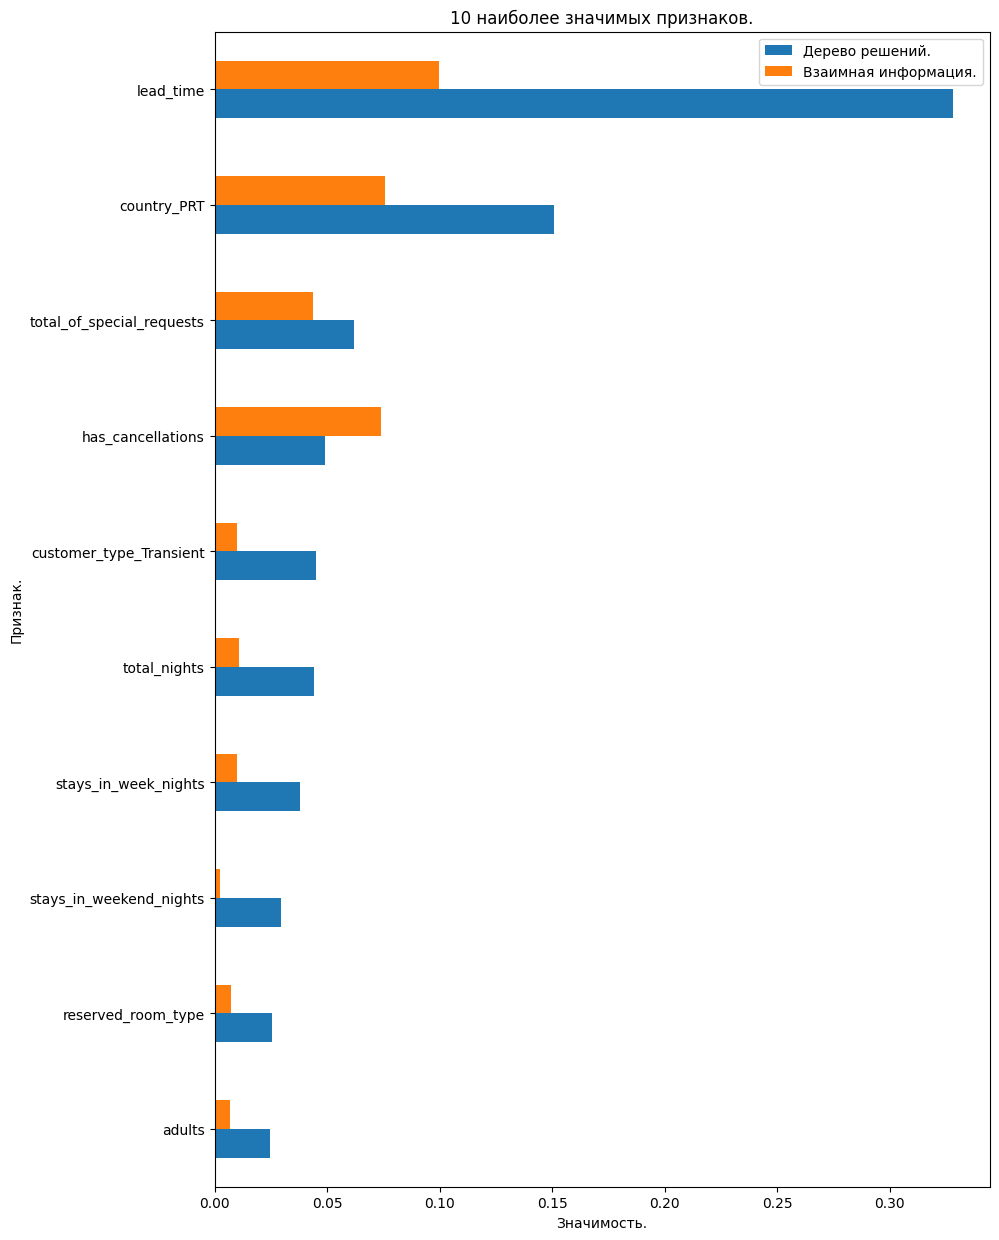

CPU times: total: 42.9 s
Wall time: 42.9 s


In [33]:
%%time
test_feature_importance(X_train, y_train, 'top', 10)

#### Проверка значимости признаков. Выводы.
Среди наиболее важных признаков, оценённых моделью дерево решений и функцией определения взаимной информации в порядке убывания важности для дерева решений:
- `lead_time` - Дней от брони до прибытия..
- `country_PRT` - клиент из Португалии, страны, которая, как было показано выше, насчитывает гораздо больше броней чем остальные страны.
- `total_of_special_requests` - Количество специальных отметок.
- `has_cancellations` - Есть отмены брони.
- `customer_type_Transient` - Тип клиента - случайный.
- `total_nights` - Всего проведённых ночей.

## Разработка ML модели.
### Используемые модели.
Для бинарной классификации используем алгоритм дерево решений и ансамбли из него, учитывая дисбаланс классов:
- `DecisionTreeClessifier`;
- `RandomForestClassifier`;
- `HistGradientBoostingClassifier`;
- `XGBClassifier`.

### Методы кросс-валидации:
Используем метод кросс-валидации `HalvingGridSearchCV`, "поиск по сетке" с отсечением библиотеки `scikit-learn`, т.к. опыт показал, что он практически не уступает в качестве алгоритму "полного" поиска "по сетке" (`GridSearchCV`), но значительно превосходит последний в скорости, которая важна при обучении "деревянных" алгоритмов.

### Используемые метрики.
- **Целевая метрика.**<br>
Как было отмечено выше, задача модели максимально точно предсказывать отмену брони для взимания с "ненадёжного" клиента депозита.<br><br>
Для нахождения оптимального баланса между ошибками первого и второго рода, используем метрику `f1` - среднее гармоническое точности и полноты, обеспечивающее баланс между истинноположительными, ложноположительными и ложноотрицательными предсказаниями.<br><br>

- **Метрика для оценки адекватности модели.**<br>
Оценку адекватности модели произведём с помощью метрики `AUC-ROC` и сравнения её с базисной случайно предсказывающей моделью с константым показателем `AUC-ROC` = 0.5.

### Обучение моделей.

#### Создание функции поиска оптимальных гиперпараметров.<br>
Создадим функцию поиска оптимальных гиперпараметров, расчета и вывода информации о моделях, которая:<br>
  - _Примет на вход_:
    - данные/выборки;
    - класс(ы) модели;
    - словарь с ключами и значениями гиперпараметров для всех классов моделей;
    - список порогов классификации / опционально;
    - список методов перебора гиперпараметров (в цикле, кросс-валидацией, комбинации);
    - основную метрику для оптимизации;
    - дополнительную метрику для отображения;
    - метку вывода комментариев о ходе процесса / по умолчанию комментарии включены.<br><br>
  - Отсеет гиперпараметры, неподходящие модели на каждой итерации.
  - Переберет в цикле все заданные гиперпараметры модели и, опционально, пороги классификации.<br>
  - Переберет все заданные гиперпараметры и подберёт оптимальный порог классификации модели кросс-валидацией с переобучением (refit=True)
    - перебором "по сетке" функцией `GridSearchCV` / опционально;
    - перебором по сетке с отсеиванием функцией `HalvingGridSearchCV` / опционально.<br>
  - _Выведет_:
    - сводную таблицу лучших моделей, оценок, порогов классификации и длительности обучения моделей;

In [34]:
# Зададим функцию подбора гиперпараметров по циклу и различными методами
# кросс-валидации.
def get_best_model(X_train, y_train,
                   X_val, y_val,
                   model_names,
                   hyper_params,
                   thresholds=.5,
                   search_methods=None,
                   scorer_name=None,
                   sec_scorer_name=None,
                   verbosity=1):
    '''
    Only binary classes are supported.
    Arguments:
    - X_train, y_train: training sample and target.
    - X_val, y_val: validation or test sample and target.
    - model_names: var/list. Model var or list of vars.
    - hyper_params: dictionary,
    {'hyperparameter name' : ['hyperparameter list']}
    of all hyperparameters for all model names passed in the 'model_names' list.
    - scorer_name: str, default:None. Sklearn scoring function to maximize
    (e.g.: 'f1', 'fbeta').
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter #noqa
    - sec_scorer_name: str, default:None. Secondary Sklearn scoring function.
    - search_methods: var/list, default=None. Accepts 'all', 'loop', 'autocv',
    'GridSearchCV', 'HalvingGridSearchCV', 'BayesSearchCV', or a list
    with a combination of the individual methods.
    - thresholds: list/np.array of classification threshold values. Implies
    imbalanced classes.
    - verbose: int, default=1. 0 - no messages. The higher the more messages.
    '''

    ### Проверим необходимость комментирования прогресса.
    if verbosity > 0:
        def verboseprint(*args):
            for arg in args:
                print(arg),
            print
    else:
        verboseprint = lambda *a: None

    ### Проверим указаны ли функция оценщика.
    if (scorer_name is None or
     (not isinstance(scorer_name, str)) or
      (scorer_name not in ['accuracy', 'precision', 'f1', 'fbeta',
                           'f1_weighted' 'recall', 'roc_auc'])):
        raise ValueError('\nФункция оценки не указана или указана '+
                         'неверно.\n')
    else:
        verboseprint(f'\nОптимизируется оценка {scorer_name}.\n')

    ### Проверим верно ли указаны методы перебора.
    try:
        if (not isinstance(search_methods, list) and \
            search_methods.__name__ == 'GridSearchCV' or \
            search_methods.__name__ == 'HalvingGridSearchCV'):
            search_methods = [search_methods]
    except:
        if isinstance(search_methods, str):
            search_methods = [search_methods]
    if search_methods is None or len(search_methods) == 0:
        raise ValueError('\nНе указан ни один метод подбора ' +
                         'гиперпараметров.\n')

    ### Перенесем модель в список.
    if not isinstance(model_names, list):
        model_names = [model_names]

    ### Зададим список для сбора лучших моделей и начальные значения счётчиков.
    best_list = []
    score_loop = 0
    score_loop_cv = 0
    score_final = 0
    duration_loop = 10.0
    threshold_loop = 0.5
    threshold = 0.5
    threshold_cv = 0.5
    threshold_final = 0.5
    iteration = 0

    ### Зададим функцию оценки на основе scorer_name.
    scoring_function = globals()[f'{scorer_name}_score']

    ### Переберём все модели в полученном списке.
    print('\nНачало работы...')
    for model_name in tqdm(model_names):

        # Отберём только гиперпараметры, подходящие модели
        # на текущей итерации.
        hyper_params_iter = {}
        for k, v in hyper_params.items():
            if k in model_name().get_params().keys():
                hyper_params_iter.update({k:v})


        # Удалим неиспользуемый "критерий" для градиентного бустинга.
        try:
            if model_name.__name__ == 'GradientBoostingClassifier':
                del hyper_params_iter['criterion']
        except:
            pass

        # Проверим список гиперпараметров после отбора.
        if len(hyper_params_iter) == 0:
            raise ValueError(f'\nМодели {model_name.__name__} не '+
                            'соответствует ни один гиперпараметр из ' +
                             'переданного списка.')

        # Проверим необходимость перебора в цикле.
        if any(s in search_methods for s in ['all', 'loop']):
            ##----------> Подбор гиперпараметров в цикле.
            verboseprint('~' * 60)
            verboseprint(f'\nНачало подбора гиперпараметров модели ' +
                         f'{model_name.__name__} в цикле.')

            # Объявим переменные для записи метрик лучшей модели цикла.
            score_loop = 0
            model_loop = None
            duration_loop = 10.0

            # Переберем все значения гиперпараметров модели в цикле
            # и обучим модель с замером времени.
            # itertools.product обернутый в tqdm.
            hyper_params_dict = {}
            for row in product(*hyper_params_iter.values()):
                for i in range(len(row)):
                    hyper_params_dict.update({
                        list(hyper_params_iter.keys())[i] : row[i]
                        })

                # Обучим модели.
                start = time() # начало замера времени.
                model = model_name(**hyper_params_dict)
                model.fit(X_train, y_train)
                stop = time() # конец замера времени.
                duration = stop - start

                # Если значения порога указаны, предсказываем вероятности.
                if not isinstance(thresholds, float):
                    # Вычислим вероятность предсказания положительного класса.
                    proba_one_val = model.predict_proba(X_val)[:, 1]

                    # Найдём высшую оценку перебором значения порога
                    # классификации.
                    for threshold in thresholds:
                        proba_one_val_t = proba_one_val > threshold
                        # Оценим валидационную выборку.
                        score_val = scoring_function(y_val, proba_one_val_t)

                        # Вычислим вторичную оценку модели.
                        if sec_scorer_name == 'roc_auc':
                            sec_scoring_function = (
                                globals()[f'{sec_scorer_name}_score']
                                )
                            sec_score_auc = sec_scoring_function(
                                y_val, proba_one_val_t
                                )

                        # Сохраним лучшую модель и время её обучения.
                        if score_val > score_loop:
                            score_loop = score_val
                            sec_score_temp =  sec_score_auc
                            threshold_loop = threshold
                            model_loop = model
                            duration_loop = round(duration, 4)
                        elif (score_val == score_loop and
                              sec_score_temp < sec_score_auc):
                            score_loop = score_val
                            sec_score_temp =  sec_score_auc
                            threshold_loop = threshold
                            model_loop = model
                            duration_loop = round(duration, 4)
                        elif (score_val == score_loop and
                              sec_score_temp == sec_score_auc and
                              duration_loop < duration):
                            score_loop = score_val
                            sec_score_temp =  sec_score_auc
                            threshold_loop = threshold
                            model_loop = model
                            duration_loop = round(duration, 4)

                # Если значения порога не указаны, предсказываем значения.
                else:
                    # Оценим валидационную выборку.
                    score_val = scoring_function(y_val, model.predict(X_val))

                    # Сохраним лучшую модель и время её обучения.
                    if score_val > score_loop:
                        score_loop = score_val
                        model_loop = model
                        duration_loop = round(duration, 4)
                    elif (score_val == score_loop and
                          duration_loop < duration):
                        score_loop = score_val
                        model_loop = model
                        duration_loop = round(duration, 4)

            verboseprint('\nПодбор гиперпараметров модели ' +
                         f'{model_name.__name__} в цикле завершён.')
            ##----------< Конец подбора в цикле.


        ##----------> Автоматизированная оптимизация.

        # Объявим пустые переменные для оценок и моделей, если
        # автоматизированная оптимизация не проводится.
        score_cv = 0
        model_cv = None
        method = None

        ## Проверим search_methods на наличие None и только одного 'loop'.
        if not ('loop' in search_methods and len(search_methods) == 1):
            # Проверим указаны ли методы автоматизированной оптимизации.
            if 'loop' in search_methods and len(search_methods) > 1:
                search_methods_iter = [
                    s for s in search_methods if s != 'loop'
                    ]
            elif any(s in search_methods for s in ['all', 'autocv']):
                search_methods_iter = [GridSearchCV,
                                       HalvingGridSearchCV]
            elif (
                'loop' not in search_methods and \
                any(s in search_methods for s in [GridSearchCV,
                                                  HalvingGridSearchCV])
                ):
                search_methods_iter = search_methods

            # Пропустим автоматизированную оптимизацию,
            # если ни один из методов не найден.
            else:
                verboseprint('\nМетоды кросс-валидации не указаны.' +
                             '\nПропуск автоматизированных методов ' +
                             'подбора гиперпараметров.')

            # Проведём кросс-валидацию всеми указанными методами.
            verboseprint('~' * 60)
            verboseprint('\nНачало автоматизированного подбора ' +
                         f'гиперпараметров модели {model_name.__name__}.')
            for method in tqdm(search_methods_iter):
                verboseprint(f'\nНачало подбора модели '+
                             f'{model_name.__name__} '
                             f'методом {method.__name__}.')

                # Отчлючим сообщения HalvingGridSearchCV.
                if method.__name__ == 'HalvingGridSearchCV':
                    verbosity_cv = 0
                else:
                    verbosity_cv = 1

                # Объявим переменные для хранения оценок и моделей и проведём
                # кросс-валидацию.
                score_cv = 0
                model_cv = None
                cv = method(model_name(),
                            hyper_params_iter,
                            scoring=scorer_name,
                            n_jobs=-1,
                            verbose=verbosity_cv)
                cv.fit(X_train, y_train)

                # Если значения порога указаны, попытаемся улучшить модель
                # смещением порога классификации.
                if not isinstance(thresholds, float):
                    # Вычислим вероятность предсказания положительного
                    # класса.
                    proba_one_val = (
                        cv.best_estimator_.predict_proba(X_val)[:, 1]
                        )

                    # Найдём высшую оценку перебором значения порога
                    # классификации.
                    for threshold in thresholds:
                        proba_one_val_t = proba_one_val > threshold
                        # Оценим валидационную выборку.
                        score_cv_val = scoring_function(y_val,
                                                        proba_one_val_t)

                        # Запишем лучшую модель и оценку.
                        if score_cv_val > score_cv:
                            threshold_cv = threshold
                            score_cv = score_cv_val
                            model_cv = cv.best_estimator_
                            method_cv = method

                # Если значения порога не указаны, предсказываем значения.
                else:
                    # Оценим валидационную выборку.
                    score_cv_val = cv.score(X_val, y_val)
                    # Запишем лучшую модель и оценку.
                    if score_cv_val > score_cv:
                        score_cv = score_cv_val
                        model_cv = cv.best_estimator_
                        method_cv = method.__name__

            verboseprint('\nАвтоматизированный подбор гиперпараметров ' +
                        'завершён.')

        else:
            verboseprint('\nПропуск автоматизированных методов подбора ' +
                         'гиперпараметров.')
        ##----------> Конец автоматизированной оптимизации.

        # Проверим какая из моделей текущей итерации имеет высшее значение
        # целевой метрики.

        if score_loop > score_cv:
            model_best = model_loop
            score_best = score_loop
            threshold_best = threshold_loop
            duration_best = duration_loop
            method_best = 'Перебор в цикле.'

        elif score_cv > score_loop:
            model_best = cv.best_estimator_
            score_best = score_cv
            threshold_best = threshold_cv
            duration_best = cv.refit_time_
            method_best = method_cv

        elif score_cv == score_loop:
            model_best = model_loop
            score_best = score_loop
            threshold_best = threshold_loop
            duration_best = duration_loop
            method_best = f'Перебор в цикле и кросс-вал.'


        # Запишем в список лучшие модели по типу.
        best_list.append([model_name.__name__,
                          method_best,
                          round(score_best, 2),
                          round(threshold_best, 2),
                          round(duration_best, 4)])
        best_list_cols = ['Алгоритм.',
                          'Метод подбора.',
                          f'Оценка - {scorer_name}.',
                          'Порог классификации.',
                          'Время обучения.']

        # Вычислим вторичную оценку модели.
        if sec_scorer_name == 'roc_auc':
            sec_scoring_function = globals()[f'{sec_scorer_name}_score']
            sec_score = sec_scoring_function(
                y_val, model_best.predict_proba(X_val)[:, 1]
                )
            best_list[iteration].insert(3, round(sec_score, 2))
            best_list_cols.insert(3, 'Оценка - AUC-ROC')


        # Запишем параметры лучшей модели.
        if score_final < score_best:
            sec_score_final = sec_score
            score_final = score_best
            model_final = model_best
            threshold_final = threshold_best
        elif (score_final == score_best and
              sec_score_final < sec_score):
            sec_score_final = sec_score
            score_final = score_best
            model_final = model_best
            threshold_final = threshold_best

        iteration += 1

    print('\nПодбор гиперпараметров завершён.')
    verboseprint('~' * 70)
    ###----------> Конец подбора моделей.


    print('\n\n')
    print('\033[1mДанные для валидационной выборки.\033[0m')
    print('~' * 70, '\n')

    ### Выведем лучшие модели по типу.
    out_final = (pd.DataFrame(data=best_list, columns=best_list_cols))
    display(
        out_final
        .sort_values(by=out_final.columns[2], ascending=False)
        .style
        .format(precision=2)
        .set_caption('Модели с лучшими оценками на валидациионной выборке '+
                     f'"{scorer_name}" по типу.')
        .set_table_styles(styles)
        )

    return model_final, threshold_final

- Создадим функцию которая
  - примет
    - обученную модель;
    - валидационную выборку (предикторы и целевой признак);
    - подобранный порог классификации / опционально.
  - выведет
    - условную диаграмму и таблицу ошибок классификации модели;
    - ROC - кривую модели и базисную линию.

In [52]:
def get_model_data(model, X, y, threshold=.5):
    ###----------> Рассчёт доп. метрик.
    # Рассчитаем вероятности предсказания положительного класса для лучшей
    # модели и её точность и полноту.
    proba_one_threshold = (
        model.predict_proba(X)[:,1] > threshold
        )
    proba_one = model.predict_proba(X)[:,1]

    precision = round(precision_score(y, proba_one_threshold), 2)
    recall = round(recall_score(y, proba_one_threshold), 2)
    f1 = round(f1_score(y, proba_one_threshold), 2)
    print('\033[1m\n\nДанные для тестовой выборки.\033[0m')
    print('~' * 70, '\n')

    display(pd.DataFrame([f1], index=['Целевая метрика "f1" для предсказаний ' +
                                      'лучшей модели на тестовой выборке:'],
                         columns=['']))
    print('\n')

    ## Рассчитаем ошибки классификации.
    (tn, fp,
     fn, tp) = confusion_matrix(y, proba_one_threshold).ravel()

    # Получим TPR и FPR и пороги классификации.
    fpr, tpr, rc_thresholds = roc_curve(y, proba_one, pos_label=1)
    ###----------> Конец рассчёта доп. метрик.


    ## Выведем таблицу ошибок классификации.
    display(
    pd.DataFrame(
        data=[[f'TP = {tp}', f'FN = {fn}', y.value_counts()[1]],
              [f'FP = {fp}', f'TN = {tn}', y.value_counts()[0]]],
        index=['Истинный класс - положительный.',
               'Истинный класс - отрицательный.'],
        columns=['Прогнозируемый класс - положительный..',
                 'Прогнозируемый класс - отрицательный.',
                 'Кол-во элементов в классе.'])
    .style
    .set_caption('Матрица ошибок классификации финальной модели на тестовой ' +
                 'выборке.')
    .set_table_styles(styles)
    )

    print('\n\n')

    # Выведем гиперпараметры лучшей модели.
    print('\033[1mГиперпараметры финальной модели:\033[0m')
    display(model)

    print('\n\n')

    ## Выведем условную диаграмму распределения ошибок классификации,
    # отметив в заголовке соотношение precision / recall и ROC кривую для
    # лучшей модели с учётом найденного порога классификации.
    if model.__class__.__name__ == 'DecisionTreeClassifier':
        steps = zip(fpr[::6], tpr[::6], rc_thresholds[::6])
    elif model.__class__.__name__ in ['HistGradientBoostingClassifier',
                                      'GradientBoostingClassifier',]:
        steps = zip(fpr[::160], tpr[::160], rc_thresholds[::160])
    elif model.__class__.__name__ == 'XGBClassifier':
        steps = zip(fpr[::200], tpr[::200], rc_thresholds[::200])
    elif model.__class__.__name__ == 'RandomForestClassifier':
        steps = zip(fpr[::250], tpr[::250], rc_thresholds[::250])
    else:
        steps = zip(fpr[::20], tpr[::20], rc_thresholds[::20])

    fig, axes = plt.subplots(1, 2, figsize=(15, 8))
    venn2(subsets=(fn, fp, tp),
        set_labels=('',''),
        set_colors=('red', 'blue'), ax=axes[0])
    axes[0].legend(['Ложноотрицательные - FN',
                    'Ложноположительные - FP',
                    'Истинноположительные - TP'], loc=3)
    axes[0].set_title('Условная диаграмма распределения ошибок ' +
                      f'классификации. \nТочность: {precision}. Полнота: ' +
                      f'{recall}.')

    axes[1].plot(fpr, tpr, 'o-')
    axes[1].set_xlim(0.0, 1.0)
    axes[1].set_ylim(0.0, 1.0)
    axes[1].set_xlabel('Доля ложных срабатываний, FPR.')
    axes[1].set_ylabel('Полнота, TPR.')
    axes[1].set_title(f'ROC-кривая. Площадь (AUC):{auc(fpr, tpr):.2f}.')
    for x, y, ths in steps:
        axes[1].annotate(np.round(ths,2), (x, y-0.04))
    axes[1].plot([0, 1], [0, 1], linestyle='--')
    axes[1].legend(['Финальная модель. Тестовая выборка. \nТочки - порог ' +
                    'классификации.',
                    'Случайная модель.'])
    plt.show();

#### Установка параметров обучения моделей.
- Создадим словарь гиперпараметров и список классов обучаемых моделей.

In [41]:
# Вычислим количество доступных процессоров для передачи моделям и ускорения
# обучения.
n_cpus = multiprocessing.cpu_count()

# Словарь гиперпараметров.
hyperparams = {'criterion': ['gini', 'entropy'],
               'max_depth': range(4, 25, 4),
               'n_estimators' : [100, 125, 150],
               'learning_rate' : [0.01, 0.1, 1],
               'eta' : [0.01, 0.2],
               'eval_metric' : [auc],
               'n_jobs' : [n_cpus-1],
               'tree_method' : ['gpu_hist'],
               'random_state' : [seed]}

# Использование GPU в Google Colab.
if os.getenv("COLAB_RELEASE_TAG"):
    hyperparams.update({'tree_method' : ['gpu_hist']})

# Список классов моделей.
model_classes = [DecisionTreeClassifier,
                 RandomForestClassifier,
                 HistGradientBoostingClassifier,
                 XGBClassifier]

#### Подбор оптимальных моделей.
- Вызовем функцию перебора гиперпараметров валидационной выборке для оптимизации целевой метрики и обучим модели.
- Учтём дисбаланс классов задав список порогов классификации для проверки.

In [45]:
# %%time
# Вызовем функцию и обучим модели.
best_cut_off, threshold = get_best_model(X_train, y_train, X_val, y_val,
                                         model_classes, hyperparams,
                                         thresholds=np.arange(.4, .55, .05),
                                         search_methods=['loop',
                                                         HalvingGridSearchCV],
                                         scorer_name='f1',
                                         sec_scorer_name='roc_auc', verbosity=1)


Оптимизируется оценка f1.


Начало работы...


  0%|          | 0/4 [00:00<?, ?it/s]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Начало подбора гиперпараметров модели DecisionTreeClassifier в цикле.


  0%|          | 0/12 [00:00<?, ?it/s]


Подбор гиперпараметров модели DecisionTreeClassifier в цикле завершён.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Начало автоматизированного подбора гиперпараметров модели DecisionTreeClassifier.


  0%|          | 0/1 [00:00<?, ?it/s]


Начало подбора модели DecisionTreeClassifier методом HalvingGridSearchCV.

Автоматизированный подбор гиперпараметров завершён.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Начало подбора гиперпараметров модели RandomForestClassifier в цикле.


  0%|          | 0/36 [00:00<?, ?it/s]


Подбор гиперпараметров модели RandomForestClassifier в цикле завершён.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Начало автоматизированного подбора гиперпараметров модели RandomForestClassifier.


  0%|          | 0/1 [00:00<?, ?it/s]


Начало подбора модели RandomForestClassifier методом HalvingGridSearchCV.

Автоматизированный подбор гиперпараметров завершён.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Начало подбора гиперпараметров модели HistGradientBoostingClassifier в цикле.


  0%|          | 0/18 [00:00<?, ?it/s]


Подбор гиперпараметров модели HistGradientBoostingClassifier в цикле завершён.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Начало автоматизированного подбора гиперпараметров модели HistGradientBoostingClassifier.


  0%|          | 0/1 [00:00<?, ?it/s]


Начало подбора модели HistGradientBoostingClassifier методом HalvingGridSearchCV.

Автоматизированный подбор гиперпараметров завершён.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Начало подбора гиперпараметров модели XGBClassifier в цикле.


  0%|          | 0/54 [00:00<?, ?it/s]


Подбор гиперпараметров модели XGBClassifier в цикле завершён.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Начало автоматизированного подбора гиперпараметров модели XGBClassifier.


  0%|          | 0/1 [00:00<?, ?it/s]


Начало подбора модели XGBClassifier методом HalvingGridSearchCV.

Автоматизированный подбор гиперпараметров завершён.

Подбор гиперпараметров завершён.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



Данные для валидационной выборки.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



,Алгоритм.,Метод подбора.,Оценка - f1.,Оценка - AUC-ROC,Порог классификации.,Время обучения.
1,RandomForestClassifier,Перебор в цикле и кросс-вал.,0.82,0.93,0.40,1.71
3,XGBClassifier,Перебор в цикле.,0.82,0.93,0.45,3.93
2,HistGradientBoostingClassifier,Перебор в цикле и кросс-вал.,0.80,0.92,0.40,3.10
0,DecisionTreeClassifier,Перебор в цикле.,0.79,0.87,0.40,0.45


- Вызовем функцию вывода информации о предсказаниях модели на тестовой выборке и графиков.



Данные для тестовой выборки.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 



,
"Целевая метрика ""f1"" для предсказаний лучшей модели на тестовой выборке:",0.67


,Прогнозируемый класс - положительный..,Прогнозируемый класс - отрицательный.,Кол-во элементов в классе.
Истинный класс - положительный.,TP = 7618,FN = 4973,12591
Истинный класс - отрицательный.,FP = 2597,TN = 17224,19821





Гиперпараметры финальной модели:


RandomForestClassifier(max_depth=24, n_estimators=125, n_jobs=11,
                       random_state=42)

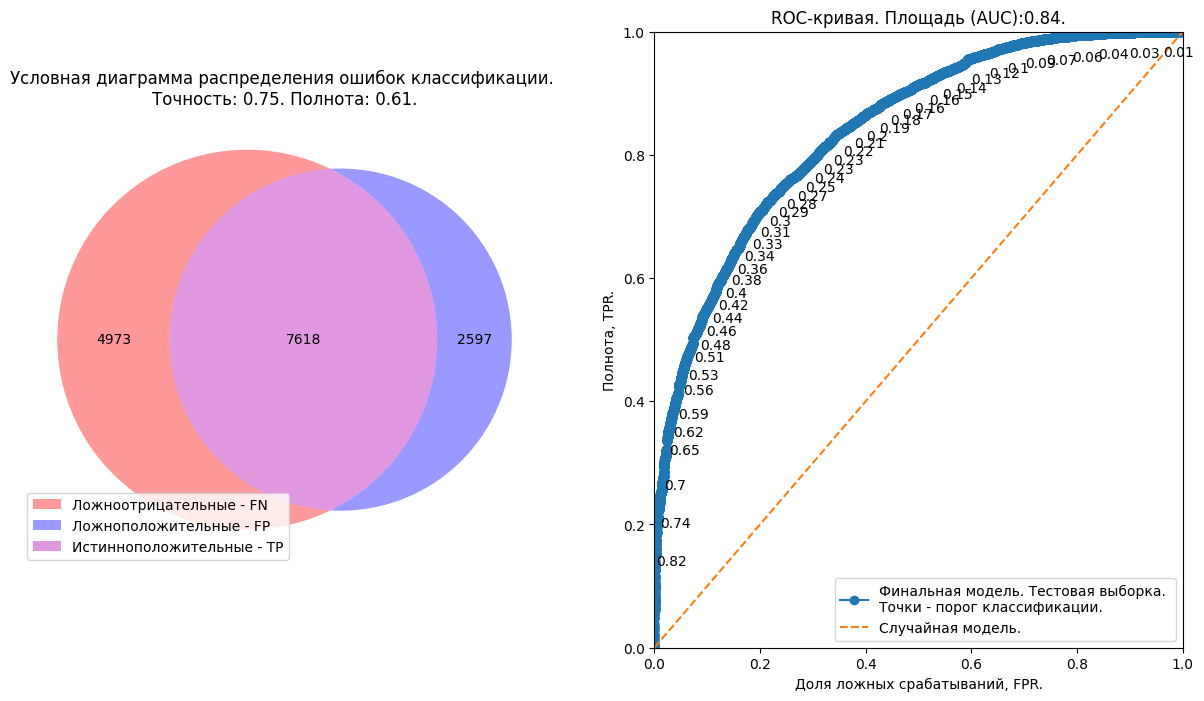

In [53]:
# Вызовем функцию и выведем данные.
get_model_data(best_cut_off, X_test, y_test, threshold)

### Оценка прибыли, которую принесёт модель.

- Восстановим временно удалённый из тестового датафрейма месяц заезда, и добавим предсказания лучшей модели.
- Вызовем функцию и выведем прибыль, которую модель принесла бы за 2017 (неполный) год, который обозначен как отчётный период, если каждый второй клиент, из числа определённых моделью как "ненадёжные" согласился внести депозит.

In [47]:
hotel_test['arrival_date_month'] = months_test
hotel_test['y_preds'] = best_cut_off.predict(X_test)
hotel_test['model_profit'] = hotel_test.apply(get_profit, axis=1, method='ml')

In [54]:
print('Прибыль от депозитов, внесённых клиентами, определёнными моделью как ' +
      '\n"ненадёжные" и отменивших бронь: '
      f'{hotel_test.model_profit.sum()/2:,} р.'.replace(',', ' '))

Прибыль от депозитов, внесённых клиентами, определёнными моделью как 
"ненадёжные" и отменивших бронь: 3 815 536.0 р.


#### Оценка прибыли, которую принесёт модель. Вывод.
- Прибыль, которую могла бы принести модель за неполный 2017 г.: &nbsp;  3 815 536.0 р.
- Модель можно улучшать и вносить корректировки в расчёт прибыли (упущенную выгоду), но уже сейчас ясно, что применение предиктивной модели даёт положительный прибыльный результат.

## Портрет "ненадёжного" клиента.
- Выведем признаки, оказавшиеся наиболее важными для лучшей модели на тестовой выборке, для определения их осмысленности и сравнения их со списокм признаков полученным на этапе ИАД.
- Важность признаков для модели

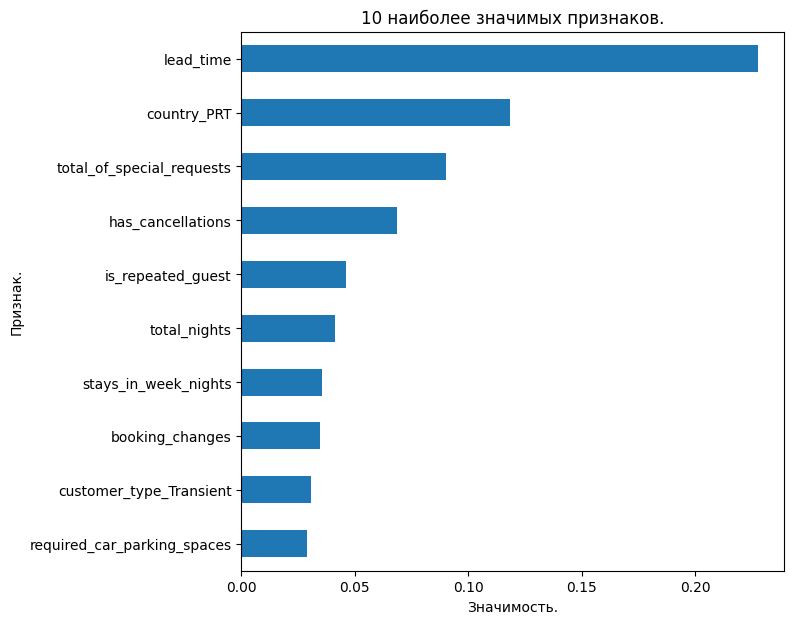

CPU times: total: 234 ms
Wall time: 223 ms


In [56]:
%%time
# Выведем важность признаков
pd.Series(best_cut_off.feature_importances_, index=X_val.columns).sort_values(ascending=False).head(10).iloc[::-1].plot.barh(figsize=(7, 7))
plt.title('10 наиболее значимых признаков.')
plt.xlabel('Значимость.')
plt.ylabel('Признак.')
plt.show();

- Наболее важными финальная модель посчитала следущие признаки:
  - `lead_time` остался самым важным признаком.
  - `country_PRT` - клиент из Португалии, самой многочисленной страны в данных.
  - `total_of_special_requests` - количество специальных отметок.
  - `has_cancellations` - Есть отмены брони.
  - `is_repeated_guest` - Повторная бронь.
  - `bookin_changes` - финмальная модель справедливо посчитала этот признак важным.
  - `required_car_parking_spaces` - ещё один признак не оценённых базовой моделью дерева решений
  - `customer_type_Transient` - Тип клиента - случайный.
  
- Признаки, отобранные моделью как важные, сочетаются с отмеченными на этапе ИАД, а именно:
  - `lead_time`, т.к. после 110 дней риск отмены сильно увеличивается;
  - `country_PRT` из-за представительности признака;
  - `total_of_special_requests`, `booking_changes`, `required_car_parking_spaces` показывают активное планирование и заинтересованность клиента в брони.<br><br>

- В целом, признаки оценённые моделью осмысленны и важны, кроме `country_PRT` страны Португалия, который появляется из-за большого количества записей.<br>
Имеет смысл дальнейшее улучшение данных и/или модели, для учёта скошенности данных в сторону этой страны.

  - Проанализировав данные, можно сделать вывод что ненадёжные клиенты обладают следующими характеристиками:
    - Ожидание брони более 110 дней.
	- Бронь клиента не попадает на выходные.
    - 2-ое взрослых без детей или с двумя детьми и без младенцев.
    - У клиента нет предыдущих броней
	- У клиента более 11 отмен брони.
	- В бронь не вносились изменения.
	- Длительное ожидание подтверждения брони, особенно 40 и 110 дней. Исключением является срок 60 дней для клиентов - туристических операторов, которые всегда подверждают бронь.
    - Клиент не запросил ни одного парковочного места.
	- Клиент не запрашивал специальные опции.
	- Клиенты, бронирующие 2 или 3 ночи, менее надёжны.
    - Клиенты, бронирующие номера не на ноябрь и зимние месяцы, менее надежны.
	- Клиенты из Португалии менее надёжны.
    - Клиенты указавшие опцию "Завтрак, обед и ужин" - `FB`.
	- Туристические операторы.
	- Самый ненадёжный тип клиента - случайный, `Transient`.

## Общий вывод.

### Результаты работы.
- Была разработана прибыльная система предсказаний отмены бронирования.
- Был проведён исследовательский анализ и составлен портрет "ненадёжного" клиента.

#### Оценка прибыли, которую принесёт модель.
- Прибыль, которую могла бы принести модель за неполный 2017 г.: &nbsp;  3 815 536.0 р.

### Рекомендации заказчику.
- Для улучшения предиктивной модели, рекомендуется предоставление более полных данных, так как в датасетах в наличии, особенно в тестовой выборке, данные были представлены не за каждый отчётный период (год), а именно:
  - Годы, представленные в обучающем датасете: частично 2015 и полностью 2016.
  - Годы, представленные в тестовом датасете: частично 2017

- Т.к. брони из Португалии составляют ~40% от общего числа объектов, а отменённых броней на ~26% больше чем в остальных странах, рекомендуется классифицировать брони из Португалии отдельно от остальных стран и доработать предиктивную модель соответственно.

- Рекомендуется требовать полную предоплату или депозит со всех клиентов, у которых более 13 отменённых броней и ни одной подтверждённой. Такие клиенты никогда не подтверждают бронирование и не рассматривались при построении предиктивных моделей.

### Исследовательский анализ данных и предобработка.

#### Целевой признак:
- Целевой признак категориальный, бинарный.<br>
- Классы несбалансированы. <br>
Соотношение классов всех данных: 37.5% положительный класс / 62.5% отрицательный класс.<br>
  - соотношение классов обучающей и валидационной выборок: `63.1%/36.9%`;
  - соотношение классов тестовой выборки: `61.2%`/`38.8%`.<br>
Дисбаланс был учтён при разработке моделей.<br>

#### ML задача:
  - Т.к. целевой признак определен и бинарен, задача построения предиктивной модели сводится к бинарной классификации, "обучению с учителем".<br>
  
#### Пропуски в данных.
- Были заменены нулевые значения в признаке `is_repeated_guest` метками 1, соответствующими существующим броням в признаках `previous_cancellations` и `previous_bookings_not_canceled`.
  
#### Аномалии в данных.
- Были удалены аномальные значения в признаках:
  - `previous_cancellations` - более 13,
  - `babies` - признак был бинаризован и переименован в `has_babies`.
  
### Вычисление бизнес-метрики.
Годовая прибыль по годам:<br>
- Прибыль за неполный 2015 год: 19 162 450 р.
- Прибыль за 2016 год: 52 830 080 р.
- Прибыль за неполный 2017 год: 35 346 940 р.

### Подготовка данных к моделированию.

#### Удаление признаков.

- Были удалены следующие признаки:
  - `id`. Признак не несёт информации, необходимой для построения моделей.
  - `arrival_date_year`. Год бронирования в прошлом не несёт полезной информации для предсказания будущих броней, а наборот, зашумляет прогнозы.
  - `arrival_date_month` и `arrival_date_week_number`. Так как в данных нет полной информации о всех месяцах и номерах недель для всех лет.
  - `arrival_daye_day_of_month`, т.к. зависимости между фактом отмены бронирования и днем заезда при проведении ИАД выявлено не было.
- Было создано два бинарных признака `has_cancellations` и `has_successful_bookings` и удалены их количественные аналоги `previous_bookings_not_canceled`, `previous_cancellations`, усложняющие модель.

#### Кодирование признаков.
- Все категориальные признаки кроме `reserved_room_type` были закодированы методом OneHotEncoder().
Признак `reserved_room_type` был закодирован порядковыми числовыми значениями от 7 до 1 для каждого класса от A до G.

#### Проверка значимости.
- Наболее важными финальная модель посчитала следущие признаки в порядке убывания важности:
  - `lead_time` остался самым важным признаком.
  - `country_PRT` - клиент из Португалии, самой многочисленной страны в данных.
  - `total_of_special_requests` - количество специальных отметок.
  - `has_cancellations` - Есть отмены брони.
  - `is_repeated_guest` - Повторная бронь.<br>

### Разработка ML модели.

#### Используемые модели.

Были проверены алгоритм дерево решений и ансамбли из него, учитывая дисбаланс классов с подбором гиперпараметров и порогов классификации. Проверенные алгоритмы:
- `DecisionTreeClessifier`;
- `RandomForestClassifier`;
- `HistGradientBoostingClassifier`;
- `XGBClassifier`.

#### Методы кросс-валидации:

- Был использован метод кросс-валидации `HalvingGridSearchCV`.

#### Используемые метрики.
- **Целевая метрика.**<br>
`f1` - среднее гармоническое точности и полноты.
- **Метрика для оценки адекватности модели.**<br>
Оценка адекватности модели производилась метрикой `AUC-ROC`.

#### Лучшая предиктивная модель.
Модель с наиболее высоким значением целевой метрики `f1` для представленных данных:
  - RandomForestClassifier	найдена перебором в цикле с порогом классификации 0.4.
  - Целевая метрика `f1`: 0.67, невысокий показатель.
  Модель и данные необходимо улучшать.
  - Вспомогательная метрика адекватности `AUC-ROC`: 0.84 - средний показатель. Модель адекватна.
  - Скорость обучения модели - 1.71с., короткое время для медленного алгоритма случайного леса.
  - Гиперпараметры модели:
    - `max_depth`=24,
    - `n_estimators`=125.